# Exploratory Data Analysis and Modeling

## Exploratory Data Analysis
The goal of this section is to explore which features might show possible relation to explain the difference in prices of individual houses.

The main workflow would be as such:
    
    1.Converting the features into Data Types
    (Continous/Discrete and Ordinal/Nominal) 
    2.Feature Engineering 
    3.Explortatory Data Analysis
    4.Dropping of Features 
    5.One-Hot Encoding
    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, ElasticNet, ElasticNetCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
test=pd.read_csv("../datasets/test_c.csv")
train=pd.read_csv("../datasets/train_c.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)



In [3]:
#dropping unwanted columns
train.drop(columns="Unnamed: 0",inplace=True)
test.drop(columns="Unnamed: 0",inplace=True)

#changing the type of garage cars and bsmt full baths for test set.
test["garage_cars"]=test["garage_cars"].astype(float)
test["bsmt_full_bath"]=test["bsmt_full_bath"].astype(float)

In [4]:
train.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           0.0     13517   Pave  None   
1  544  531379050           60        RL          43.0     11492   Pave  None   
2  153  535304180           20        RL          68.0      7922   Pave  None   
3  318  916386060           60        RL          73.0      9802   Pave  None   
4  255  906425045           50        RL          82.0     14235   Pave  None   

  lot_shape land_contour utilities lot_config land_slope neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [5]:
test.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           0.0      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           0.0      9500   Pave   

  alley lot_shape land_contour utilities lot_config land_slope neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1  None       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2  None       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3  None       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4  None       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0             0.0               0          2          0              4   
1             0.0               0          2          0              6   
2             1.0               0          2          1              3   
3             0.0               0        

In [6]:
# assigning the test id into a dataframe for modeling.
test_id=test[["id"]]

In [7]:
#creating a feature that shows the age of a place. 
train["age"]=train["yr_sold"]-train["year_built"]

#creating a feature that shows the age of the garage
train["garage_age"]=train["yr_sold"]-train["garage_yr_blt"]
train["garage_age"]=train["garage_age"].astype(int)

#creating feature that shows if there has been a remodel
train["remodel"]=train["year_remod/add"]-train["year_built"]
train["remodel"]=[1 if i !=0 else 0 for i in train["remodel"]]

#Repeating the top steps for test dataset 
test["age"]=test["yr_sold"]-test["year_built"]

test["garage_age"]=test["yr_sold"]-test["garage_yr_blt"]
test["garage_age"]=test["garage_age"].astype(int)


test["remodel"]=test["year_remod/add"]-test["year_built"]
test["remodel"]=[1 if i !=0 else 0 for i in test["remodel"]]


In [8]:
# checking which garage ages are less then 0
train.loc[train["garage_age"]<0,:][["garage_age","garage_yr_blt","yr_sold"]]


garage_age  garage_yr_blt  yr_sold
1699        -200         2207.0     2007
1885          -1         2008.0     2007

In [9]:
# checking which ages are less then 0
train.loc[train["age"]<0,:][["age","year_built","yr_sold"]]

age  year_built  yr_sold
1885   -1        2008     2007

In [10]:
# checking which garage ages are more then 200 
train.loc[train["garage_age"]>200,:][["garage_age","garage_yr_blt","yr_sold","age"]]

garage_age  garage_yr_blt  yr_sold  age
28          2007            0.0     2007  112
53          2010            0.0     2010   40
65          2007            0.0     2007    0
79          2007            0.0     2007   82
101         2007            0.0     2007   87
103         2009            0.0     2009  109
114         2009            0.0     2009   62
120         2008            0.0     2008   68
134         2008            0.0     2008   83
136         2010            0.0     2010  135
139         2010            0.0     2010   98
162         2009            0.0     2009   87
235         2009            0.0     2009   99
256         2006            0.0     2006   52
260         2010            0.0     2010   70
264         2009            0.0     2009   69
276         2006            0.0     2006    4
334         2006            0.0     2006   90
356         2009            0.0     2009   94
382         2009            0.0     2009   97
406         2006            0.0     2006   35
409         2007            0.0     2007   93
426         2006            0.0     2006   55
437         2008            0.0     2008   53
445         2006            0.0     2006   44
457         2007            0.0     2007  112
486         2008            0.0     2008   94
530         2009            0.0     2009   50
542         2008            0.0     2008   68
555         2008            0.0     2008   88
562         2010            0.0     2010  100
579         2010            0.0     2010   42
580         2008            0.0     2008   53
612         2006            0.0     2006   88
636         2007            0.0     2007   17
653         2008            0.0     2008   84
663         2007            0.0     2007   61
689         2008            0.0     2008   98
692         2006            0.0     2006   90
700         2010            0.0     2010   80
705         2008            0.0     2008   98
708         2006            0.0     2006   81
722         2008            0.0     2008    3
736         2010            0.0     2010   90
741         2006            0.0     2006    1
783         2006            0.0     2006   57
787         2008            0.0     2008   38
791         2009            0.0     2009   22
814         2008            0.0     2008   94
822         2008            0.0     2008   96
824         2007            0.0     2007    1
858         2007            0.0     2007   93
878         2007            0.0     2007   30
901         2008            0.0     2008   53
942         2006            0.0     2006   87
943         2008            0.0     2008   93
951         2008            0.0     2008  136
959         2010            0.0     2010   52
964         2007            0.0     2007    1
970         2007            0.0     2007   61
978         2009            0.0     2009    5
1023        2008            0.0     2008   59
1028        2007            0.0     2007   13
1037        2010            0.0     2010   39
1051        2006            0.0     2006   71
1074        2008            0.0     2008   53
1088        2008            0.0     2008   84
1098        2008            0.0     2008  108
1137        2006            0.0     2006   31
1204        2008            0.0     2008  118
1309        2009            0.0     2009   89
1325        2008            0.0     2008  108
1361        2010            0.0     2010   51
1366        2007            0.0     2007   46
1372        2009            0.0     2009   87
1374        2008            0.0     2008   73
1376        2008            0.0     2008   97
1384        2009            0.0     2009   89
1385        2006            0.0     2006   83
1419        2006            0.0     2006   80
1428        2007            0.0     2007   61
1429        2008            0.0     2008   86
1439        2008            0.0     2008   88
1451        2008            0.0     2008   47
1464        2010            0.0     2010   52
1511        2007            0.0     2007   51
1519

In [11]:
train[["yr_sold","year_built","year_remod/add"
       ,"age","garage_age","remodel"]].head(10)

yr_sold  year_built  year_remod/add  age  garage_age  remodel
0     2010        1976            2005   34          34        1
1     2009        1996            1997   13          12        1
2     2010        1953            2007   57          57        1
3     2010        2006            2007    4           3        1
4     2010        1900            1993  110          53        1
5     2010        1966            2002   44          44        1
6     2006        2005            2006    1           1        1
7     2010        1959            1959   51          51        0
8     2007        1952            1952   55          55        0
9     2007        1969            1969   38          38        0

In [12]:
test[["yr_sold","year_built","year_remod/add"
       ,"age","garage_age","remodel"]].head(10)

yr_sold  year_built  year_remod/add  age  garage_age  remodel
0     2006        1910            1950   96          96        1
1     2006        1977            1977   29          29        0
2     2006        2006            2006    0           0        0
3     2007        1923            2006   84          72        1
4     2009        1963            1963   46          46        0
5     2010        1972            1972   38          38        0
6     2008        1958            2006   50          49        1
7     2009        1977            1989   32          31        1
8     2010        2004            2004    6           6        0
9     2008        1977            1977   31          28        0

In [13]:

# replace any negative age in age and gargage age with 0 as both looks like they are just keyed wrongly
train.loc[train["garage_age"]<0,["garage_age"]]=0 
test.loc[test["garage_age"]<0,["garage_age"]]=0 
train.loc[train["age"]<0,["age"]]=0 
test.loc[test["age"]<0,["age"]]=0 


# replacing garage age more then 150 years old with the age of the building.
# assumption:year the hosue is built is when the garage is built. 
train.loc[train["garage_age"]>115,["garage_age"]]=train["yr_sold"]-train["year_built"]
test.loc[test["garage_age"]>115,["garage_age"]]=test["yr_sold"]-test["year_built"]


In [14]:
train["garage_age"].value_counts(normalize=True).sort_index()

0      0.052170
1      0.067284
2      0.029254
3      0.020965
4      0.029742
5      0.026816
6      0.025841
7      0.019015
8      0.019015
9      0.018528
10     0.015602
11     0.019990
12     0.015115
13     0.015602
14     0.009751
15     0.011214
16     0.009751
17     0.009264
18     0.007314
19     0.007801
20     0.008289
21     0.005851
22     0.007801
23     0.004876
24     0.002925
25     0.003413
26     0.007801
27     0.006826
28     0.010239
29     0.009751
30     0.017065
31     0.023403
32     0.018528
33     0.009264
34     0.011214
35     0.009751
36     0.011214
37     0.010239
38     0.010239
39     0.014139
40     0.009751
41     0.014139
42     0.015602
43     0.011214
44     0.015602
45     0.009264
46     0.011214
47     0.008776
48     0.012189
49     0.014627
50     0.011214
51     0.013652
52     0.012677
53     0.012677
54     0.012677
55     0.009264
56     0.008289
57     0.007801
58     0.006826
59     0.005851
60     0.004388
61     0.007314
62     0

In [15]:
test["garage_age"].value_counts(normalize=True).sort_index()

0      0.053470
1      0.067122
2      0.025028
3      0.020478
4      0.025028
5      0.021615
6      0.014790
7      0.020478
8      0.013652
9      0.020478
10     0.014790
11     0.020478
12     0.011377
13     0.011377
14     0.015927
15     0.012514
16     0.013652
17     0.011377
18     0.004551
19     0.002275
20     0.005688
21     0.004551
22     0.002275
23     0.010239
24     0.006826
25     0.005688
26     0.007964
27     0.004551
28     0.011377
29     0.019340
30     0.017065
31     0.009101
32     0.015927
33     0.019340
34     0.009101
35     0.010239
36     0.007964
37     0.017065
38     0.012514
39     0.018203
40     0.015927
41     0.010239
42     0.015927
43     0.011377
44     0.011377
45     0.010239
46     0.013652
47     0.014790
48     0.013652
49     0.017065
50     0.015927
51     0.012514
52     0.007964
53     0.019340
54     0.005688
55     0.009101
56     0.011377
57     0.006826
58     0.007964
59     0.011377
60     0.009101
61     0.003413
62     0

In [16]:
train["age"].value_counts(normalize=True).sort_index()

0      0.039493
1      0.075085
2      0.030229
3      0.021453
4      0.027791
5      0.022428
6      0.025841
7      0.018528
8      0.015602
9      0.017552
10     0.013164
11     0.014139
12     0.012677
13     0.015115
14     0.007801
15     0.010239
16     0.005851
17     0.008776
18     0.005363
19     0.007314
20     0.002925
21     0.003413
22     0.005363
23     0.002925
24     0.001950
25     0.003413
26     0.005851
27     0.002438
28     0.006338
29     0.006826
30     0.014627
31     0.021453
32     0.015602
33     0.009264
34     0.011214
35     0.009264
36     0.011214
37     0.010726
38     0.010239
39     0.014627
40     0.009751
41     0.012189
42     0.013652
43     0.013164
44     0.014139
45     0.010239
46     0.010726
47     0.011702
48     0.011702
49     0.014627
50     0.011702
51     0.015115
52     0.014139
53     0.012189
54     0.012189
55     0.010239
56     0.007801
57     0.006826
58     0.006826
59     0.008289
60     0.005363
61     0.006338
62     0

In [17]:
test["age"].value_counts(normalize=True).sort_index()

0      0.040956
1      0.072810
2      0.031854
3      0.018203
4      0.021615
5      0.022753
6      0.014790
7      0.014790
8      0.013652
9      0.015927
10     0.014790
11     0.020478
12     0.007964
13     0.007964
14     0.012514
15     0.011377
16     0.011377
17     0.007964
18     0.003413
19     0.001138
20     0.003413
21     0.002275
22     0.001138
23     0.006826
24     0.004551
25     0.004551
26     0.005688
27     0.004551
28     0.006826
29     0.018203
30     0.012514
31     0.010239
32     0.014790
33     0.014790
34     0.007964
35     0.009101
36     0.014790
37     0.018203
38     0.013652
39     0.020478
40     0.014790
41     0.007964
42     0.014790
43     0.013652
44     0.010239
45     0.010239
46     0.011377
47     0.013652
48     0.012514
49     0.015927
50     0.013652
51     0.015927
52     0.011377
53     0.013652
54     0.009101
55     0.006826
56     0.010239
57     0.006826
58     0.009101
59     0.007964
60     0.010239
61     0.003413
62     0

In [18]:
#dropping unwanted features.
train.drop(columns=["garage_yr_blt","yr_sold","year_built","year_remod/add"],inplace= True)
test.drop(columns=["garage_yr_blt","yr_sold","year_built","year_remod/add"],inplace= True)


In [19]:
train["mo_sold"].dtype

dtype('int64')

In [20]:
#creating conversion dict 
month_conver_dict={1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"jun",
                  7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"}

In [21]:
# changing from number to actual names of the months.
train["mo_sold"].replace(month_conver_dict,inplace=True)
test["mo_sold"].replace(month_conver_dict,inplace=True)


In [22]:
train.dtypes

id                   int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1       float64
bsmtfin_type_2      object
bsmtfin_sf_2       float64
bsmt_unf_sf        float64
t

In [23]:
#changing type 
train["ms_subclass"]=train["ms_subclass"].astype(object)
test["ms_subclass"]=test["ms_subclass"].astype(object)


In [24]:
train.shape

(2051, 80)

In [25]:
test.shape

(879, 79)

In [26]:
#spliting non numerical and numerical data for train.
train_num=[]
train_non_num=[]
for i in train.columns:
    if train[i].dtypes != object and i != "id" and i != "pid":
        train_num.append(i)
for i in train.columns:
    if train[i].dtypes == object:
        train_non_num.append(i)

print(len(train_non_num))
print(len(train_num))
print(len(train_non_num)+len(train_num))# missing values are id and pid 

44
34
78


In [27]:
#spliting non numerical and numercial data for test.  
test_num=[]
test_non_num=[]
for i in test.columns:
    if test[i].dtypes != object and i != "id" and i != "pid":
        test_num.append(i)
for i in test.columns:
    if test[i].dtypes == object:
        test_non_num.append(i)

print(len(test_non_num))
print(len(test_num))
print(len(test_non_num)+len(test_num))# missing values are id and pid and saleprice

44
33
77


## Spliting non numercial into nominal and ordinal

In [28]:
nomi_feat=['ms_subclass', 'ms_zoning', 'street'
           , 'alley', 'land_contour', 'utilities'
           , 'lot_config', 'neighborhood', 'condition_1'
           ,'condition_2', 'bldg_type', 'house_style'
           , 'roof_style', 'roof_matl', 'exterior_1st'
           , 'exterior_2nd', 'mas_vnr_type', 'foundation'
           , 'heating', 'central_air', 'electrical', 'functional'
           , 'garage_type', 'misc_feature', 'sale_type','mo_sold']

ordi_feat=[i for i in train_non_num if i not in nomi_feat]

        
len(nomi_feat)+len(ordi_feat)

44

In [29]:
ordi_feat

['lot_shape',
 'land_slope',
 'exter_qual',
 'exter_cond',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'heating_qc',
 'kitchen_qual',
 'fireplace_qu',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'pool_qc',
 'fence']

## Converting ordinal into numbers


In [30]:
#creating conversion dict
slope_dict = {'Gtl': 3, 'Mod': 2, 'Sev': 1,"None":0}
lot_dict = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1,"None":0}
shape_dict = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1,"None":0}
qual_cond_dict = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,"None":0}
expo_dict = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1,"None":0}
type_dict = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,"None":0}
gar_fin_dict = {'Fin': 3, 'RFn': 2, 'Unf': 1,"None":0}
paved_dict = {'Y': 3, 'P': 2, 'N': 1,"None":0}
fence_dict = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1,"None":0}

In [31]:
#coverting ordinal variables in train
for i in ordi_feat:
    if "cond" in i or "qual" in i or "qc" in i or "qu" in i:
        train[i].replace(qual_cond_dict,inplace=True)
    elif "type" in i:
        train[i].replace(type_dict,inplace=True)
    elif "shape" in i:
        train[i].replace(shape_dict,inplace=True)
    elif "expo" in i:
        train[i].replace(expo_dict,inplace=True)
    elif "drive" in i:
        train[i].replace(paved_dict,inplace=True)
    elif "fence" in i:
        train[i].replace(fence_dict,inplace=True)
    elif "lot" in i:
        train[i].replace(lot_dict,inplace=True)
    elif "slope" in i:
        train[i].replace(slope_dict,inplace=True)
    else:
        train[i].replace(gar_fin_dict,inplace=True)

In [32]:
#coverting ordinal variables in test
for i in ordi_feat:
    if "cond" in i or "qual" in i or "qc" in i or "qu" in i:
        test[i].replace(qual_cond_dict,inplace=True)
    elif "type" in i:
        test[i].replace(type_dict,inplace=True)
    elif "shape" in i:
        test[i].replace(shape_dict,inplace=True)
    elif "expo" in i:
        test[i].replace(expo_dict,inplace=True)
    elif "pave" in i:
        test[i].replace(paved_dict,inplace=True)
    elif "fence" in i:
        test[i].replace(fence_dict,inplace=True)
    elif "lot" in i:
        test[i].replace(lot_dict,inplace=True)
    elif "slope" in i:
        test[i].replace(slope_dict,inplace=True)
    else:
        test[i].replace(gar_fin_dict,inplace=True)

In [33]:
train[ordi_feat].head(5)

lot_shape  land_slope  exter_qual  exter_cond  bsmt_qual  bsmt_cond  \
0          3           3           4           3          3          3   
1          3           3           4           3          4          3   
2          4           3           3           4          3          3   
3          4           3           3           3          4          3   
4          3           3           3           3          2          4   

   bsmt_exposure  bsmtfin_type_1  bsmtfin_type_2  heating_qc  kitchen_qual  \
0              1               6               1           5             4   
1              1               6               1           5             4   
2              1               6               1           3             4   
3              1               1               1           4             3   
4              1               1               1           3             3   

   fireplace_qu  garage_finish  garage_qual  garage_cond  paved_drive  \
0             0              2            3            3            3   
1             3              2            3            3            3   
2             0              1            3            3            3   
3             0              3            3            3            3   
4             0              1            3            3            1   

   pool_qc  fence  
0        0      0  
1        0      0  
2        0      0  
3        0      0  
4        0      0

In [34]:
test[ordi_feat].head(5)

lot_shape  land_slope  exter_qual  exter_cond  bsmt_qual  bsmt_cond  \
0          4           3           3           2          2          3   
1          3           3           3           3          4          3   
2          3           3           4           3          4          4   
3          4           3           4           3          3          3   
4          3           3           3           3          4          3   

   bsmt_exposure  bsmtfin_type_1  bsmtfin_type_2  heating_qc  kitchen_qual  \
0              1               1               1           4             2   
1              1               1               1           3             3   
2              3               6               1           5             4   
3              1               1               1           3             3   
4              1               4               1           4             3   

   fireplace_qu garage_finish garage_qual garage_cond  paved_drive  pool_qc  \
0             0             1           1           1            3        0   
1             0             3           3           3            3        0   
2             4             2           3           3            3        0   
3             0             1           2           3            1        0   
4             4             2           3           3            3        0   

   fence  
0      0  
1      0  
2      0  
3      0  
4      0

## Spliting Continuous and Discrete Data  

In [35]:
len(train_num)

34

In [36]:
train_num

['lot_frontage',
 'lot_area',
 'overall_qual',
 'overall_cond',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'totrms_abvgrd',
 'fireplaces',
 'garage_cars',
 'garage_area',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'misc_val',
 'saleprice',
 'age',
 'garage_age',
 'remodel']

In [37]:
train[train_num].dtypes

lot_frontage       float64
lot_area             int64
overall_qual         int64
overall_cond         int64
mas_vnr_area       float64
bsmtfin_sf_1       float64
bsmtfin_sf_2       float64
bsmt_unf_sf        float64
total_bsmt_sf      float64
1st_flr_sf           int64
2nd_flr_sf           int64
low_qual_fin_sf      int64
gr_liv_area          int64
bsmt_full_bath     float64
bsmt_half_bath     float64
full_bath            int64
half_bath            int64
bedroom_abvgr        int64
kitchen_abvgr        int64
totrms_abvgrd        int64
fireplaces           int64
garage_cars        float64
garage_area        float64
wood_deck_sf         int64
open_porch_sf        int64
enclosed_porch       int64
3ssn_porch           int64
screen_porch         int64
pool_area            int64
misc_val             int64
saleprice            int64
age                  int64
garage_age           int64
remodel              int64
dtype: object

In [38]:
#spliting th numerical data into continous and discrete data
cont_feat=[]
disc_feat=[]

for i in train_num:
    if "sf" in i or "porch" in i or "area" in i or "lot" in i or "price" in i:
        cont_feat.append(i)
    else:
        disc_feat.append(i)
        

## EDA Sale Price

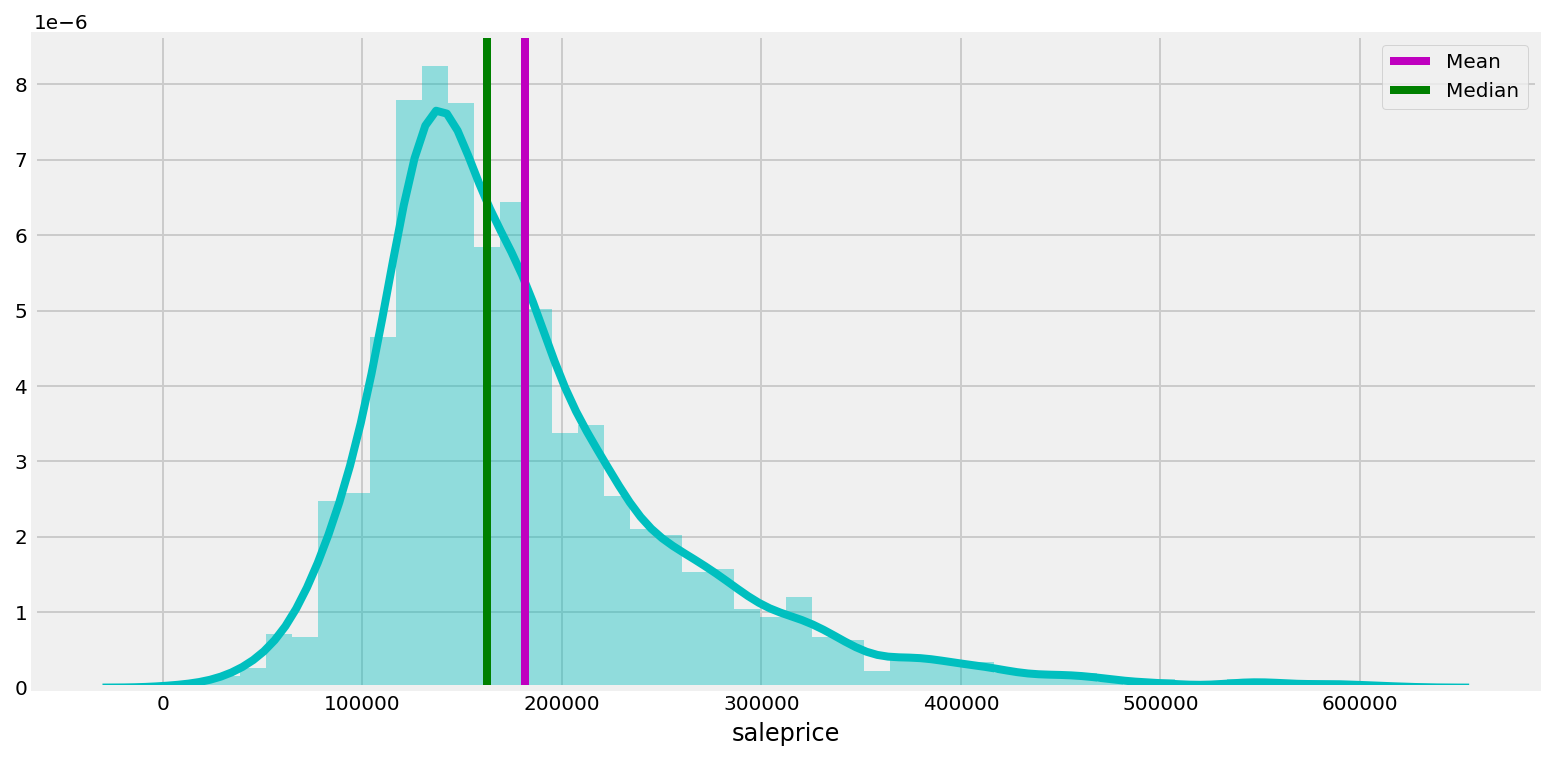

In [39]:
fig,ax=plt.subplots(figsize=(12,6))
sns.distplot(train["saleprice"],color="c",)
plt.axvline(x=train["saleprice"].mean(),color="m",label="Mean")
plt.axvline(x=train["saleprice"].median(),color="g",label="Median")
plt.legend(loc='upper right');

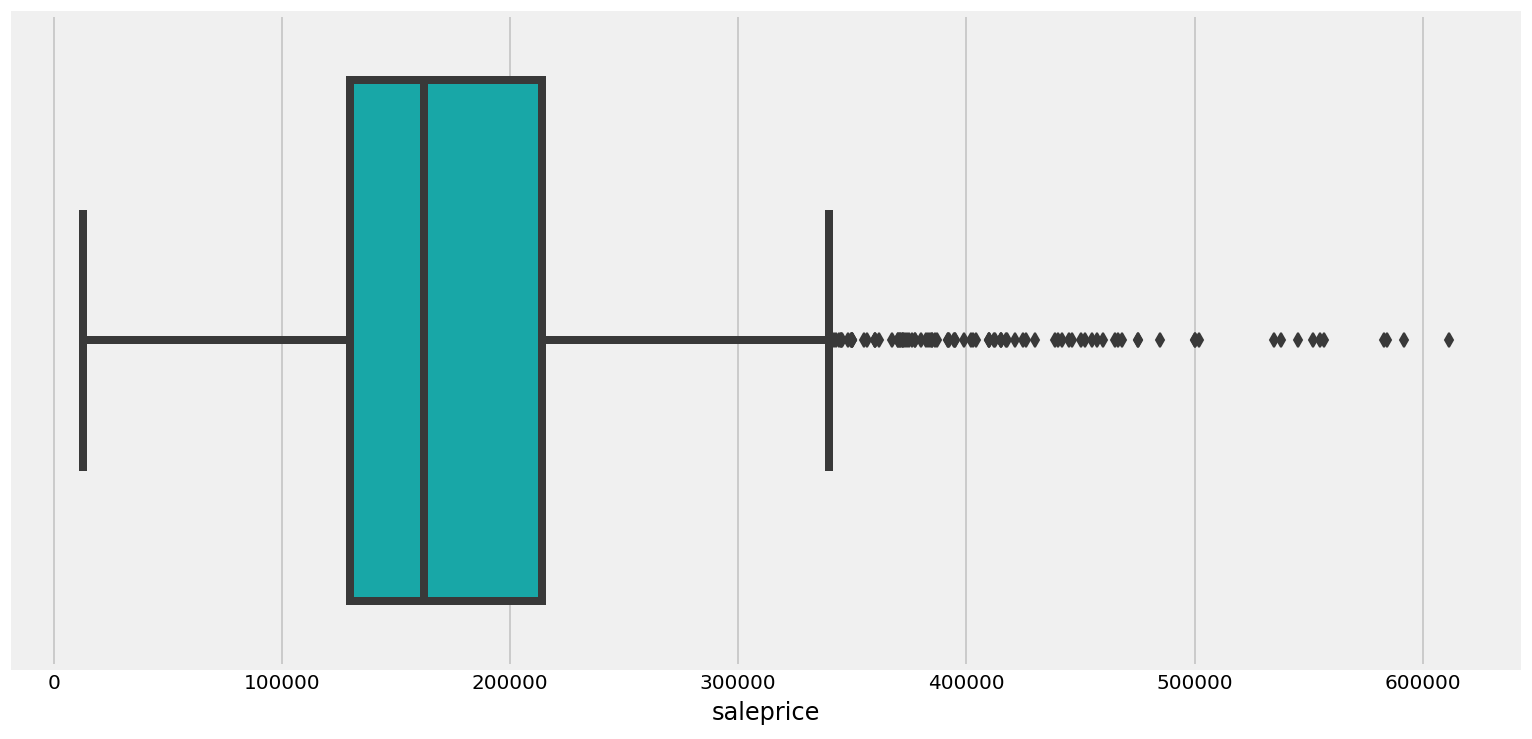

In [40]:
fig,ax=plt.subplots(figsize=(12,6))
ax=sns.boxplot(train["saleprice"],color="c",)

In [41]:
(train["saleprice"]>214000).value_counts()

False    1542
True      509
Name: saleprice, dtype: int64

#### Comments

The distribution of of saleprice is skewed to the right, with a median of 162500 and a mean of 181469.70. With IQ range ranging from 129825 to 214000. With 509 outliers above the upper quatile range. 



## EDA Nominal Features

In [42]:
len(nomi_feat)

26

In [43]:
train[nomi_feat].head(30)

ms_subclass ms_zoning street alley land_contour utilities lot_config  \
0           60        RL   Pave  None          Lvl    AllPub    CulDSac   
1           60        RL   Pave  None          Lvl    AllPub    CulDSac   
2           20        RL   Pave  None          Lvl    AllPub     Inside   
3           60        RL   Pave  None          Lvl    AllPub     Inside   
4           50        RL   Pave  None          Lvl    AllPub     Inside   
5           20        RL   Pave  None          Lvl    AllPub     Corner   
6          180        RM   Pave  None          Lvl    AllPub     Inside   
7           20        RL   Pave  None          Lvl    AllPub     Inside   
8           20        RL   Pave  None          Lvl    AllPub     Inside   
9           60        RL   Pave  None          HLS    AllPub     Inside   
10         160        RM   Pave  None          Lvl    AllPub     Inside   
11          20        RL   Pave  None          Lvl    AllPub     Inside   
12          70        RL   Pave  None          Bnk    AllPub        FR2   
13         160        FV   Pave  Pave          Lvl    AllPub     Inside   
14          20        RL   Pave  None          Lvl    AllPub     Inside   
15          20        RL   Pave  None          Lvl    AllPub     Inside   
16          70        RM   Pave  Grvl          Lvl    AllPub     Inside   
17          20        RL   Pave  None          Lvl    AllPub     Corner   
18          20        RL   Pave  None          Lvl    AllPub     Inside   
19          60        FV   Pave  None          Lvl    AllPub     Inside   
20          20        RL   Pave  None          Lvl    AllPub     Inside   
21         120        RL   Pave  None          Lvl    AllPub     Inside   
22          60        RL   Pave  None          Lvl    AllPub     Corner   
23          20        RL   Pave  None          Lvl    AllPub     Inside   
24         190        RL   Pave  None          Bnk    AllPub     Inside   
25          20        RL   Pave  None          Lvl    AllPub     Corner   
26          20        RL   Pave  None          Lvl    AllPub     Inside   
27          50        RL   Pave  Grvl          HLS    AllPub     Inside   
28         190   C (all)   Pave  None          Lvl    AllPub     Inside   
29          50        RL   Pave  None          Lvl    AllPub     Corner   

   neighborhood condition_1 condition_2 bldg_type house_style roof_style  \
0        Sawyer        RRAe        Norm      1Fam      2Story      Gable   
1       SawyerW        Norm        Norm      1Fam      2Story      Gable   
2         NAmes        Norm        Norm      1Fam      1Story      Gable   
3        Timber        Norm        Norm      1Fam      2Story      Gable   
4       SawyerW        Norm        Norm      1Fam      1.5Fin      Gable   
5         NAmes        PosA        Norm      1Fam      1Story      Gable   
6       Edwards        Norm        Norm    TwnhsE      SFoyer      Gable   
7         NAmes        Norm        Norm      1Fam      1Story        Hip   
8       OldTown      Artery        Norm      1Fam      1Story      Gable   
9         NAmes        Norm        Norm      1Fam      2Story      Gable   
10       BrDale        Norm        Norm     Twnhs      2Story      Gable   
11      CollgCr        Norm        Norm      1Fam      1Story      Gable   
12      SawyerW       Feedr        Norm      1Fam      2Story      Gable   
13      Somerst        Norm        Norm     Twnhs      2Story      Gable   
14      CollgCr        Norm        Norm      1Fam      1Story      Gable   
15      Mitchel        Norm        Norm      1Fam      1Story      Gable   
16      OldTown        Norm        Norm      1Fam      2Story      Gable   
17       Sawyer       Feedr        Norm      1Fam      1Story      Gable   
18       Sawyer        Norm        Norm      1Fam      1Story      Gable   
19      Somerst        Norm        Norm      1Fam      2Story      Gable   
20       Sawyer        Norm        Norm      1Fam      1Story      Gable   
21   

In [44]:
# splitting nominal features via freqency of variable within features at the threshold of 70%
nomi_feat_lowsig=[i for i in nomi_feat if train[i].value_counts(normalize=True).max()>0.7]
nomi_feat_sig=[i for i in nomi_feat if i not in nomi_feat_lowsig]                                            
                                              

In [45]:
len(nomi_feat_sig)

9

In [46]:
# double checking
train[nomi_feat_lowsig].describe()[-2:]

ms_zoning street alley land_contour utilities lot_config condition_1  \
top         RL   Pave  None          Lvl    AllPub     Inside        Norm   
freq      1598   2044  1911         1843      2049       1503        1767   

     condition_2 bldg_type roof_style roof_matl heating central_air  \
top         Norm      1Fam      Gable   CompShg    GasA           Y   
freq        2025      1700       1619      2025    2018        1910   

     electrical functional misc_feature sale_type  
top       SBrkr        Typ         None       WD   
freq       1868       1915         1986      1781

In [47]:
def sns_countplot(df,col_list,font,rotation):
    '''function that subplots counterplot using SNS'''
    data=pd.melt(df,value_vars=col_list)
    sns.set(font_scale=font)  
    g=sns.FacetGrid(data,col="variable",col_wrap=4,sharex=False, sharey=False)
    g=g.map(sns.countplot,"value")
    for i in g.axes.flat:
        plt.setp(i.get_xticklabels(), rotation=rotation)
    g.fig.tight_layout()

/Users/waynechiang/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


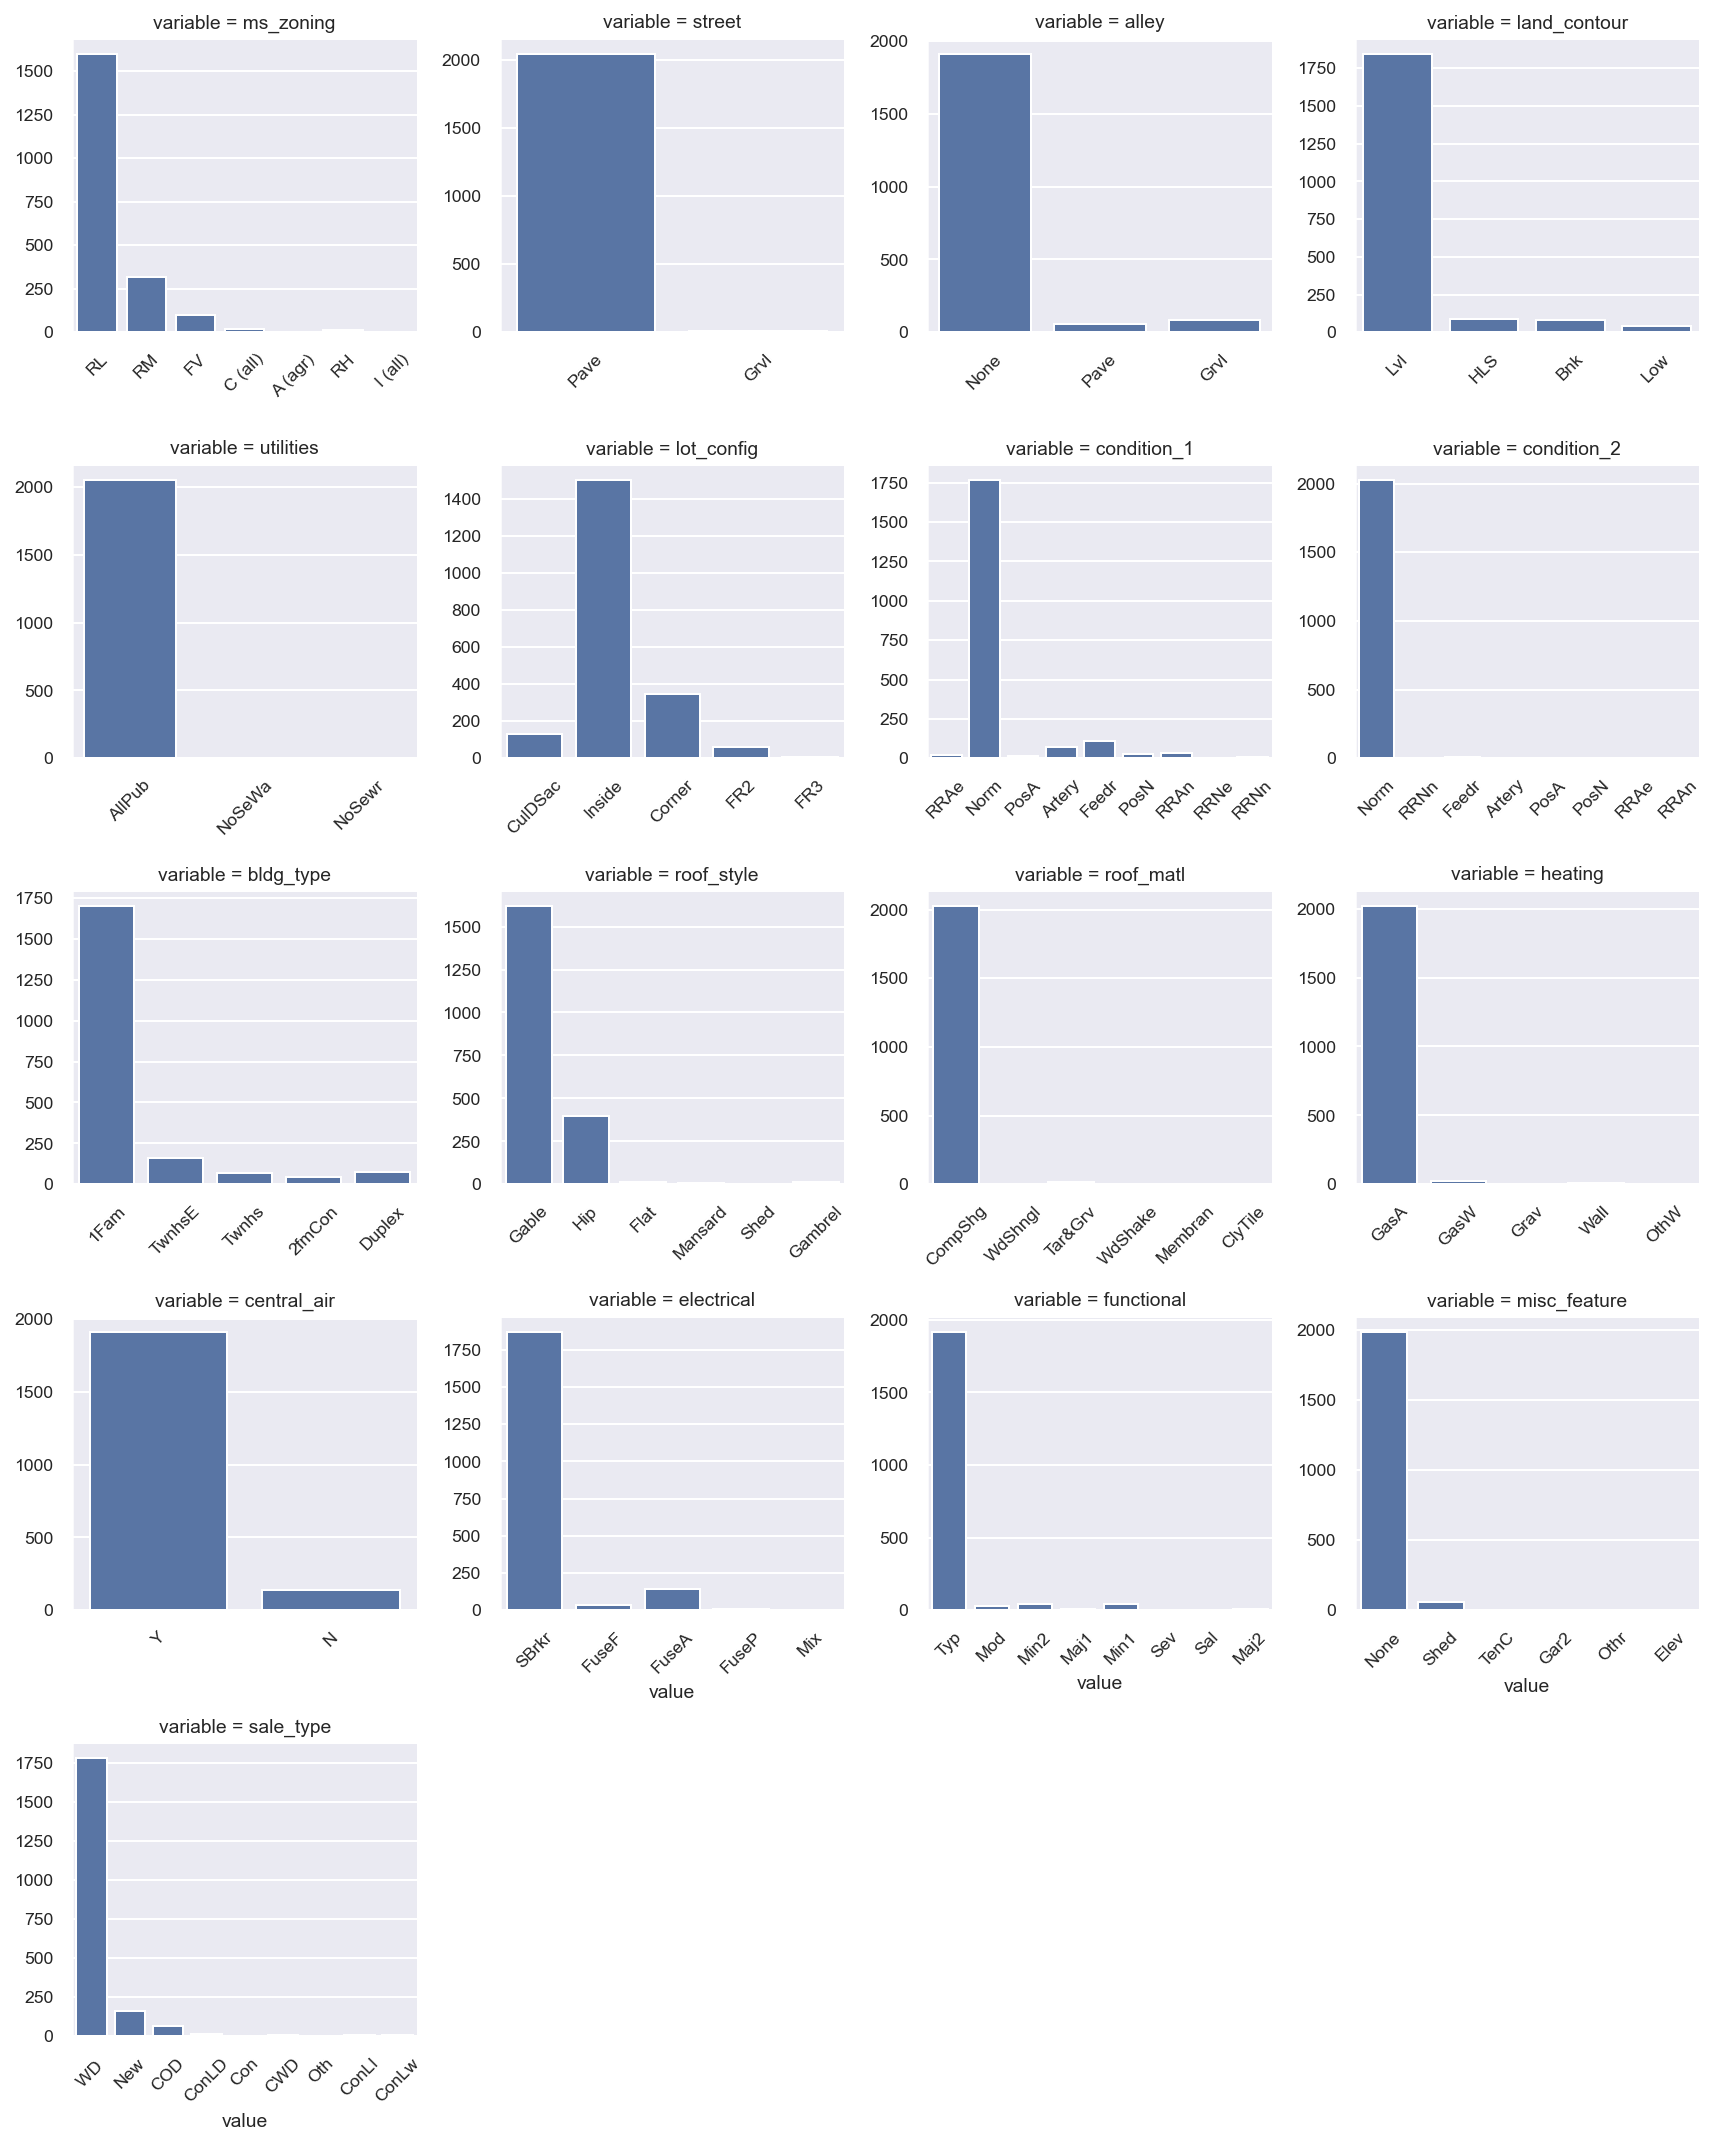

In [48]:
sns_countplot(train,nomi_feat_lowsig,0.8,45);

#### Comments
This shows an overview of all norminal features that with varible freqency greater then 70%. I have decided to exclude these features in the models as they will not be able to be good predictors of saleprice as their have a majority of a single variable in each feature.

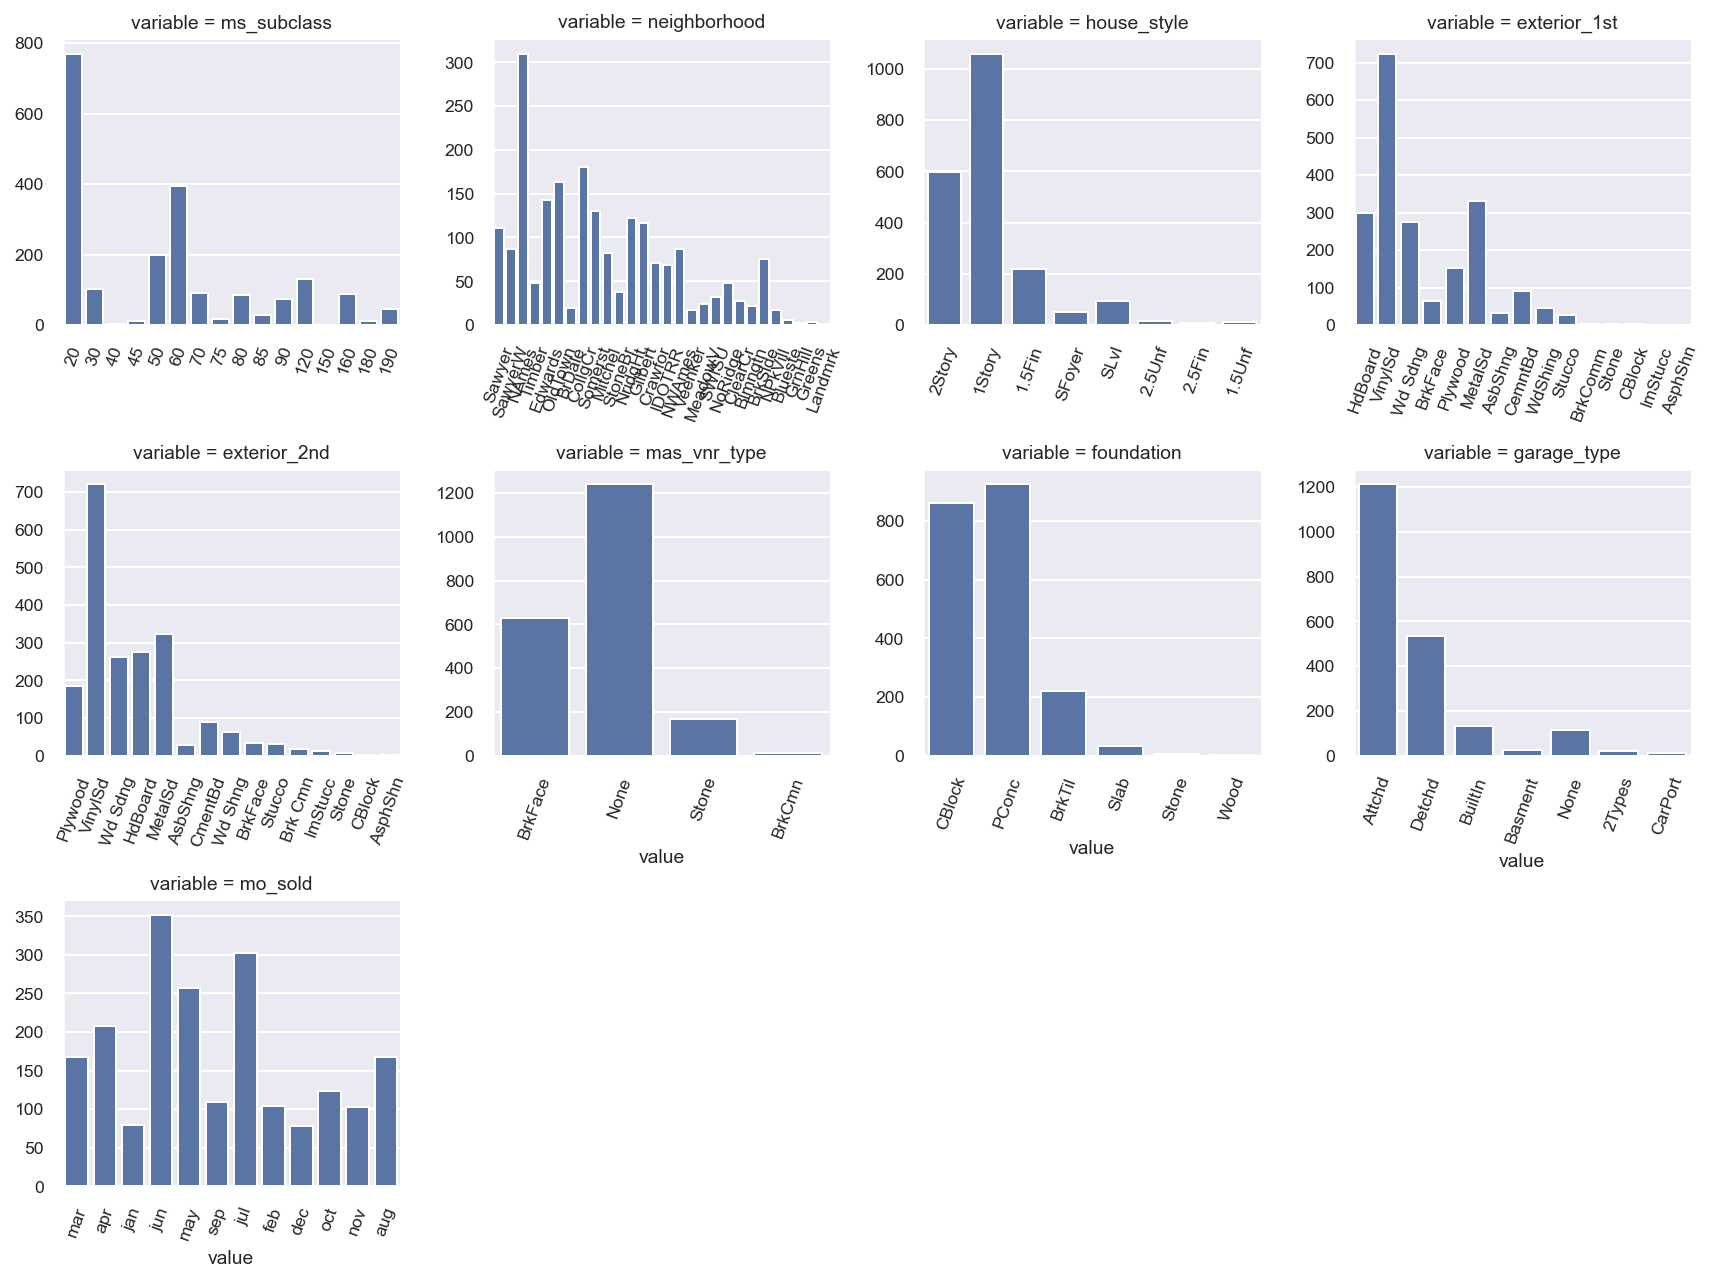

In [49]:
sns_countplot(train,nomi_feat_sig,0.8,70);

#### Comments
This is an overview of features that has a better spread in their distribution. All of them tend to show trends of either being randomly spread or a distribution shape that is skewed to the right, showing similarities with the distribution shape of salesprice.

## EDA Ordinal Features

In [50]:
# train[ordi_feat].loc[train[ordi_feat].corr()["saleprice"]>0.15,:]
ordi_feat

['lot_shape',
 'land_slope',
 'exter_qual',
 'exter_cond',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'heating_qc',
 'kitchen_qual',
 'fireplace_qu',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'pool_qc',
 'fence']

In [51]:
# splitting ordinal features via freqency of variable within features at the threshold of 70%
ordi_feat_lowsig=[i for i in ordi_feat if train[i].value_counts(normalize=True).max()>0.7]
ordi_feat_sig=[i for i in ordi_feat if i not in ordi_feat_lowsig]


ordi_feat_sig

['lot_shape',
 'exter_qual',
 'bsmt_qual',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'heating_qc',
 'kitchen_qual',
 'fireplace_qu',
 'garage_finish']

In [52]:
ordi_feat.append("saleprice") # RUN ONCE 

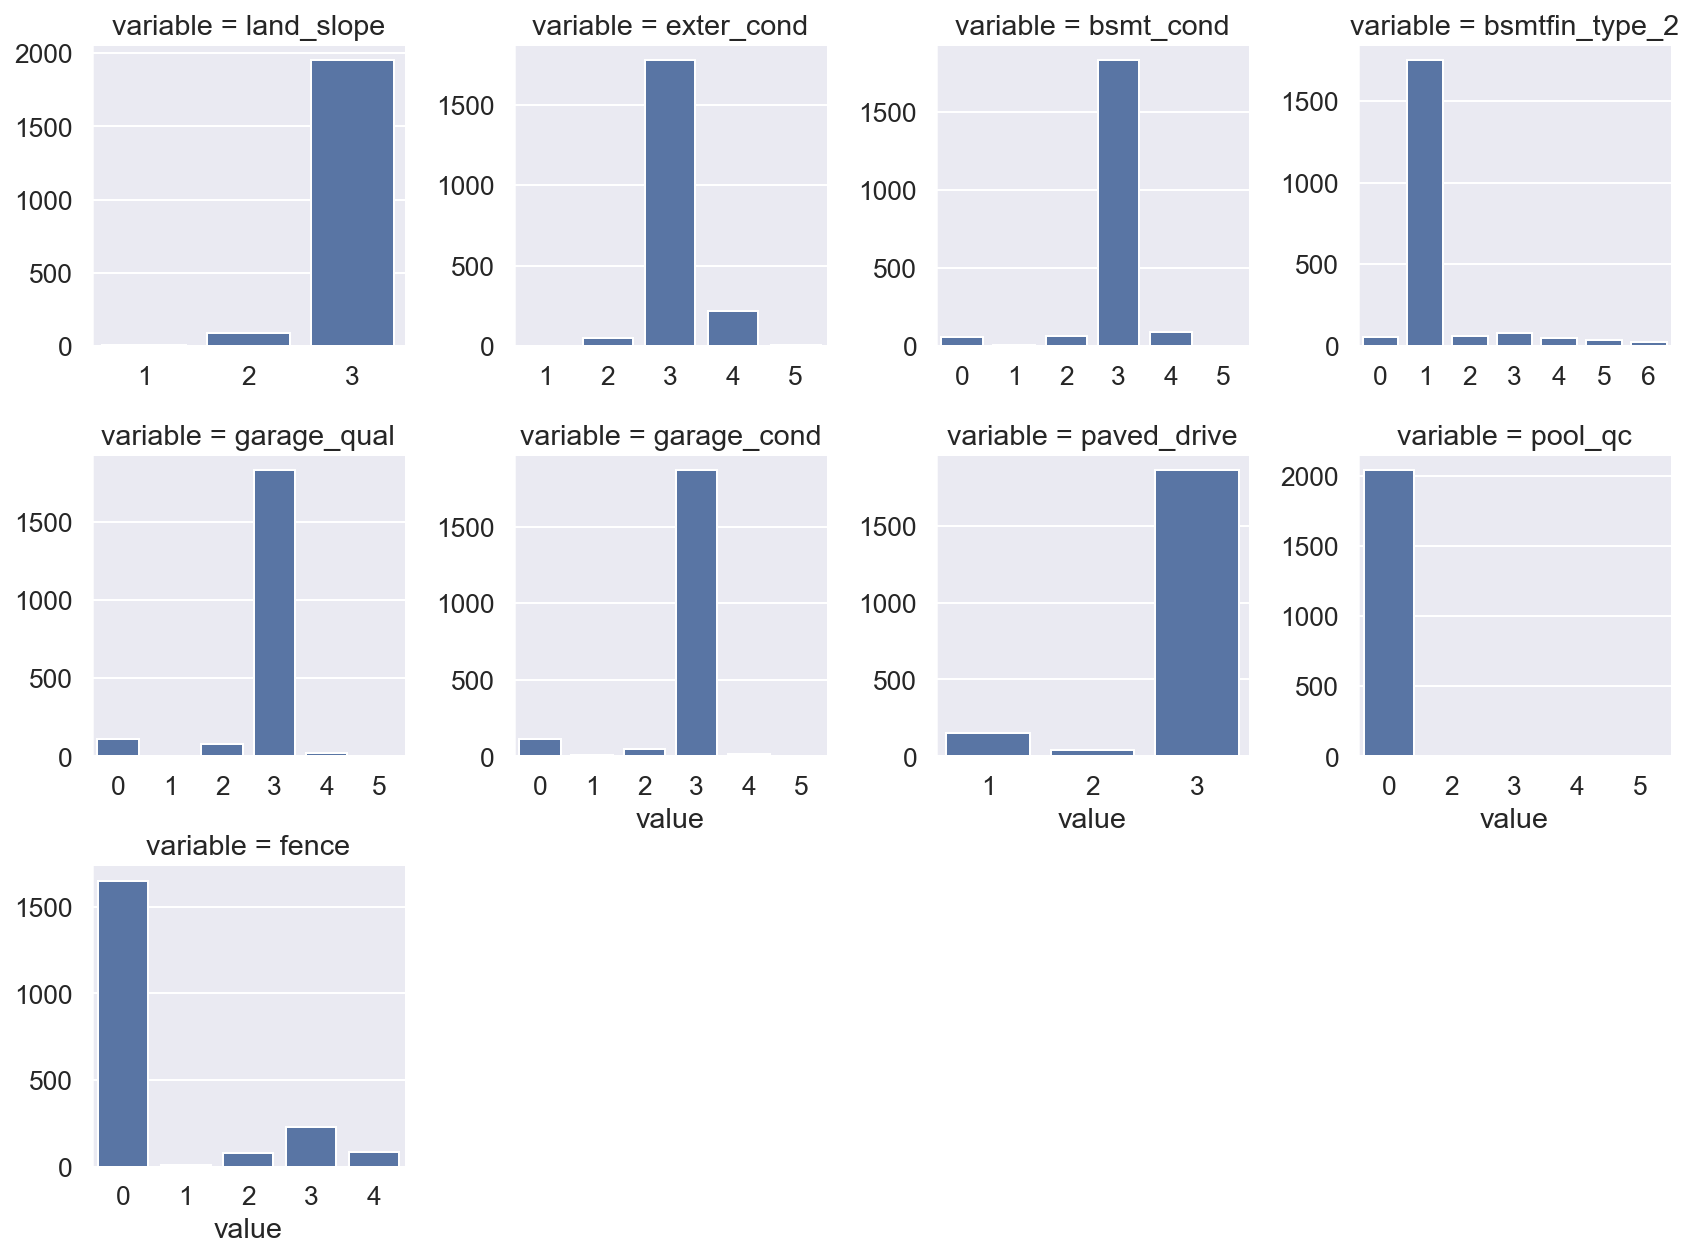

In [53]:
sns_countplot(train,ordi_feat_lowsig,1.2,0);

#### Comments
This shows an overview of all ordinal features that with varible freqency greater then 70%. I have decided to exclude these features in the models as they will not be able to be good predictors of saleprice as their have a majority of a single variable in each feature.

In [54]:
# ordi_feat_sig.remove("saleprice")

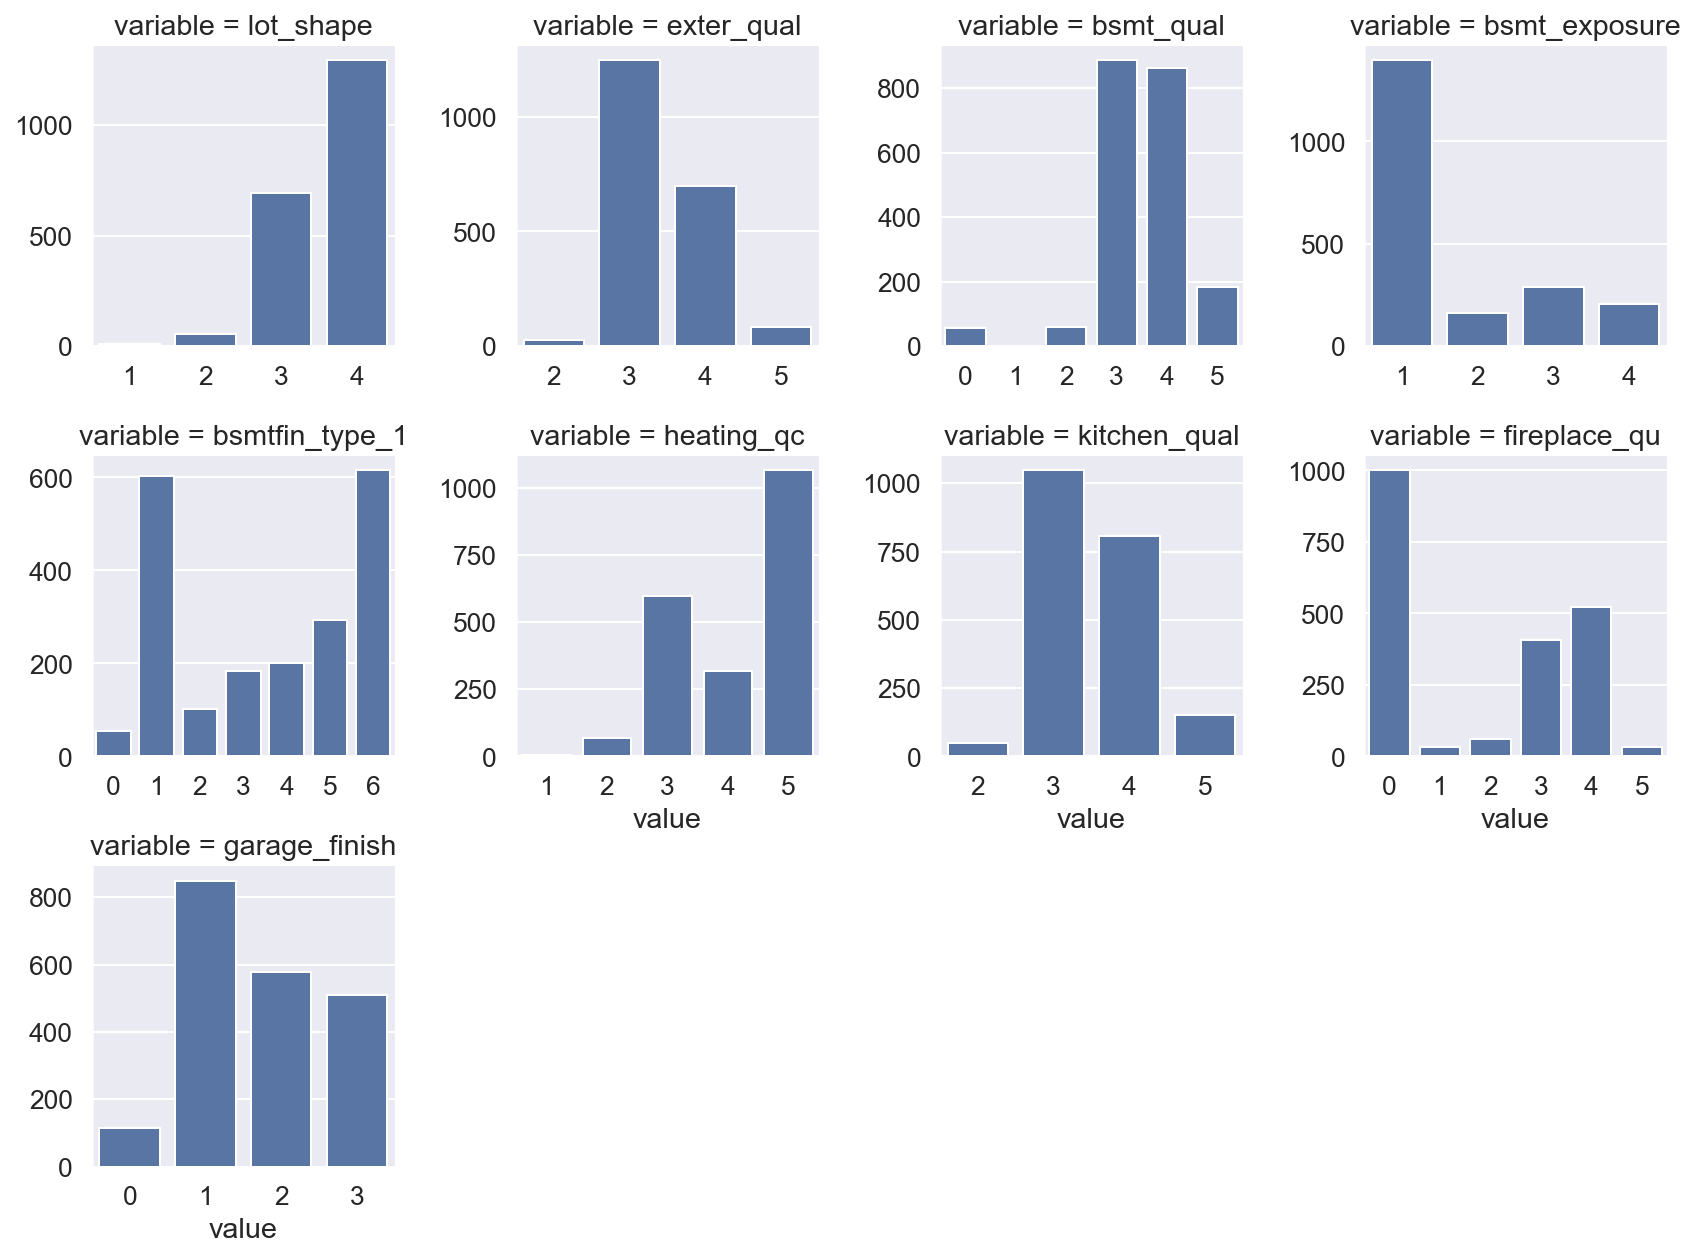

In [55]:
sns_countplot(train,ordi_feat_sig,1.2,0);

#### Comments
This is an overview of features that has a better spread in their distribution. All of them tend to show trends of either being randomly spread or a distribution shape that is skewed to the right, showing similarities with the distribution shape of salesprice.

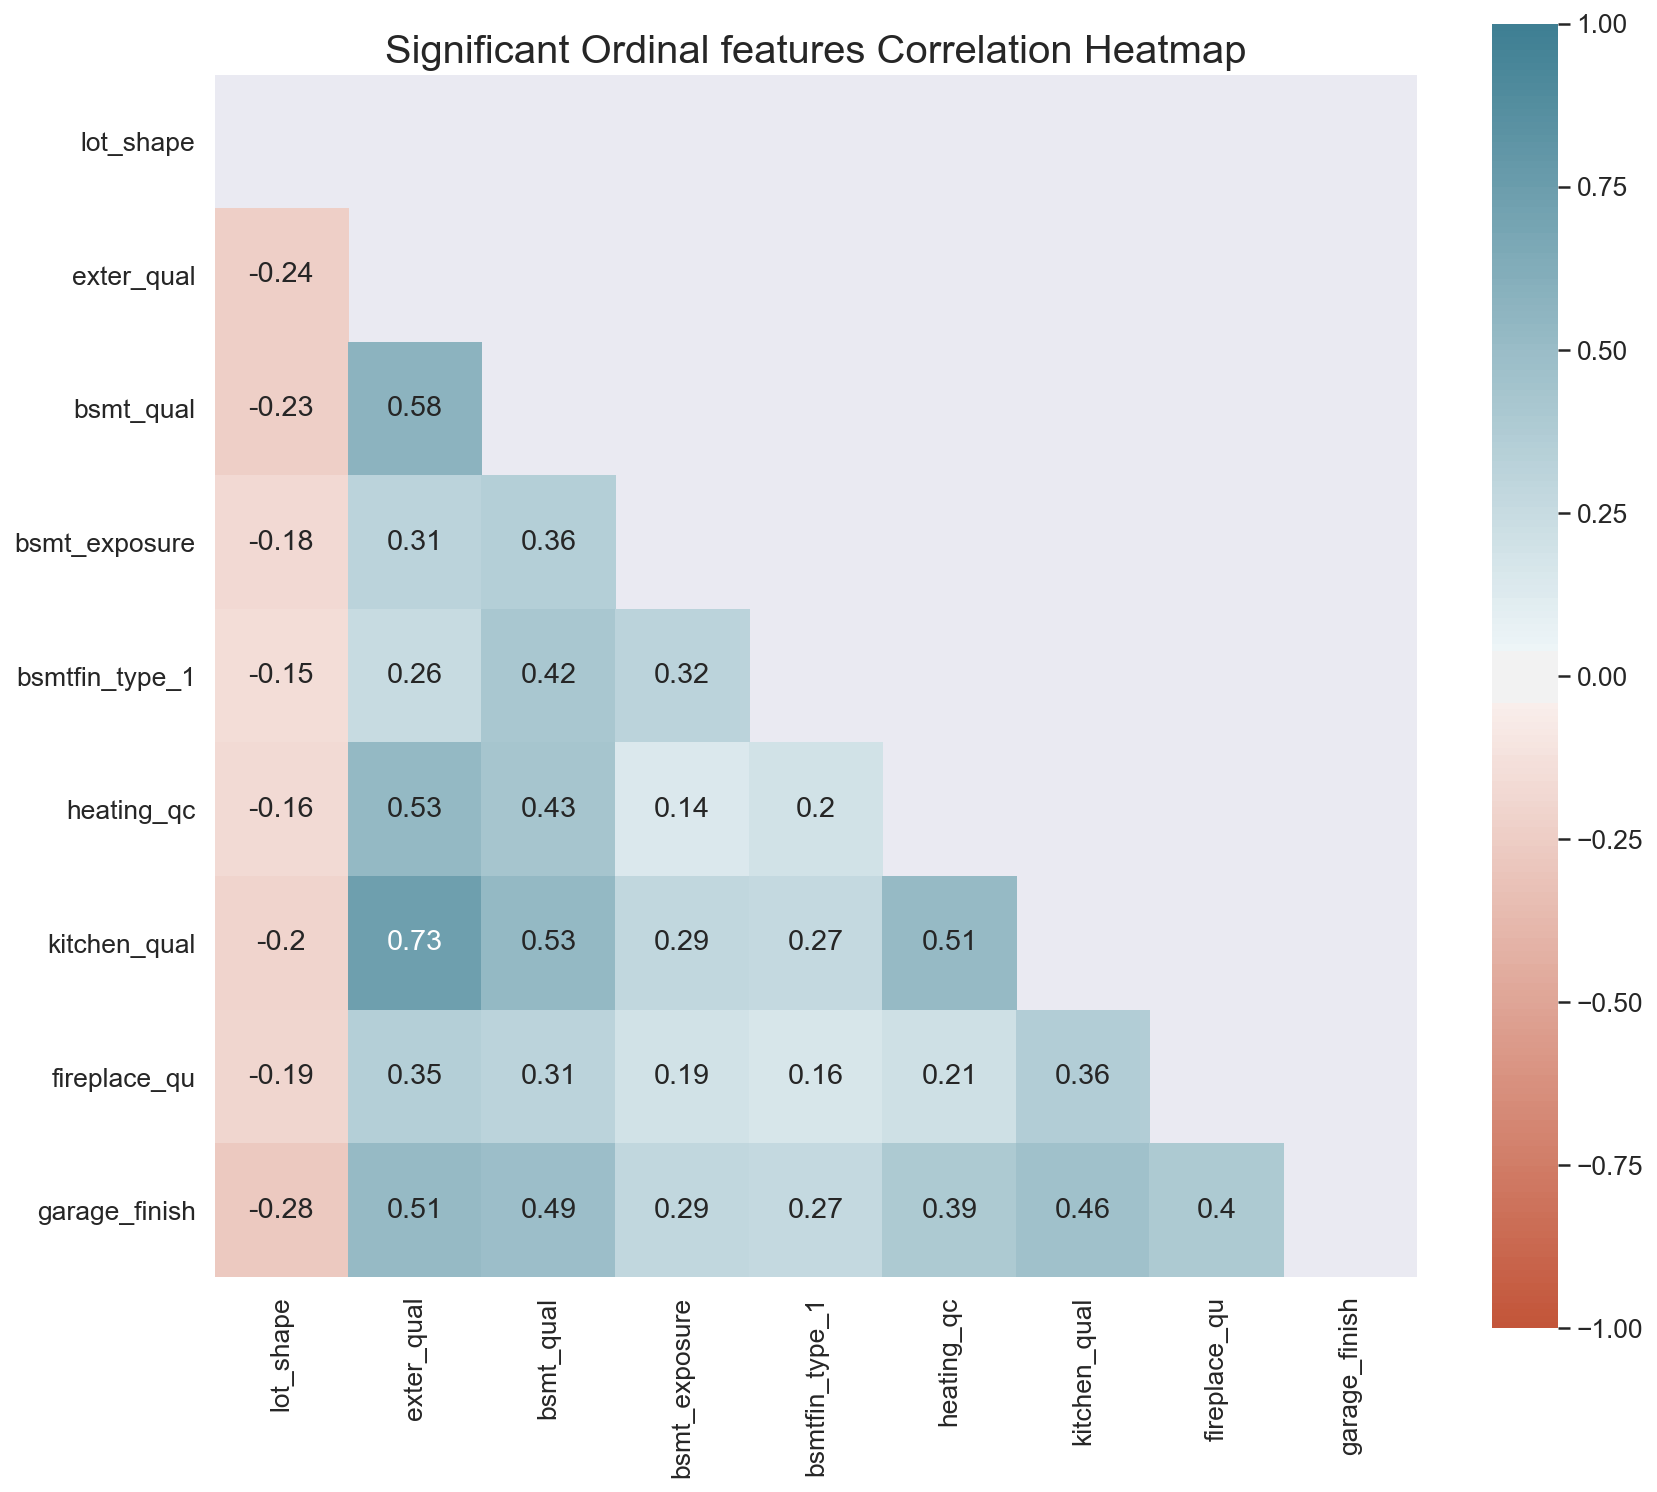

In [56]:
# ordi_final_sig
corr= train[ordi_feat_sig].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(12,12))
ax=plt.axes()
ax.set_title("Significant Ordinal features Correlation Heatmap", fontdict={"fontsize":20})
sns.heatmap(corr,annot=True,vmax=1,vmin=-1
            ,mask= mask,ax=ax,square=True
            ,cmap=sns.diverging_palette(20, 220, n=200));

#### Comments

Only lot price seems to have an overall lower correlation to other features, while the rest of the features generally have a positive correlation with none of them having an absolute correlation of more then 0.9. 

In [57]:
ordi_feat_sig.append("saleprice")

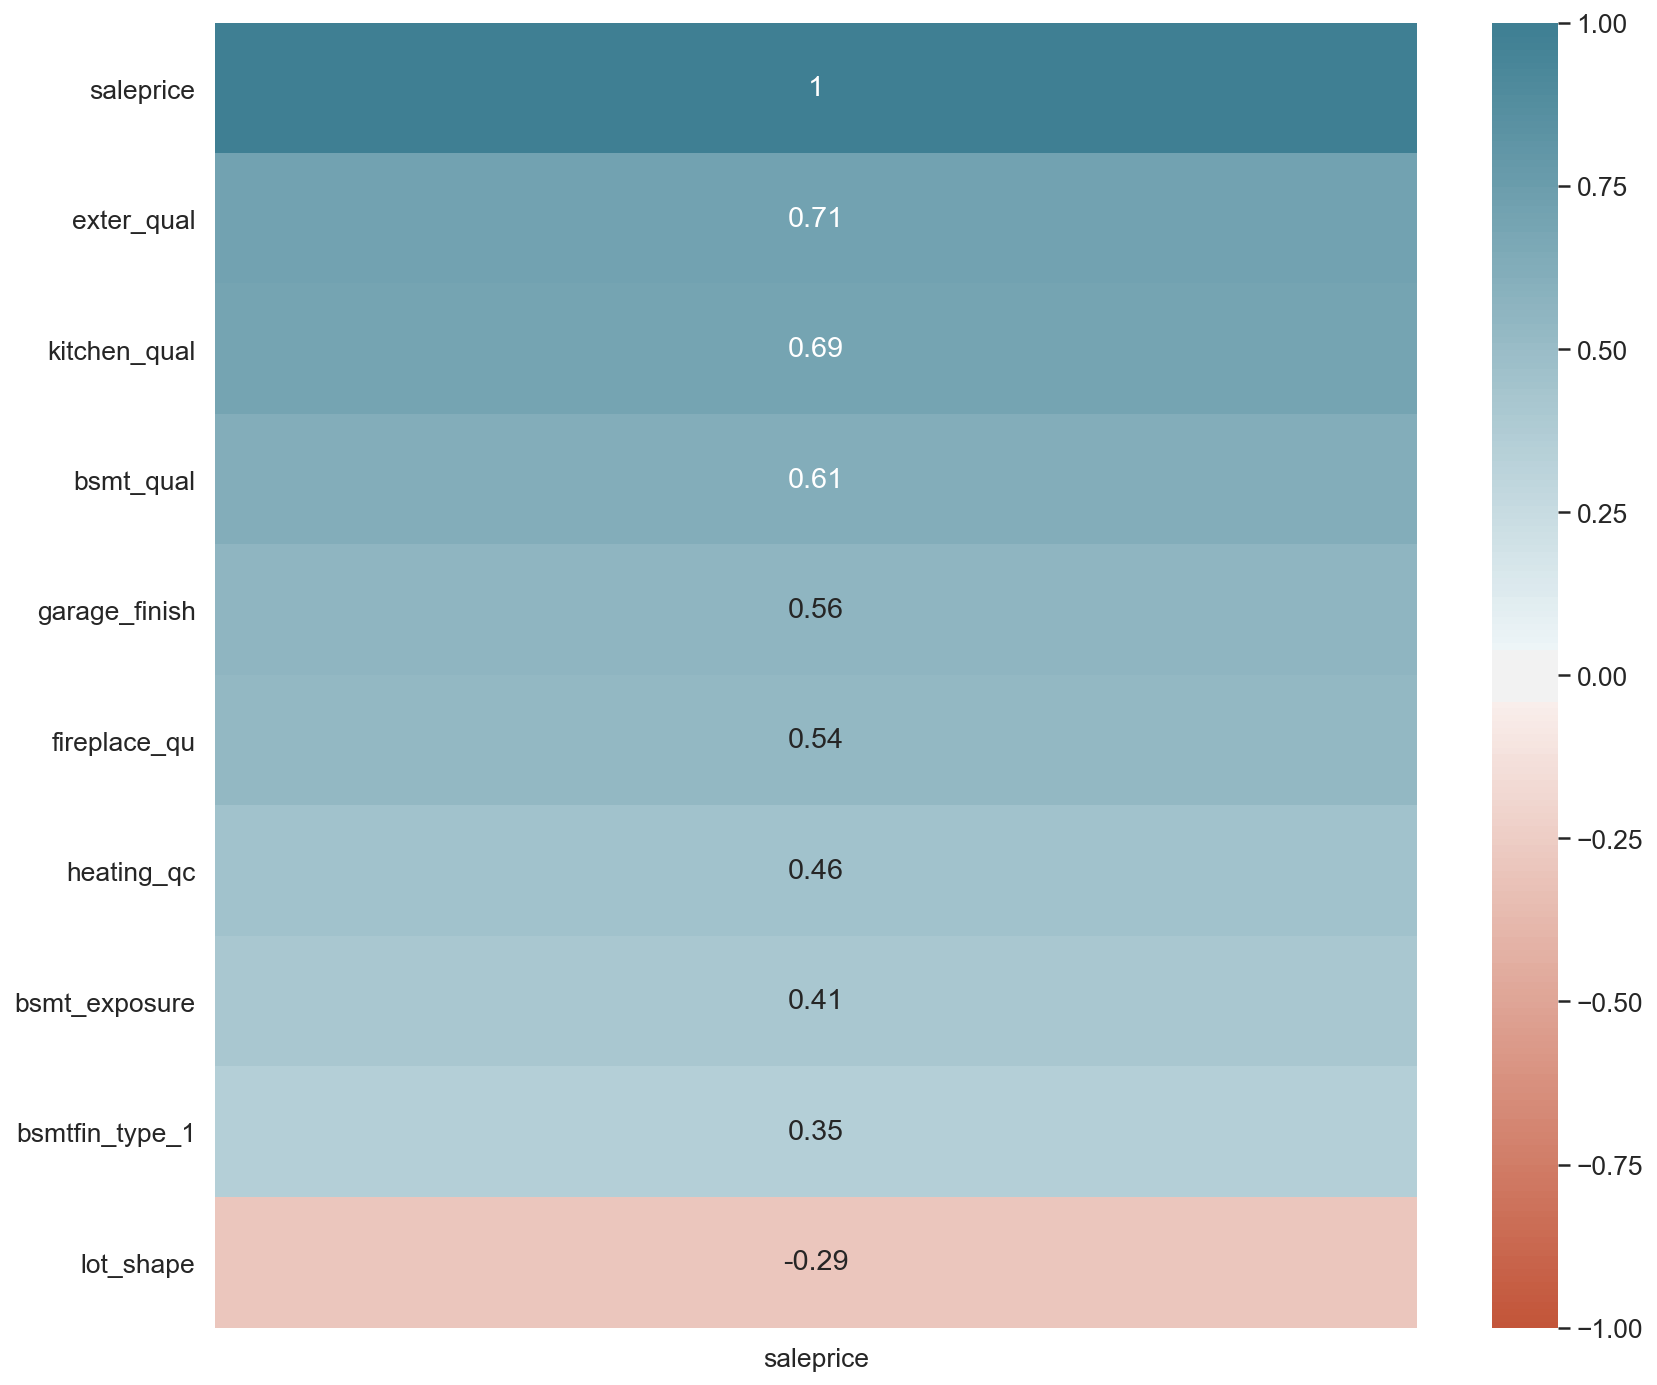

In [58]:
fig=plt.figure(figsize=(12,12))
sns.heatmap(train[ordi_feat_sig].corr()[["saleprice"]].sort_values("saleprice",ascending=False)
            ,vmax=1, vmin=-1, annot=True
            ,cmap=sns.diverging_palette(20, 220, n=200));

#### Comments

This is a more focused correlation heatmap of salesprices and the significant ordinal features. None of them have a correlation of more/less then +/- 0.2, meaning that they are have some form of correlation with salesprices.

## Continous Features

In [59]:
def sns_distplots(df,col_list):
    """plots mutliple distribution subplots """
    data=pd.melt(df,value_vars=col_list)
    g=sns.FacetGrid(data,col="variable",col_wrap=4,sharex=False, sharey=False)
    g=g.map(sns.distplot,"value")
    

def sns_boxplot(df,col_list,font,rotation):
    """plots mutliple boxplot subplots """
    data=pd.melt(df,value_vars=col_list)
    sns.set(font_scale=font)  
    g=sns.FacetGrid(data,col="variable",col_wrap=4,sharex=False, sharey=False)
    g=g.map(sns.boxplot,"value", order=None)
    for i in g.axes.flat:
        plt.setp(i.get_xticklabels(), rotation=rotation)
    g.fig.tight_layout()    

In [60]:
# splitting continuous features via freqency of variable within features at the threshold of 80%
cont_feat_lowsig=[i for i in cont_feat if train[i].value_counts(normalize=True).max()>0.80]
cont_feat_sig=[i for i in cont_feat if i not in cont_feat_lowsig]


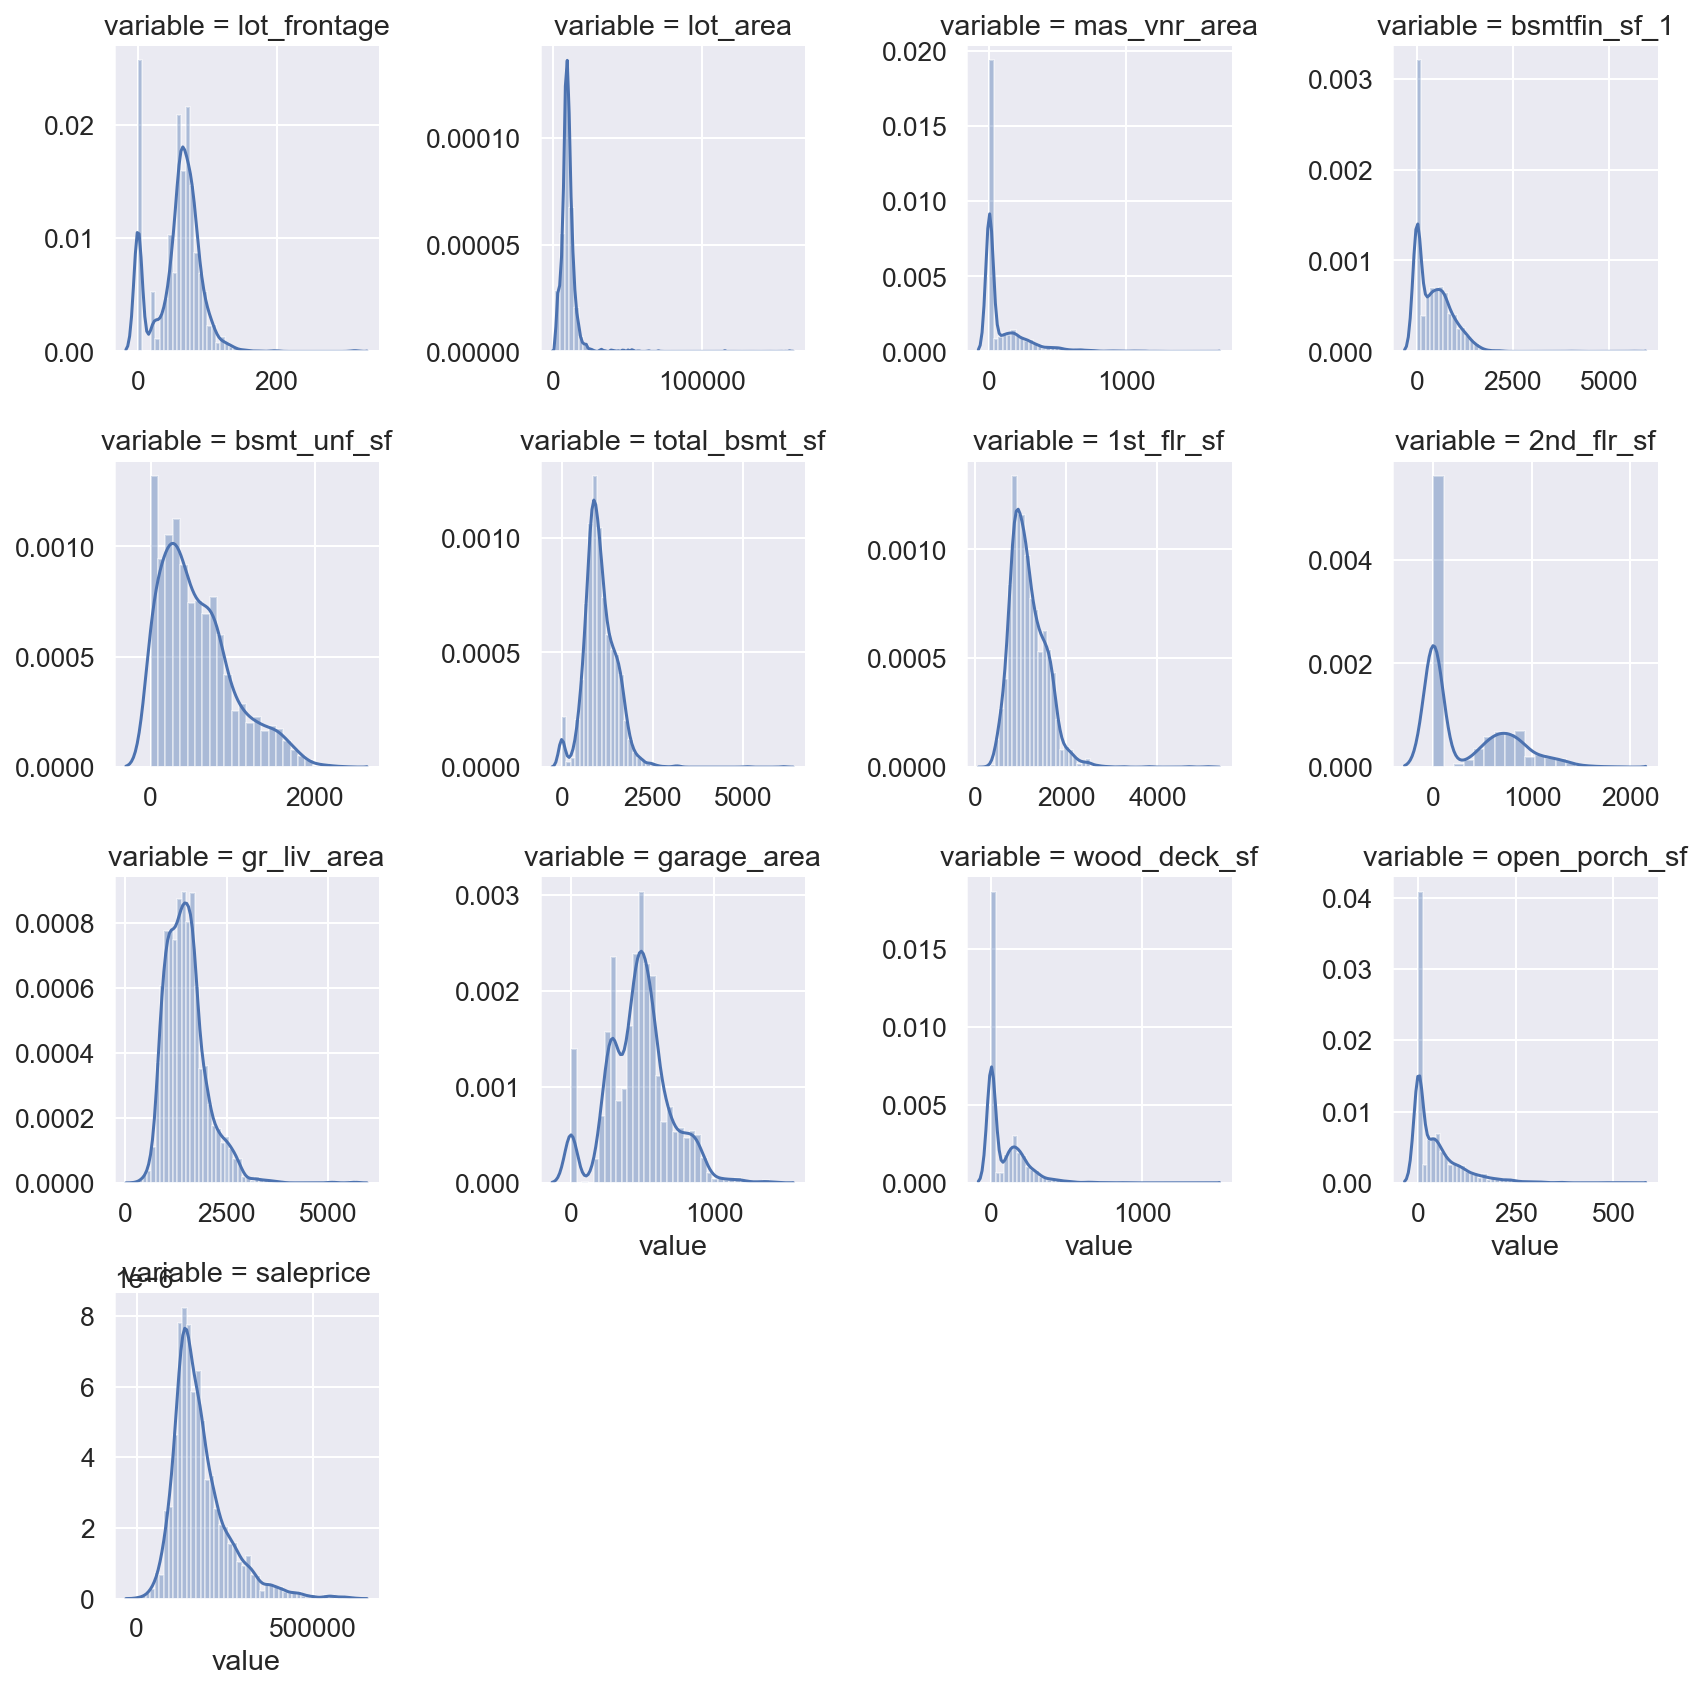

In [61]:
# ploting displots for significant continous features
sns_distplots(train,cont_feat_sig);

#### Comments

This is an overview of features that has a better spread in their distribution. All of them tend to show trends of either being randomly spread or a distribution shape that is skewed to the right, showing similarities with the distribution shape of salesprice.

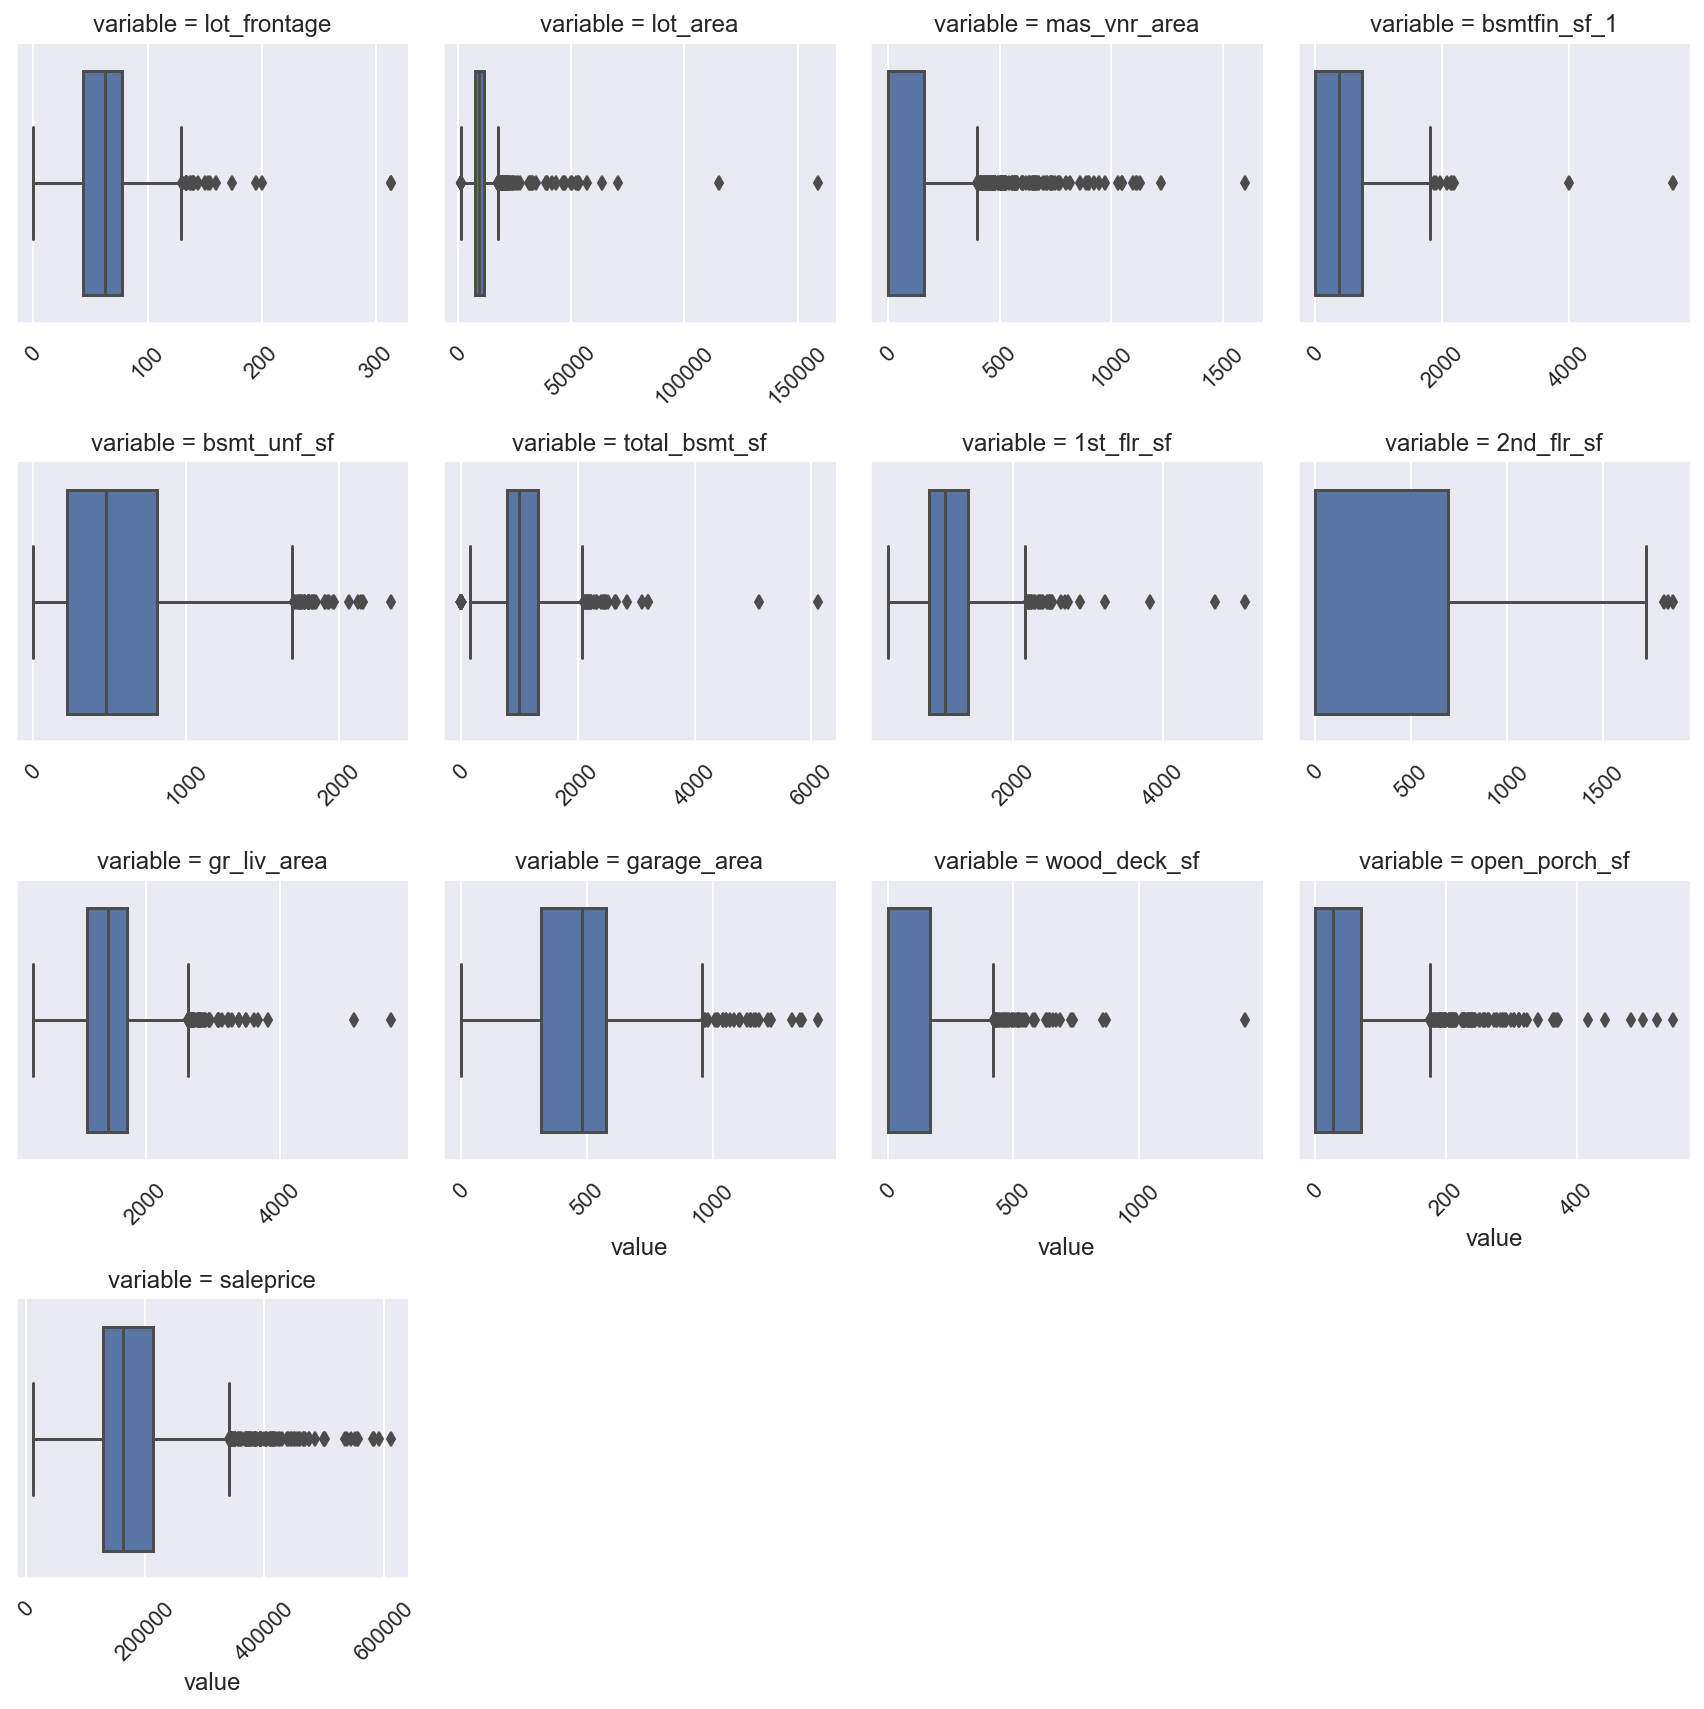

In [62]:
# ploting boxplots of significant continuous features
sns_boxplot(train,cont_feat_sig,1,45);

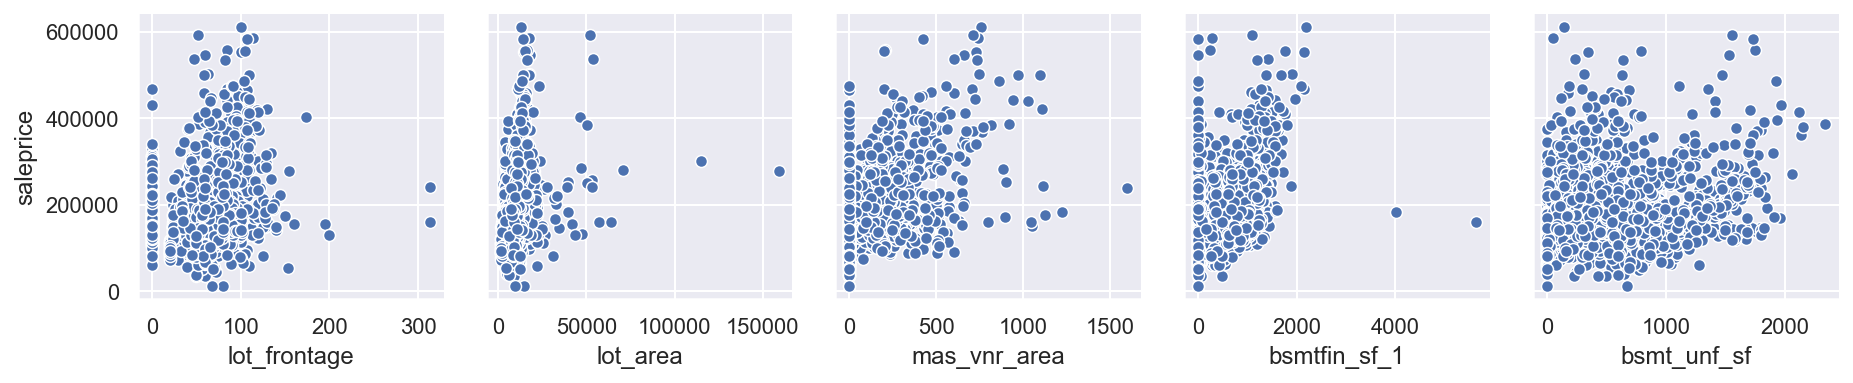

In [63]:

sns.pairplot(train,x_vars=cont_feat_sig[0:5],y_vars="saleprice");


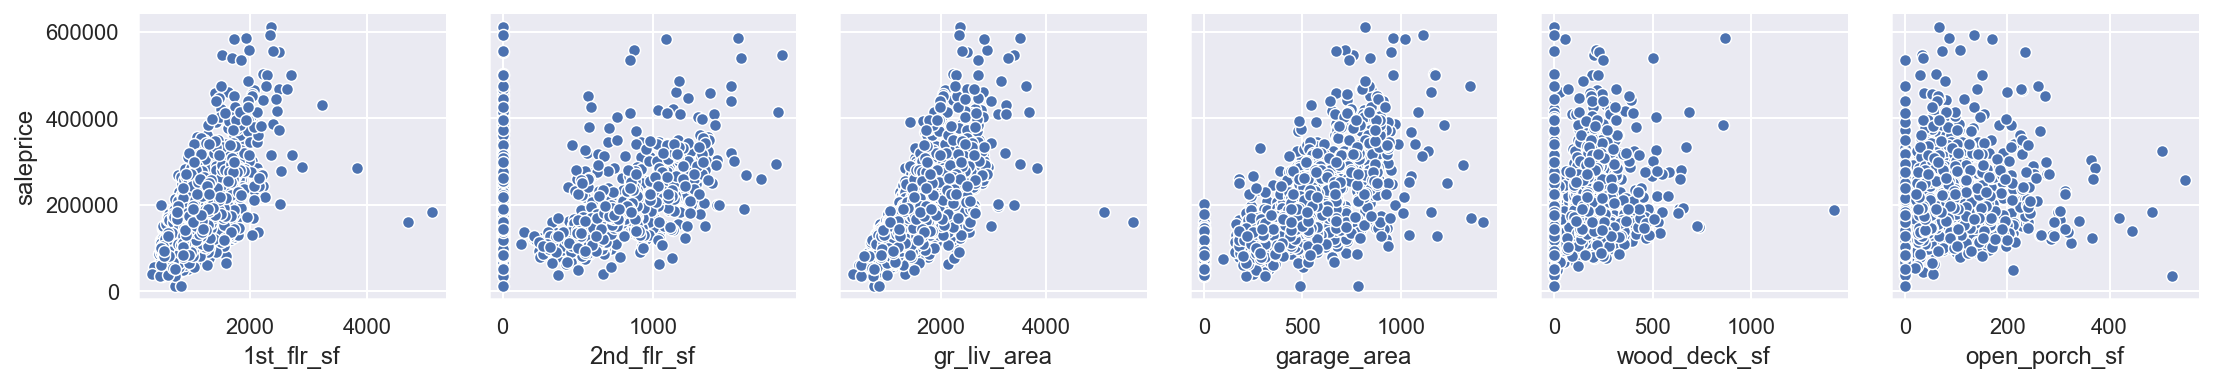

In [64]:
sns.pairplot(train,x_vars=cont_feat_sig[6:-1],y_vars="saleprice");


#### Comments
Both the boxplots and scatter plots shows the outliers in continous features such as gr_liv_area, wood_deck_sf,total_bsmt_sf,lot_frontage, 1st_flr_sf,bsmt_sf_1, lot_area and mas_vnr_area.


## Dealing with Outliers



In [65]:
train.loc[train["lot_area"]>100000,:]

id        pid ms_subclass ms_zoning  lot_frontage  lot_area street  \
471  2116  906426060          50        RL           0.0    159000   Pave   
694  2072  905301050          20        RL           0.0    115149   Pave   

    alley  lot_shape land_contour utilities lot_config  land_slope  \
471  None          2          Low    AllPub    CulDSac           1   
694  None          2          Low    AllPub    CulDSac           1   

    neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
471      ClearCr        Norm        Norm      1Fam      1.5Fin             6   
694      ClearCr        Norm        Norm      1Fam      1Story             7   

     overall_cond roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  \
471             7      Gable   CompShg      Wd Sdng      HdBoard       BrkCmn   
694             5      Gable   CompShg      Plywood      Plywood        Stone   

     mas_vnr_area  exter_qual  exter_cond foundation  bsmt_qual  bsmt_cond  \
471         472.0           4           3     CBlock          4          3   
694         351.0           3           3     CBlock          4          3   

     bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  \
471              4               3         697.0               1   
694              4               6        1219.0               1   

     bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  heating_qc central_air  \
471           0.0        747.0         1444.0    GasA           4           Y   
694           0.0        424.0         1643.0    GasA           3           Y   

    electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
471      SBrkr        1444         700                0         2144   
694      SBrkr        1824           0                0         1824   

     bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
471             0.0             1.0          2          0              4   
694             1.0             0.0          2          0              2   

     kitchen_abvgr  kitchen_qual  totrms_abvgrd functional  fireplaces  \
471              1             4              7        Typ           2   
694              1             4              5        Typ           2   

     fireplace_qu garage_type  garage_finish  garage_cars  garage_area  \
471             3      Attchd              3          2.0        389.0   
694             3      Attchd              1          2.0        739.0   

     garage_qual  garage_cond  paved_drive  wood_deck_sf  open_porch_sf  \
471            3            3            3             0             98   
694            3            3            3           380             48   

     enclosed_porch  3ssn_porch  screen_porch  pool_area  pool_qc  fence  \
471               0           0             0          0        0      0   
694               0           0             0          0        0      0   

    misc_feature  misc_val mo_sold sale_type  saleprice  age  garage_age  \
471         Shed       500     jun       WD      277000   49          49   
694         None         0     jun       WD      302000   36          36   

     remodel  
471        1  
694        1

In [66]:
train.drop(train.loc[train["lot_area"]>100000,:].index,axis=0,inplace=True)

In [67]:
train.loc[train["gr_liv_area"]>4000,:]

id        pid ms_subclass ms_zoning  lot_frontage  lot_area street  \
960   1499  908154235          60        RL         313.0     63887   Pave   
1885  2181  908154195          20        RL         128.0     39290   Pave   

     alley  lot_shape land_contour utilities lot_config  land_slope  \
960   None          1          Bnk    AllPub     Corner           3   
1885  None          3          Bnk    AllPub     Inside           3   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
960       Edwards       Feedr        Norm      1Fam      2Story            10   
1885      Edwards        Norm        Norm      1Fam      1Story            10   

      overall_cond roof_style roof_matl exterior_1st exterior_2nd  \
960              5        Hip   ClyTile       Stucco       Stucco   
1885             5        Hip   CompShg      CemntBd      CmentBd   

     mas_vnr_type  mas_vnr_area  exter_qual  exter_cond foundation  bsmt_qual  \
960         Stone         796.0           5           3      PConc          5   
1885        Stone        1224.0           5           3      PConc          5   

      bsmt_cond  bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  \
960           3              4               6        5644.0               1   
1885          3              4               6        4010.0               1   

      bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  heating_qc  \
960            0.0        466.0         6110.0    GasA           5   
1885           0.0       1085.0         5095.0    GasA           5   

     central_air electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  \
960            Y      SBrkr        4692         950                0   
1885           Y      SBrkr        5095           0                0   

      gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  \
960          5642             2.0             0.0          2          1   
1885         5095             1.0             1.0          2          1   

      bedroom_abvgr  kitchen_abvgr  kitchen_qual  totrms_abvgrd functional  \
960               3              1             5             12        Typ   
1885              2              1             5             15        Typ   

      fireplaces  fireplace_qu garage_type  garage_finish  garage_cars  \
960            3             4      Attchd              3          2.0   
1885           2             4      Attchd              3          3.0   

      garage_area  garage_qual  garage_cond  paved_drive  wood_deck_sf  \
960        1418.0            3            3            3           214   
1885       1154.0            3            3            3           546   

      open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area  \
960             292               0           0             0        480   
1885            484               0           0             0          0   

      pool_qc  fence misc_feature  misc_val mo_sold sale_type  saleprice  age  \
960         4      0         None         0     jan       New     160000    0   
1885        0      0         Elev     17000     oct       New     183850    0   

      garage_age  remodel  
960            0        0  
1885           0        1

In [68]:
train.drop(train.loc[train["gr_liv_area"]>4000,:].index,axis=0,inplace=True)

In [69]:
train.loc[train["lot_frontage"]>300,:]

id        pid ms_subclass ms_zoning  lot_frontage  lot_area street  \
1335  1266  535427070          20        RL         313.0     27650   Pave   

     alley  lot_shape land_contour utilities lot_config  land_slope  \
1335  None          2          HLS    AllPub     Inside           2   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
1335        NAmes        PosA        Norm      1Fam      1Story             7   

      overall_cond roof_style roof_matl exterior_1st exterior_2nd  \
1335             7       Flat   Tar&Grv      Wd Sdng      Wd Sdng   

     mas_vnr_type  mas_vnr_area  exter_qual  exter_cond foundation  bsmt_qual  \
1335         None           0.0           3           3     CBlock          4   

      bsmt_cond  bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  \
1335          3              4               6         425.0               1   

      bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  heating_qc  \
1335           0.0        160.0          585.0    GasA           5   

     central_air electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  \
1335           Y      SBrkr        2069           0                0   

      gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  \
1335         2069             1.0             0.0          2          0   

      bedroom_abvgr  kitchen_abvgr  kitchen_qual  totrms_abvgrd functional  \
1335              4              1             4              9        Typ   

      fireplaces  fireplace_qu garage_type  garage_finish  garage_cars  \
1335           1             4      Attchd              2          2.0   

      garage_area  garage_qual  garage_cond  paved_drive  wood_deck_sf  \
1335        505.0            3            3            3             0   

      open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area  \
1335              0               0           0             0          0   

      pool_qc  fence misc_feature  misc_val mo_sold sale_type  saleprice  age  \
1335        0      0         None         0     nov       WD      242000   48   

      garage_age  remodel  
1335          48        1

In [70]:
train.drop(train.loc[train["lot_frontage"]>300,:].index,axis=0,inplace=True)

In [71]:
train.loc[train["wood_deck_sf"]>1000,:]

id        pid ms_subclass ms_zoning  lot_frontage  lot_area street  \
966  2294  923229100          80        RL           0.0     15957   Pave   

    alley  lot_shape land_contour utilities lot_config  land_slope  \
966  None          3          Low    AllPub     Corner           2   

    neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
966      Mitchel        Norm        Norm      1Fam        SLvl             6   

     overall_cond roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  \
966             6      Gable   CompShg      HdBoard      Plywood         None   

     mas_vnr_area  exter_qual  exter_cond foundation  bsmt_qual  bsmt_cond  \
966           0.0           3           3      PConc          4          3   

     bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  \
966              4               6        1148.0               1   

     bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  heating_qc central_air  \
966           0.0         96.0         1244.0    GasA           3           Y   

    electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
966      SBrkr        1356           0                0         1356   

     bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
966             2.0             0.0          2          0              3   

     kitchen_abvgr  kitchen_qual  totrms_abvgrd functional  fireplaces  \
966              1             3              6        Typ           1   

     fireplace_qu garage_type  garage_finish  garage_cars  garage_area  \
966             3      Attchd              3          2.0        528.0   

     garage_qual  garage_cond  paved_drive  wood_deck_sf  open_porch_sf  \
966            3            3            3          1424              0   

     enclosed_porch  3ssn_porch  screen_porch  pool_area  pool_qc  fence  \
966               0           0             0          0        0      3   

    misc_feature  misc_val mo_sold sale_type  saleprice  age  garage_age  \
966         None         0     sep       WD      188000   30          30   

     remodel  
966        0

In [72]:
train.drop(train.loc[train["wood_deck_sf"]>1000,:].index,axis=0,inplace=True)

#### comments 
A total of 5 outliers were dropped, this is done to make the prediction models more robust and reduce the MSE. All the features seem to show a positive correlation with salesprice, however, the strenghten of the correlations do vary. 


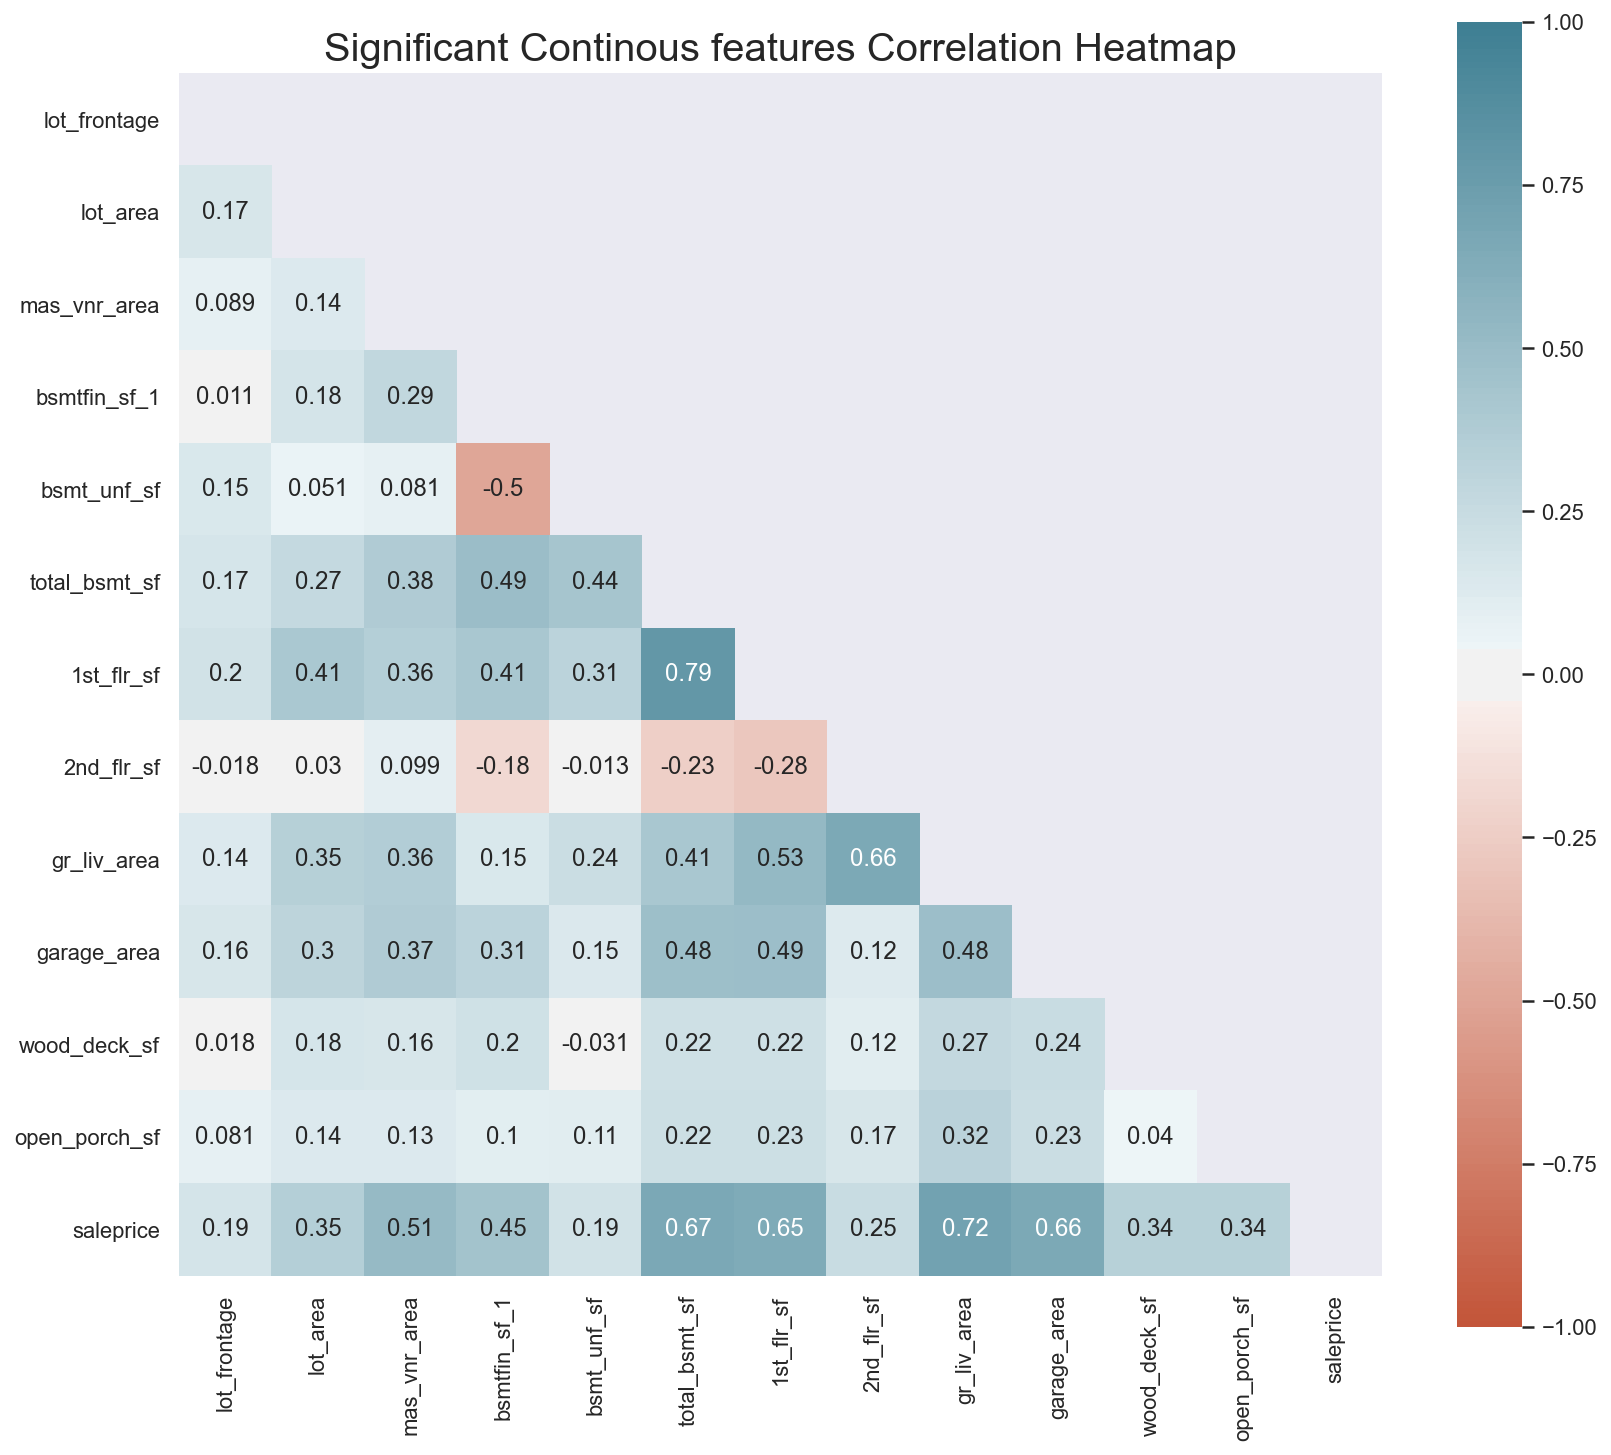

In [73]:
corr= train[cont_feat_sig].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(12,12))
ax=plt.axes()
ax.set_title("Significant Continous features Correlation Heatmap", fontdict={"fontsize":20})
sns.heatmap(corr,annot=True,vmax=1,vmin=-1
            ,mask= mask,ax=ax,square=True
            ,cmap=sns.diverging_palette(20, 220, n=200));

#### Comments
The majority of the continuous features have a positive correlation with each other, given the exception for a certurn few features. However there is only one with a relatively high correlation with another feature(total_bsmt _sf and 1st_flr_sf) of absolute correlation of almost 0.8.

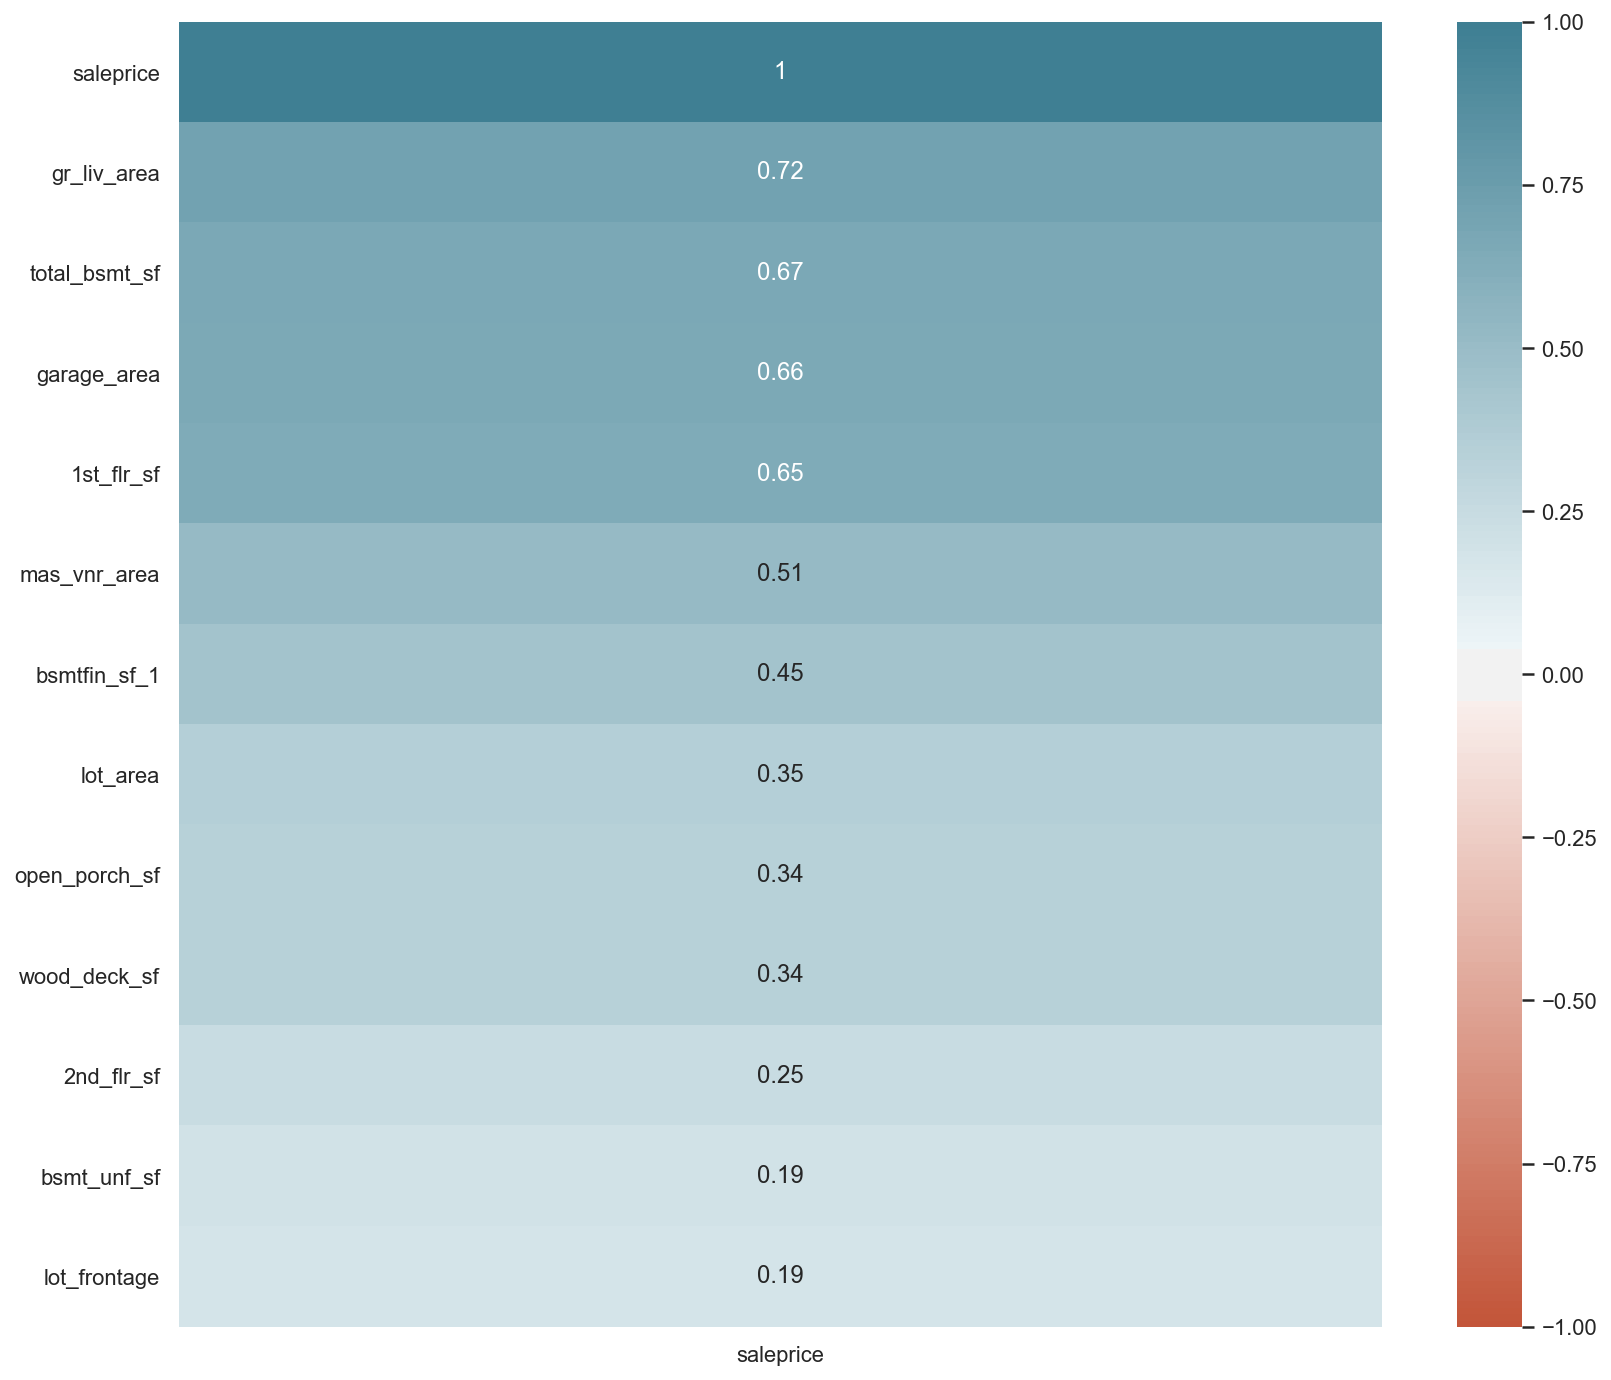

In [74]:
fig=plt.figure(figsize=(12,12))
sns.heatmap(train[cont_feat_sig].corr()[["saleprice"]].sort_values("saleprice",ascending=False)
            ,vmax=1, vmin=-1, annot=True,cmap=sns.diverging_palette(20, 220, n=200))

#### Comments
All features have a positive correlation with sales prices as seem in the scatter plots. 

## Discrete Features

In [75]:
disc_feat

['overall_qual',
 'overall_cond',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'totrms_abvgrd',
 'fireplaces',
 'garage_cars',
 'misc_val',
 'age',
 'garage_age',
 'remodel']

In [76]:
# adding in saleprice to be able to plot against it.
disc_feat.append("saleprice")

In [77]:
# splitting discrete features via freqency of variable within features at the threshold of 80%
disc_feat_lowsig=[i for i in disc_feat if train[i].value_counts(normalize=True).max()>0.80]
disc_feat_sig=[i for i in disc_feat if i not in disc_feat_lowsig]


/Users/waynechiang/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


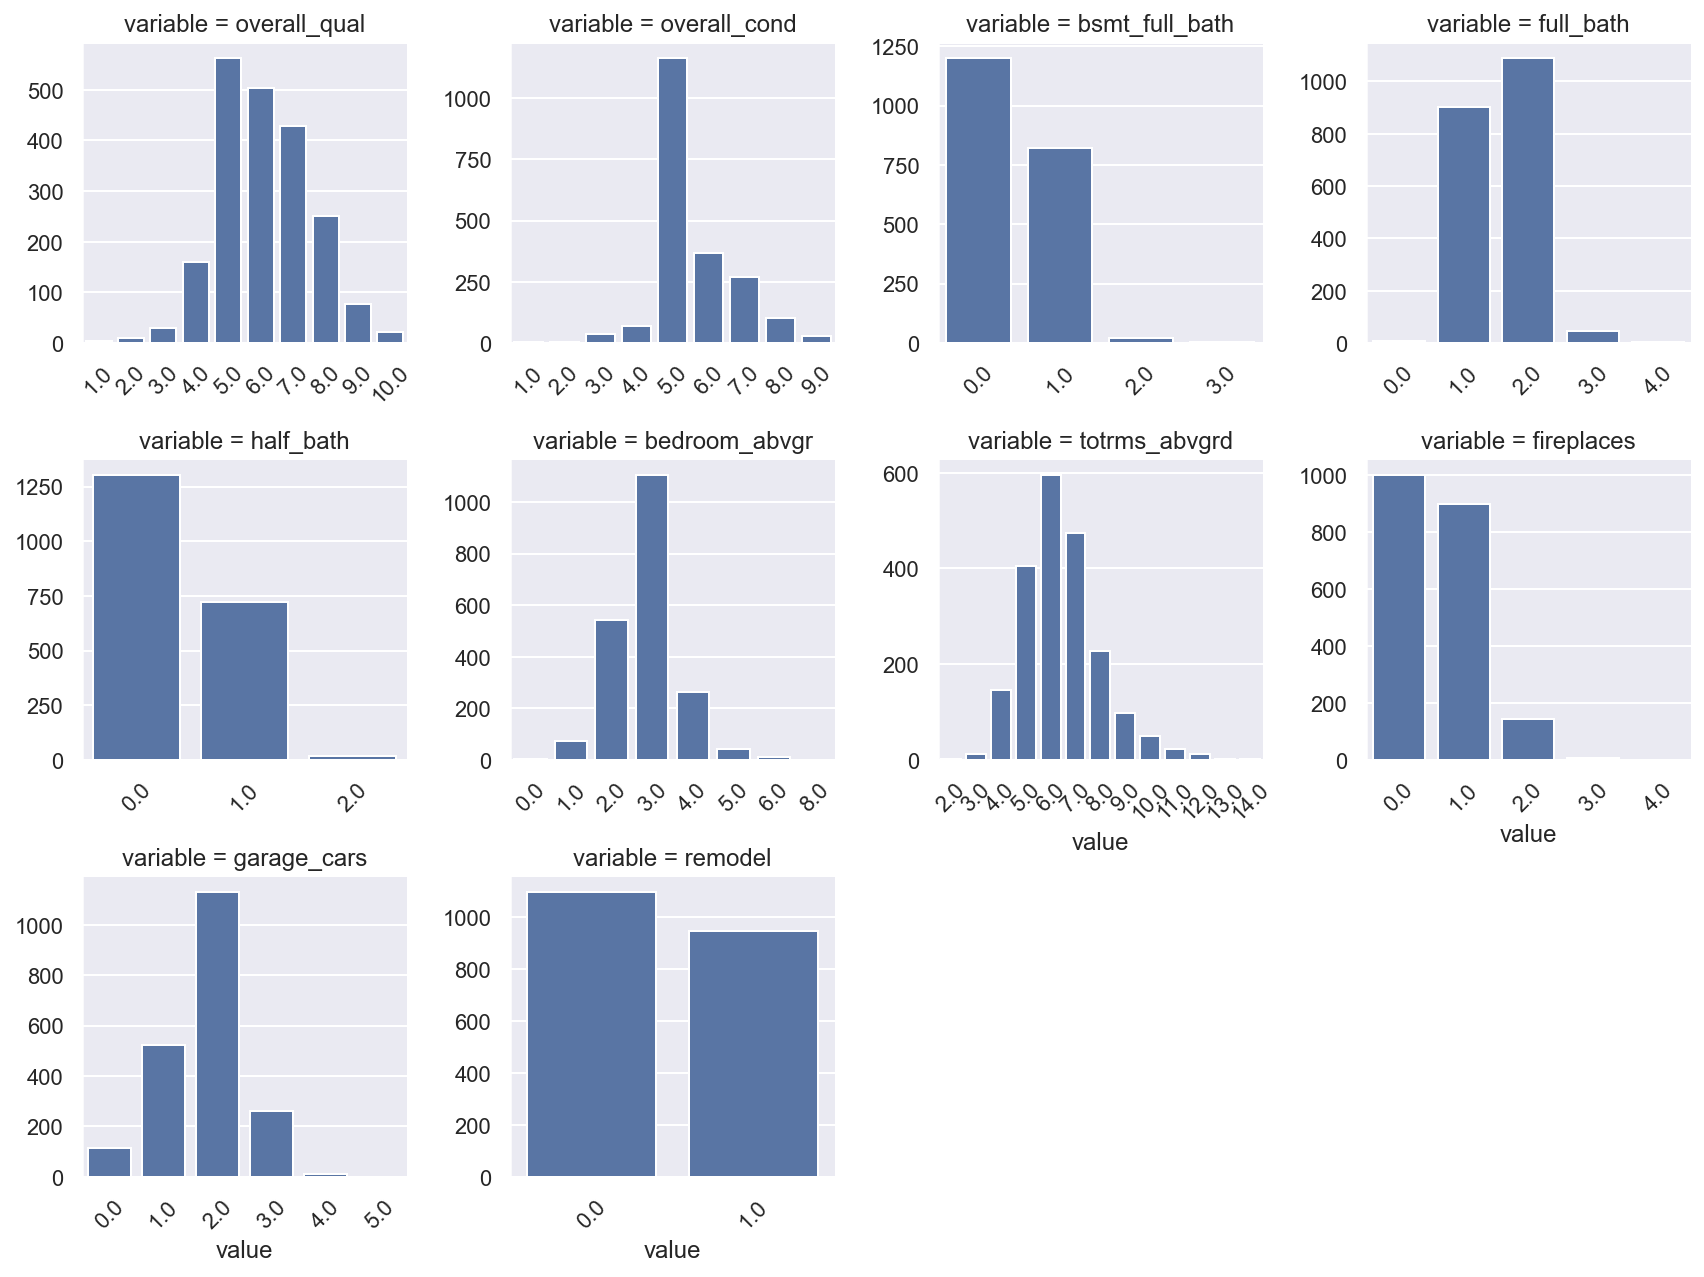

In [78]:
#ploting distplots for signicant discete features.
#removing because they are discrete features but look too messy on a countplot
temp=["saleprice","age","garage_age"]
disc_feat_sig=[i for i in disc_feat_sig if i not in temp]

sns_countplot(train,disc_feat_sig,1,45)

#### Comments
A majority of the count points do follow a right skewed distribution and share similarities with the distribution of saleprices. 

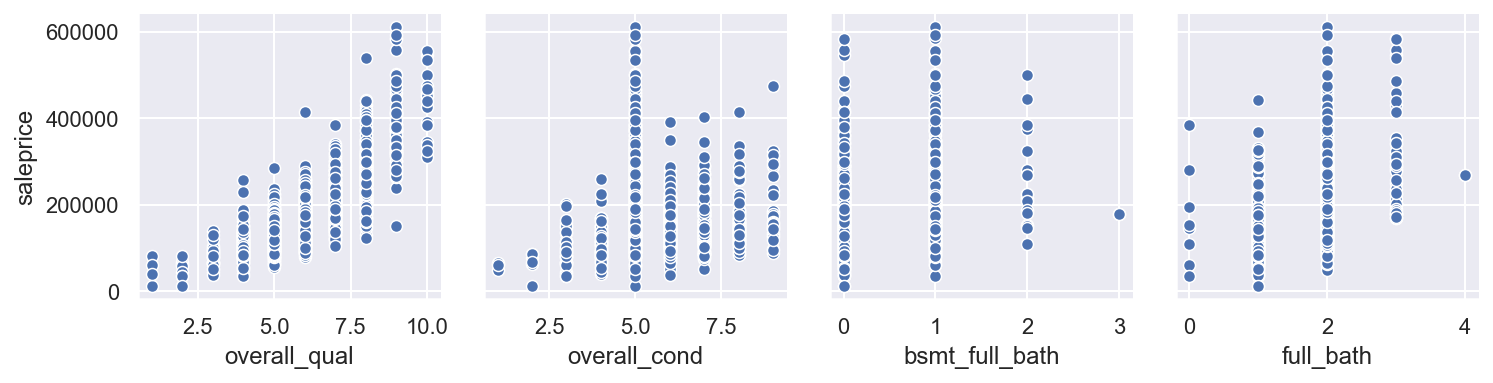

In [79]:
sns.pairplot(train,x_vars=disc_feat_sig[0:4],y_vars="saleprice");

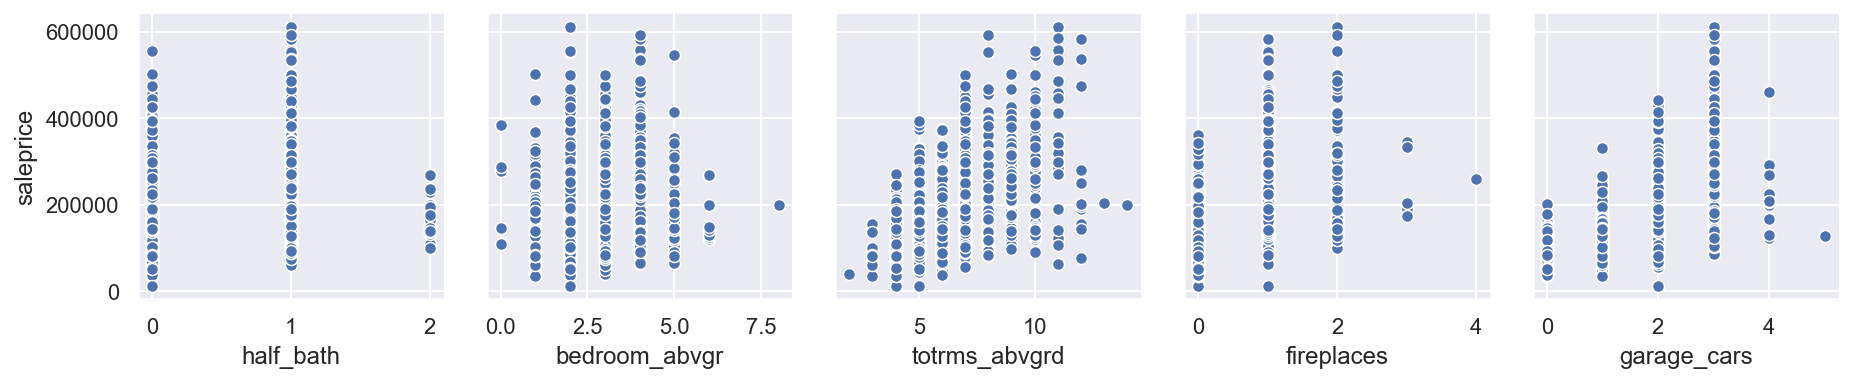

In [80]:
#the last plot is just remodel feature that looks exactly like countplot, hence its not included 
sns.pairplot(train,x_vars=disc_feat_sig[4:-1],y_vars="saleprice");

#### Comments
The scatter plots against saleprices, show that a majority of the significant discrete features have some form of positive correlation.


In [81]:
#adding the age, garage age and saleprice back
for i in temp:
    disc_feat_sig.append(i)

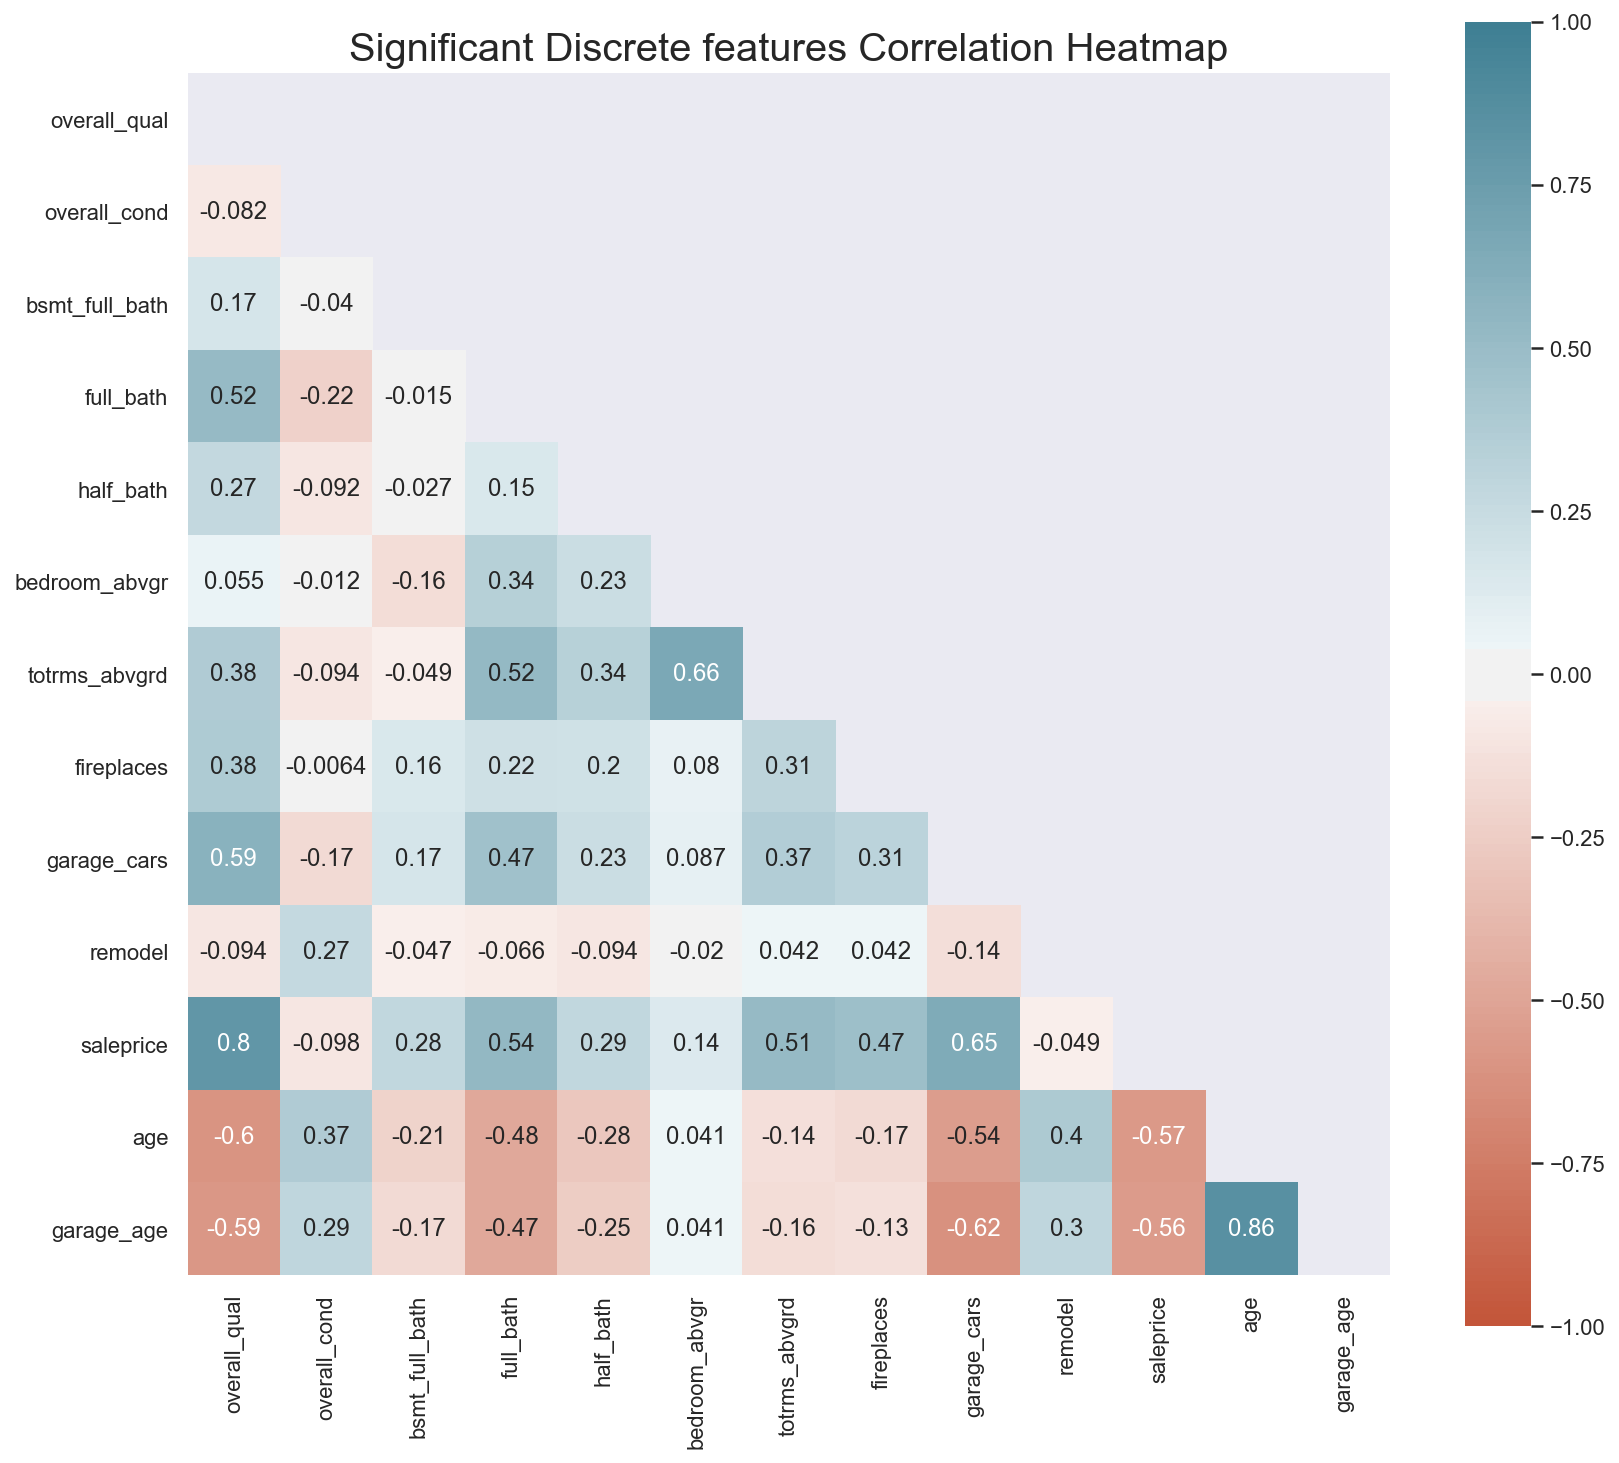

In [82]:
#creaint a heatamp of
corr= train[disc_feat_sig].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(12,12))
ax=plt.axes()
ax.set_title("Significant Discrete features Correlation Heatmap", fontdict={"fontsize":20})
sns.heatmap(corr,annot=True,vmax=1,vmin=-1
            ,mask= mask,ax=ax,square=True
            ,cmap=sns.diverging_palette(20, 220, n=200));

#### Comments

Most of the correlation in discrete features are either positive or do not a very correlations(0), with saleprice and overall_qual having the hightest correlation of 0.8. Except age and garage age, where most of the 0 to negative correlation occurs. 

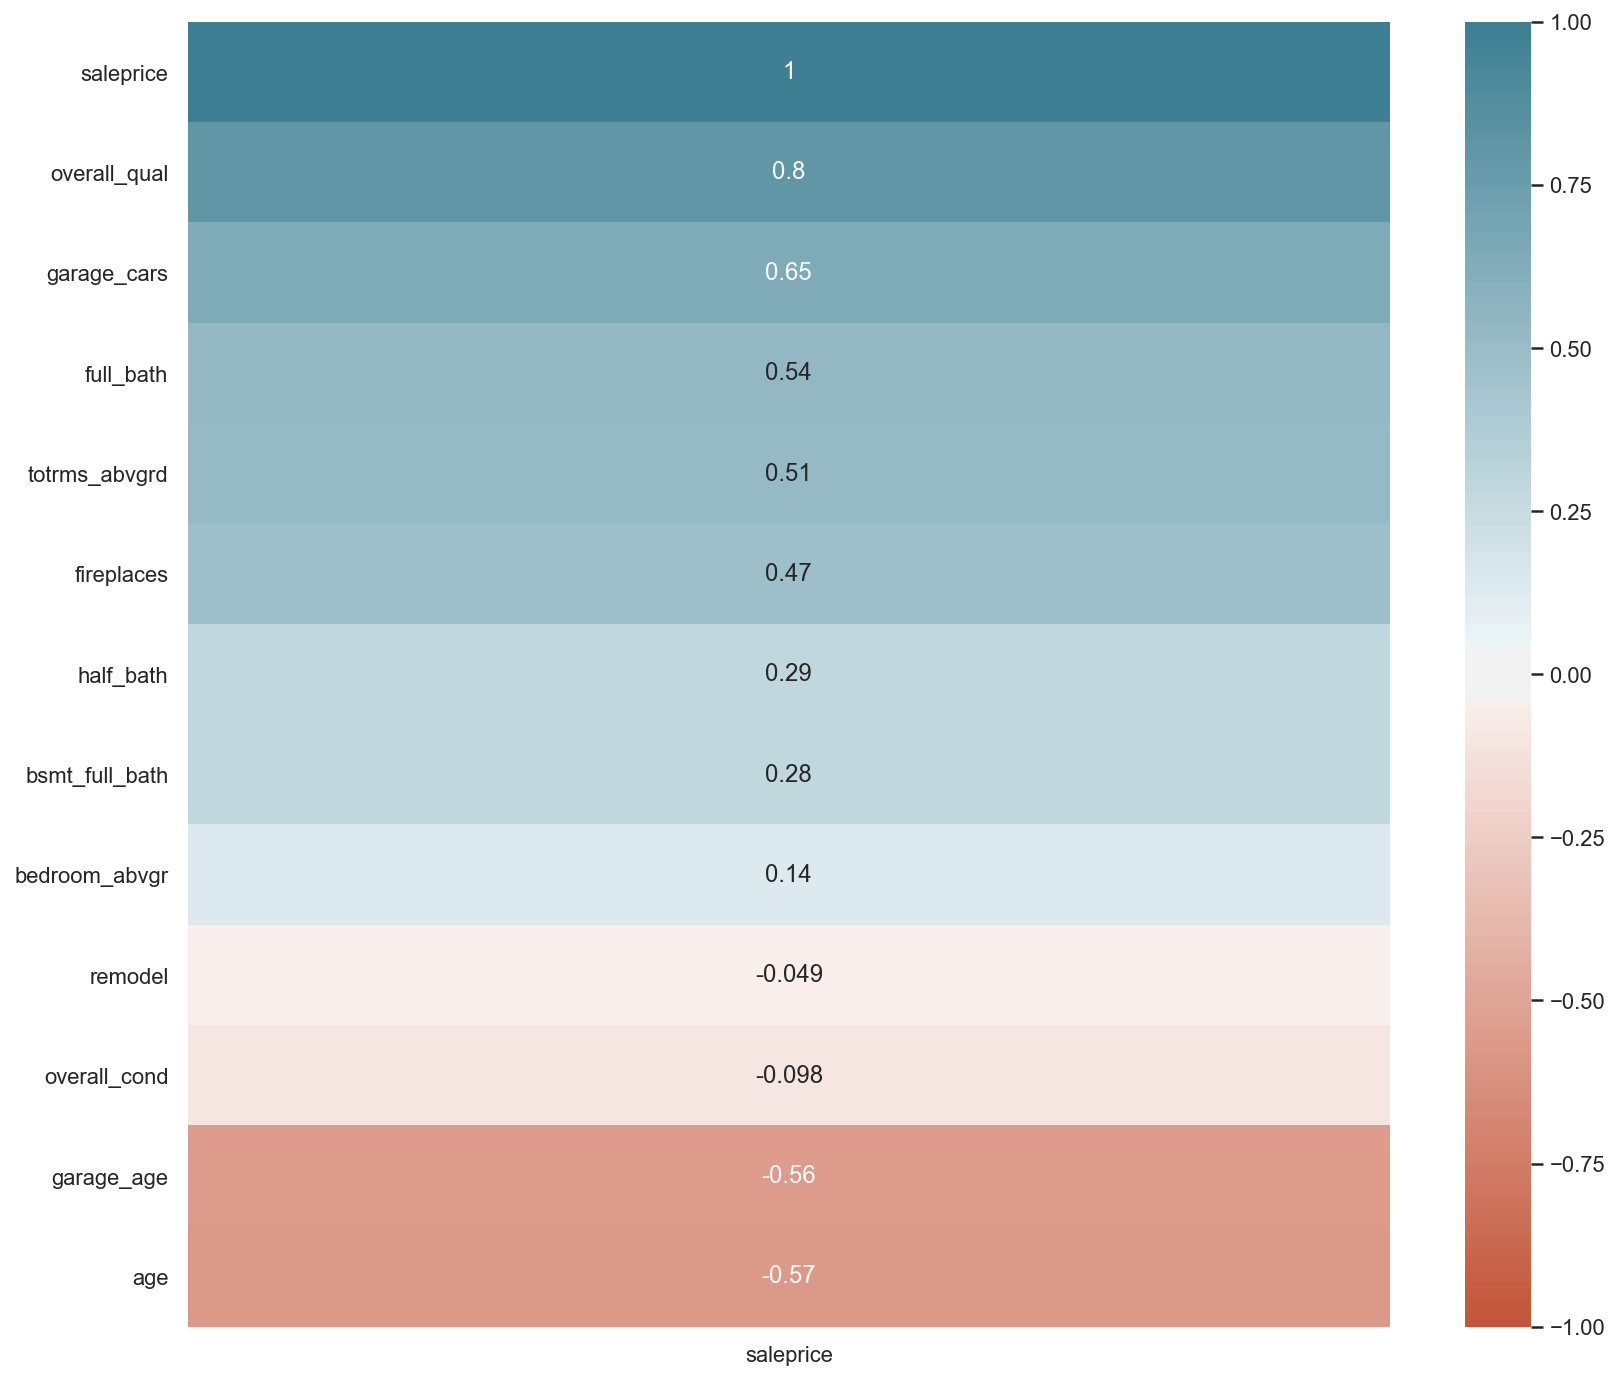

In [83]:
fig=plt.figure(figsize=(12,12))
sns.heatmap(train[disc_feat_sig].corr()[["saleprice"]].sort_values("saleprice",ascending=False)
            ,vmax=1, vmin=-1, annot=True,cmap=sns.diverging_palette(20, 220, n=200));

#### Comments
This would be clearer view of correlation of sales prices with the different significant discrete features. With remodel and overall_cond with no correlation which will be removed. 


In [84]:
#removing overall_cond and remodel. 
disc_feat_sig.remove("overall_cond")
disc_feat_sig.remove("remodel")
disc_feat_sig

['overall_qual',
 'bsmt_full_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'totrms_abvgrd',
 'fireplaces',
 'garage_cars',
 'saleprice',
 'age',
 'garage_age']

## Combining Features

In [85]:
combined_sig= ordi_feat_sig+nomi_feat_sig+disc_feat_sig+cont_feat_sig
# removing the multiple saleprices 
combined_sig=[i for i in combined_sig if i != "saleprice"] 
# appending just 1 saleprice
combined_sig.append("saleprice")

In [86]:
combined_sig

['lot_shape',
 'exter_qual',
 'bsmt_qual',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'heating_qc',
 'kitchen_qual',
 'fireplace_qu',
 'garage_finish',
 'ms_subclass',
 'neighborhood',
 'house_style',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'foundation',
 'garage_type',
 'mo_sold',
 'overall_qual',
 'bsmt_full_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'totrms_abvgrd',
 'fireplaces',
 'garage_cars',
 'age',
 'garage_age',
 'lot_frontage',
 'lot_area',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 '1st_flr_sf',
 '2nd_flr_sf',
 'gr_liv_area',
 'garage_area',
 'wood_deck_sf',
 'open_porch_sf',
 'saleprice']

In [87]:
len(combined_sig)

41

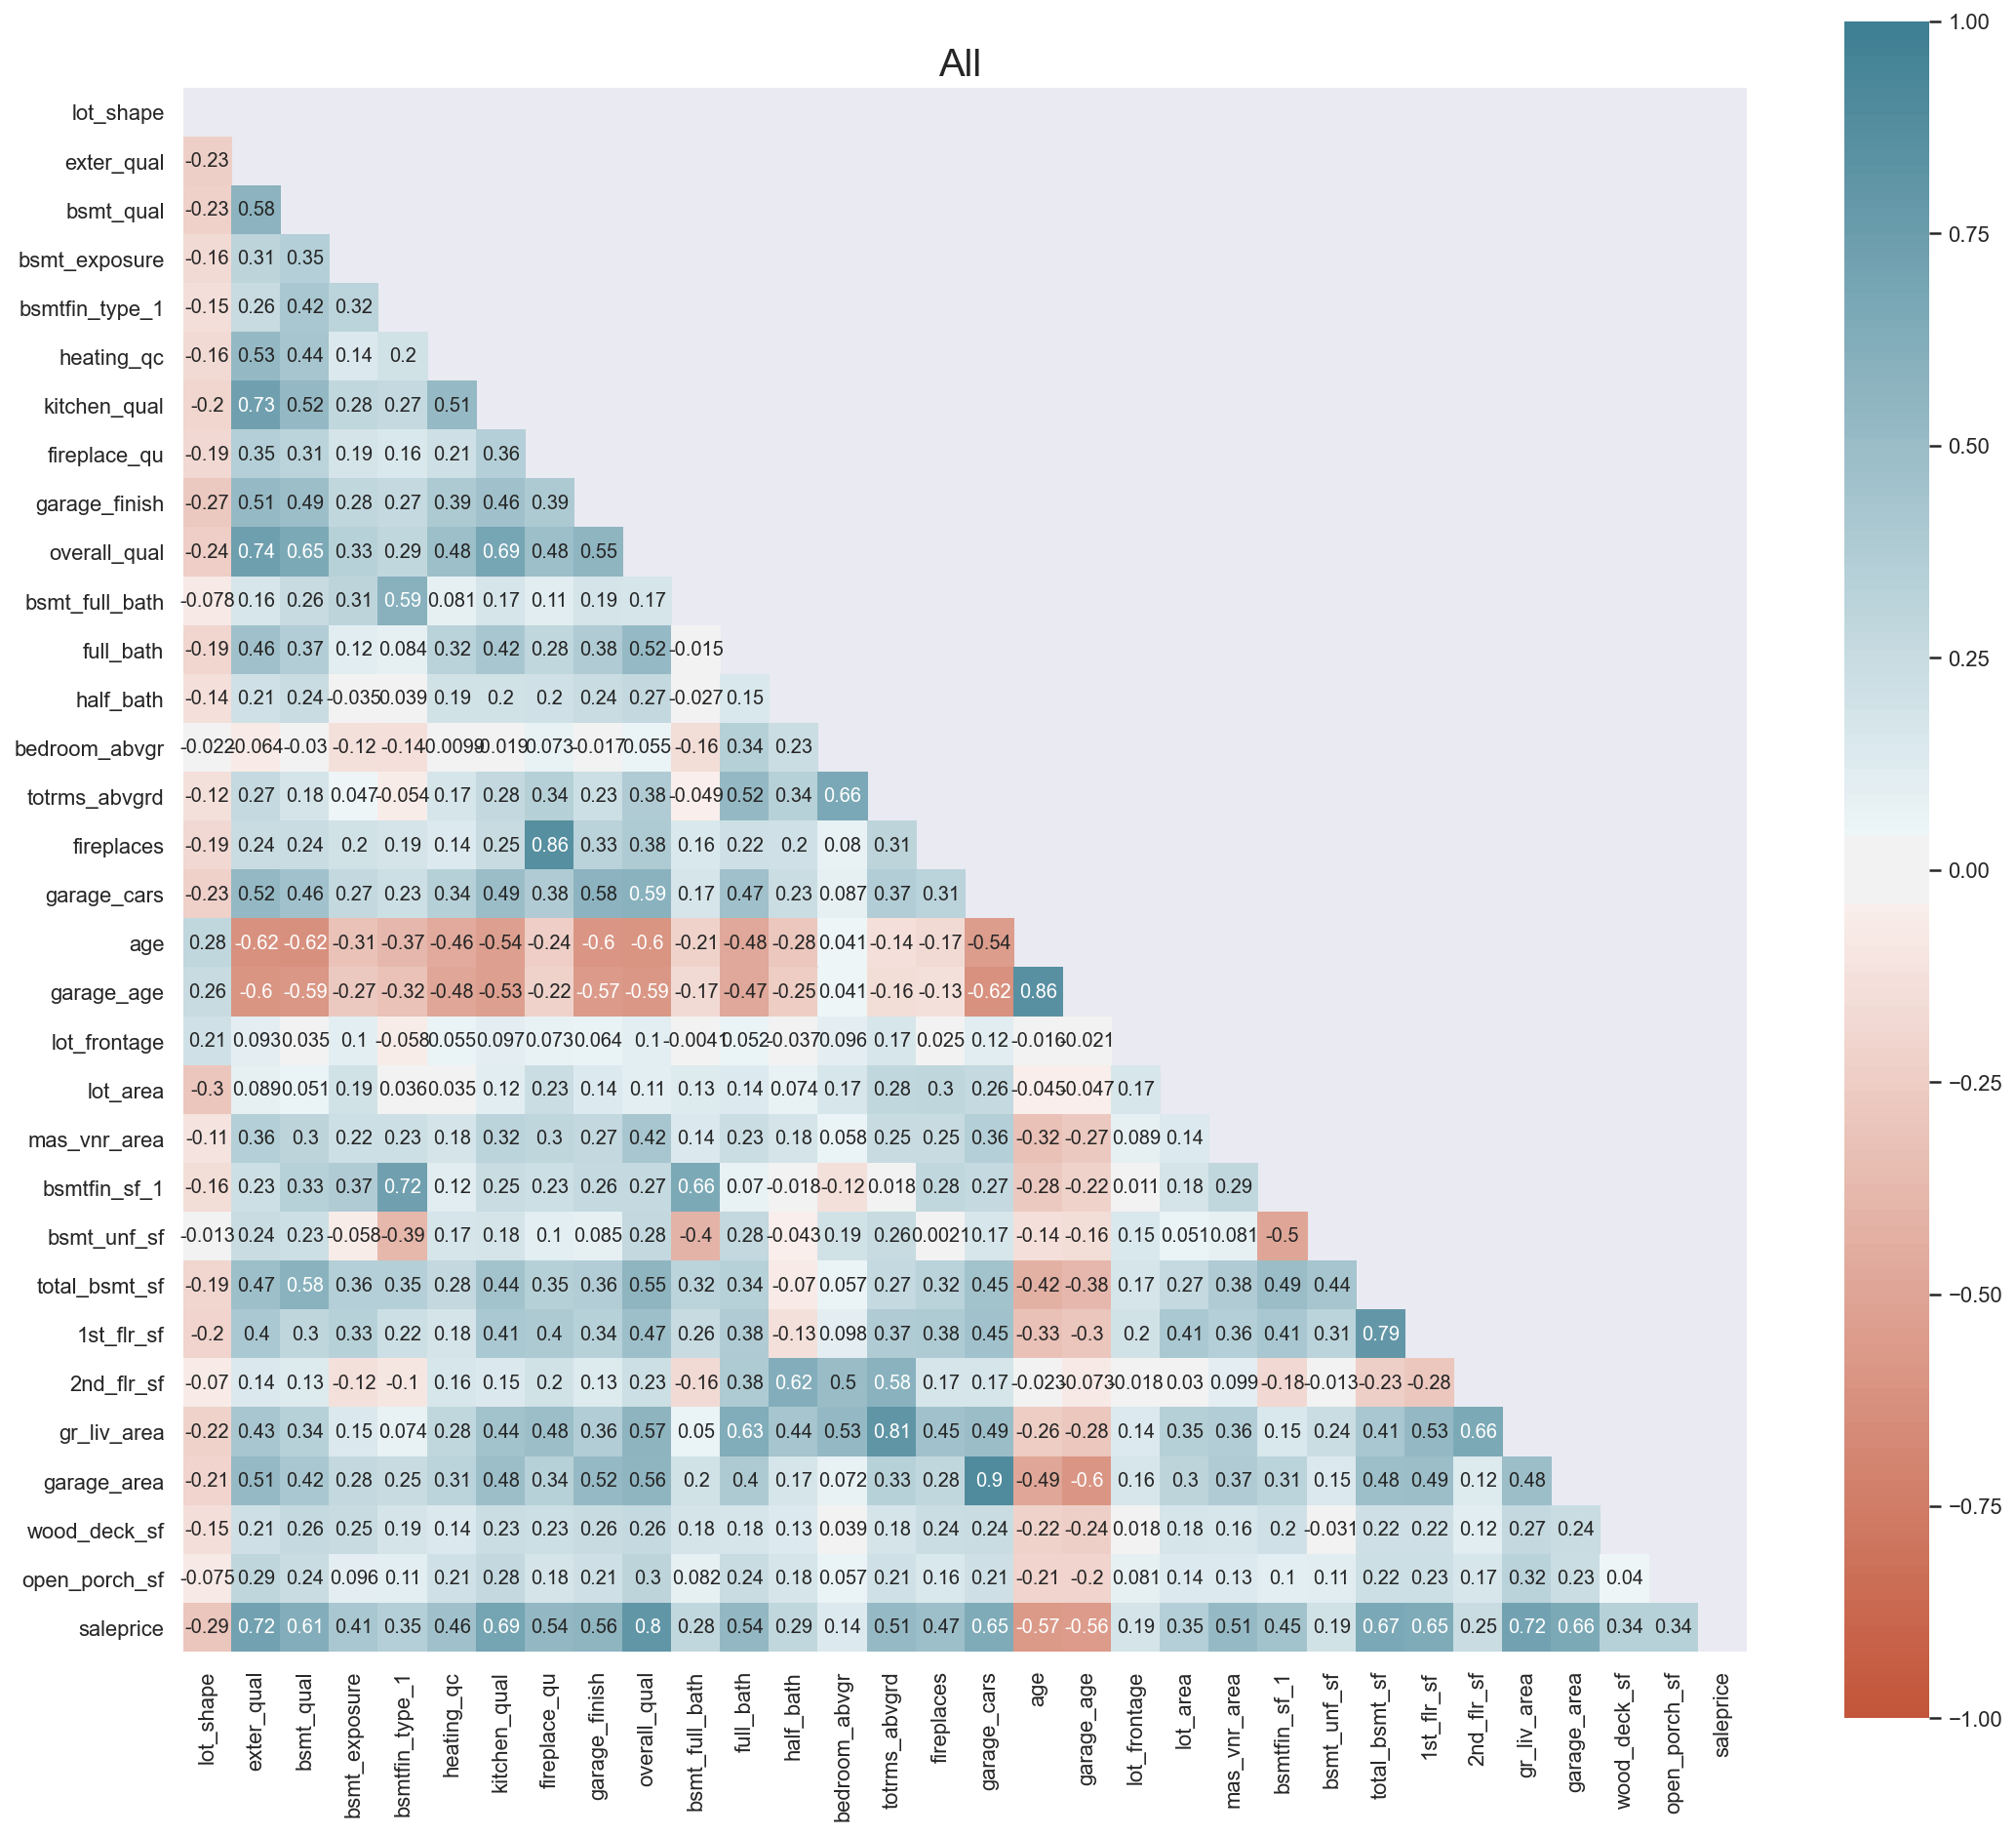

In [88]:
corr= train[combined_sig].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(16,16))
ax=plt.axes()
ax.set_title("All ", fontdict={"fontsize":20})
sns.heatmap(corr,annot=True,annot_kws={"size":10},vmax=1,vmin=-1
            ,mask= mask,ax=ax,square=True
            ,cmap=sns.diverging_palette(20, 220, n=200));

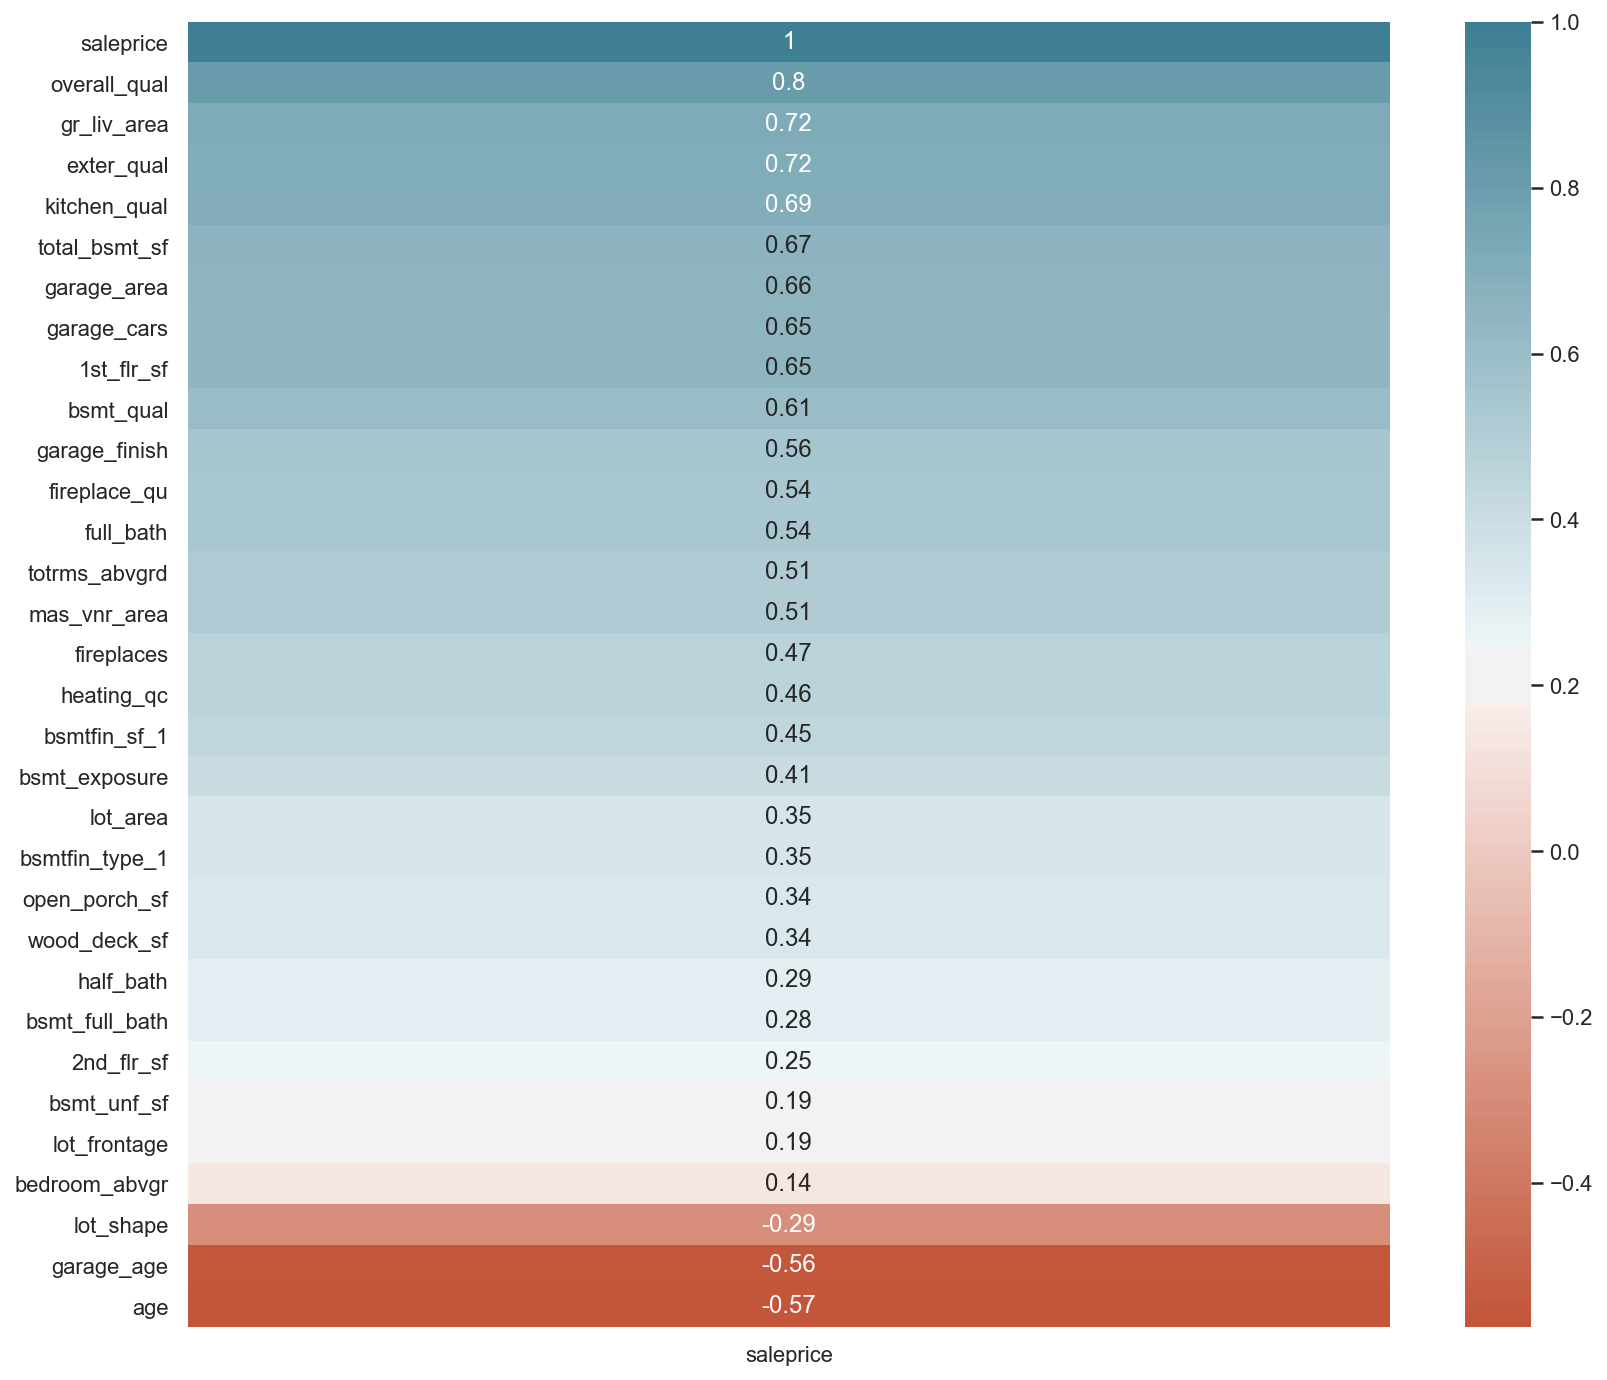

In [89]:
fig=plt.figure(figsize=(12,12))
sns.heatmap(train[combined_sig].corr()[["saleprice"]].sort_values("saleprice",ascending=False),
            vmax=1, annot=True,cmap=sns.diverging_palette(20, 220, n=200))

#### Comments

There are some mutlicoliner features that have to be dropped as multicollinearity makes it hard to interpret coefficents as models require varibles to be independent. The correlated features(threshold 0.8) will be dropped based on their correlation with saleprice(the higher of the two correlated features), or features will be engineered.

## Dealing with Multicollineration

In [90]:
# fireplace_qu and fireplace
train["fireplace_overall"]=train["fireplaces"]*train["fireplace_qu"]
test["fireplace_overall"]=test["fireplaces"]*test["fireplace_qu"]
combined_sig.remove("fireplaces")
combined_sig.remove("fireplace_qu")
combined_sig.append("fireplace_overall")

In [91]:
#gr_liv_area and totrms_abvgd
combined_sig.remove("totrms_abvgrd")

In [92]:
#garage area and garage cars
combined_sig.remove("garage_cars")
#Drop cars becasue count data with smaller means that 
#can skew the model while area is continous and displays a better distribution


In [93]:
# garage age and age 
combined_sig.remove("garage_age")

## One-Hot Encoding

In [94]:
train=train[combined_sig]

In [95]:
#getting dummies for only nominal features.
train=pd.get_dummies(data=train,columns=nomi_feat_sig,drop_first=True)

test=pd.get_dummies(data=test,columns=nomi_feat_sig,drop_first=True)


In [96]:
print(train.shape)
print(test.shape)

(2045, 130)
(879, 170)


In [97]:
#find out which are the missing features from get dummies
missing=[i for i in train.columns if i not in test.columns] # cols that are missing in test but present in train 
missing_2=[i for i in test.columns if i not in train.columns] # cols that are missing in train but present in test



In [98]:
#droping missing features from both train and test df. 
for i in missing:
    if i == "saleprice":
        pass
    else:
        train.drop(i,inplace=True,axis=1)
        
for i in missing_2:
    test.drop(i,inplace=True,axis=1)

In [99]:
print(train.shape)
print(test.shape)


(2045, 123)
(879, 122)


In [100]:
# sorting both in the same order
train=train[sorted(list(train.columns))]
test=test[sorted(list(test.columns))]

In [101]:
train.head()

1st_flr_sf  2nd_flr_sf  age  bedroom_abvgr  bsmt_exposure  bsmt_full_bath  \
0         725         754   34              3              1             0.0   
1         913        1209   13              4              1             1.0   
2        1057           0   57              3              1             1.0   
3         744         700    4              3              1             0.0   
4         831         614  110              3              1             0.0   

   bsmt_qual  bsmt_unf_sf  bsmtfin_sf_1  bsmtfin_type_1  exter_qual  \
0          3        192.0         533.0               6           4   
1          4        276.0         637.0               6           4   
2          3        326.0         731.0               6           3   
3          4        384.0           0.0               1           3   
4          2        676.0           0.0               1           3   

   exterior_1st_AsphShn  exterior_1st_BrkComm  exterior_1st_BrkFace  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   exterior_1st_CemntBd  exterior_1st_HdBoard  exterior_1st_MetalSd  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   exterior_1st_Plywood  exterior_1st_Stucco  exterior_1st_VinylSd  \
0                     0                    0                     0   
1                     0                    0                     1   
2                     0                    0                     1   
3                     0                    0                     1   
4                     0                    0                     0   

   exterior_1st_Wd Sdng  exterior_1st_WdShing  exterior_2nd_AsphShn  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     1                     0                     0   

   exterior_2nd_Brk Cmn  exterior_2nd_BrkFace  exterior_2nd_CBlock  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   exterior_2nd_CmentBd  exterior_2nd_HdBoard  exterior_2nd_ImStucc  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   exterior_2nd_MetalSd  exterior_2nd_Plywood  exterior_2nd_Stucco  \
0                     0                     1                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     1                    0   

   exterior_2nd_VinylSd  exterior_2nd_Wd Sdng  exterior_2nd_Wd Shng  \
0                     0                     0        

In [102]:
test.head()

1st_flr_sf  2nd_flr_sf  age  bedroom_abvgr  bsmt_exposure  bsmt_full_bath  \
0         908        1020   96              4              1             0.0   
1        1967           0   29              6              1             0.0   
2         664         832    0              3              3             1.0   
3         968           0   84              2              1             0.0   
4        1394           0   46              3              1             1.0   

   bsmt_qual  bsmt_unf_sf  bsmtfin_sf_1  bsmtfin_type_1  exter_qual  \
0          2         1020             0               1           3   
1          4         1967             0               1           3   
2          4          100           554               6           4   
3          3          968             0               1           4   
4          4          785           609               4           3   

   exterior_1st_AsphShn  exterior_1st_BrkComm  exterior_1st_BrkFace  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   exterior_1st_CemntBd  exterior_1st_HdBoard  exterior_1st_MetalSd  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   exterior_1st_Plywood  exterior_1st_Stucco  exterior_1st_VinylSd  \
0                     0                    0                     0   
1                     1                    0                     0   
2                     0                    0                     1   
3                     0                    0                     0   
4                     1                    0                     0   

   exterior_1st_Wd Sdng  exterior_1st_WdShing  exterior_2nd_AsphShn  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   exterior_2nd_Brk Cmn  exterior_2nd_BrkFace  exterior_2nd_CBlock  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   exterior_2nd_CmentBd  exterior_2nd_HdBoard  exterior_2nd_ImStucc  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   exterior_2nd_MetalSd  exterior_2nd_Plywood  exterior_2nd_Stucco  \
0                     0                     0                    0   
1                     0                     1                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     1                    0   

   exterior_2nd_VinylSd  exterior_2nd_Wd Sdng  exterior_2nd_Wd Shng  \
0                     0                     0        

# MODELING
The main goal of this section is to try different type linear regression techniques (Lasso, Ridge, ElasticNet and Linear Regression) to find out the best performer based on their R2 and RSME scores. Recursive Feature elimination will also be used to reduce the total amount of features down to the top 30. Lastly a prediction would be done on the test dataset and submitted to Kaggle to get a final score. 

The main workflow would be:
    
    1.Base Model
    2.Linear Regression [All Features]
    3.Linear Regression with Standard Scaler [All Features]
    4.Lasso with Standard Scaler [All Features]
    5.Ridge with Standard Scaler [All Features]
    6.ElasticNet with Standard Scaler [All Features]
    7.Recursive Feature Elimination
    8.Ridge with Standard Scaler [Top 30 Features]
    9.Prediction on test dataset



## BASEMODEL

In [103]:
mean_price= train["saleprice"].mean()


## Linear Regression [All Features]

In [104]:
def plot_pred(prediction, model_name):
    """funciton that plots y hat and y"""
    plt.figure(figsize=(12,9))
    plt.scatter(prediction, y_test, s=30, color='blue',alpha=0.5)
    plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
    plt.ylabel("Actual Values: $y$", fontsize = 20)
    plt.title("Predicting Housing Prices using "+model_name , fontsize = 24)
    plt.plot(y_test,y_test,color="r",alpha=0.5);
    
    
def get_comments(model_name,model,X_train,X_test,yhat_train,yhat_test):
    """function that returns train and test scores and MSE from both"""
    print("|------------|"*5)
    print("   ",model_name,"train score:",model.score(X_train,y_train))
    print("   ",model_name,"test score:",model.score(X_test,y_test))
    print("|------------|"*5)
    print("   ",model_name, "train Sqrt MSE:", round(np.sqrt(mean_squared_error(y_train,yhat_train)),2))
    print("   ",model_name, "test Sqrt MSE:", round(np.sqrt(mean_squared_error(y_test,yhat_test)),2))
    print("|------------|"*5)

In [105]:
X = train.drop(columns = 'saleprice')
y = train['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X.shape

(2045, 122)

In [106]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [107]:
cross_val_score(lr,X_train,y_train,cv=6).mean()

0.8871499928721497

In [108]:
y_hat_lr_train=lr.predict(X_train)
y_hat_lr_test = lr.predict(X_test)

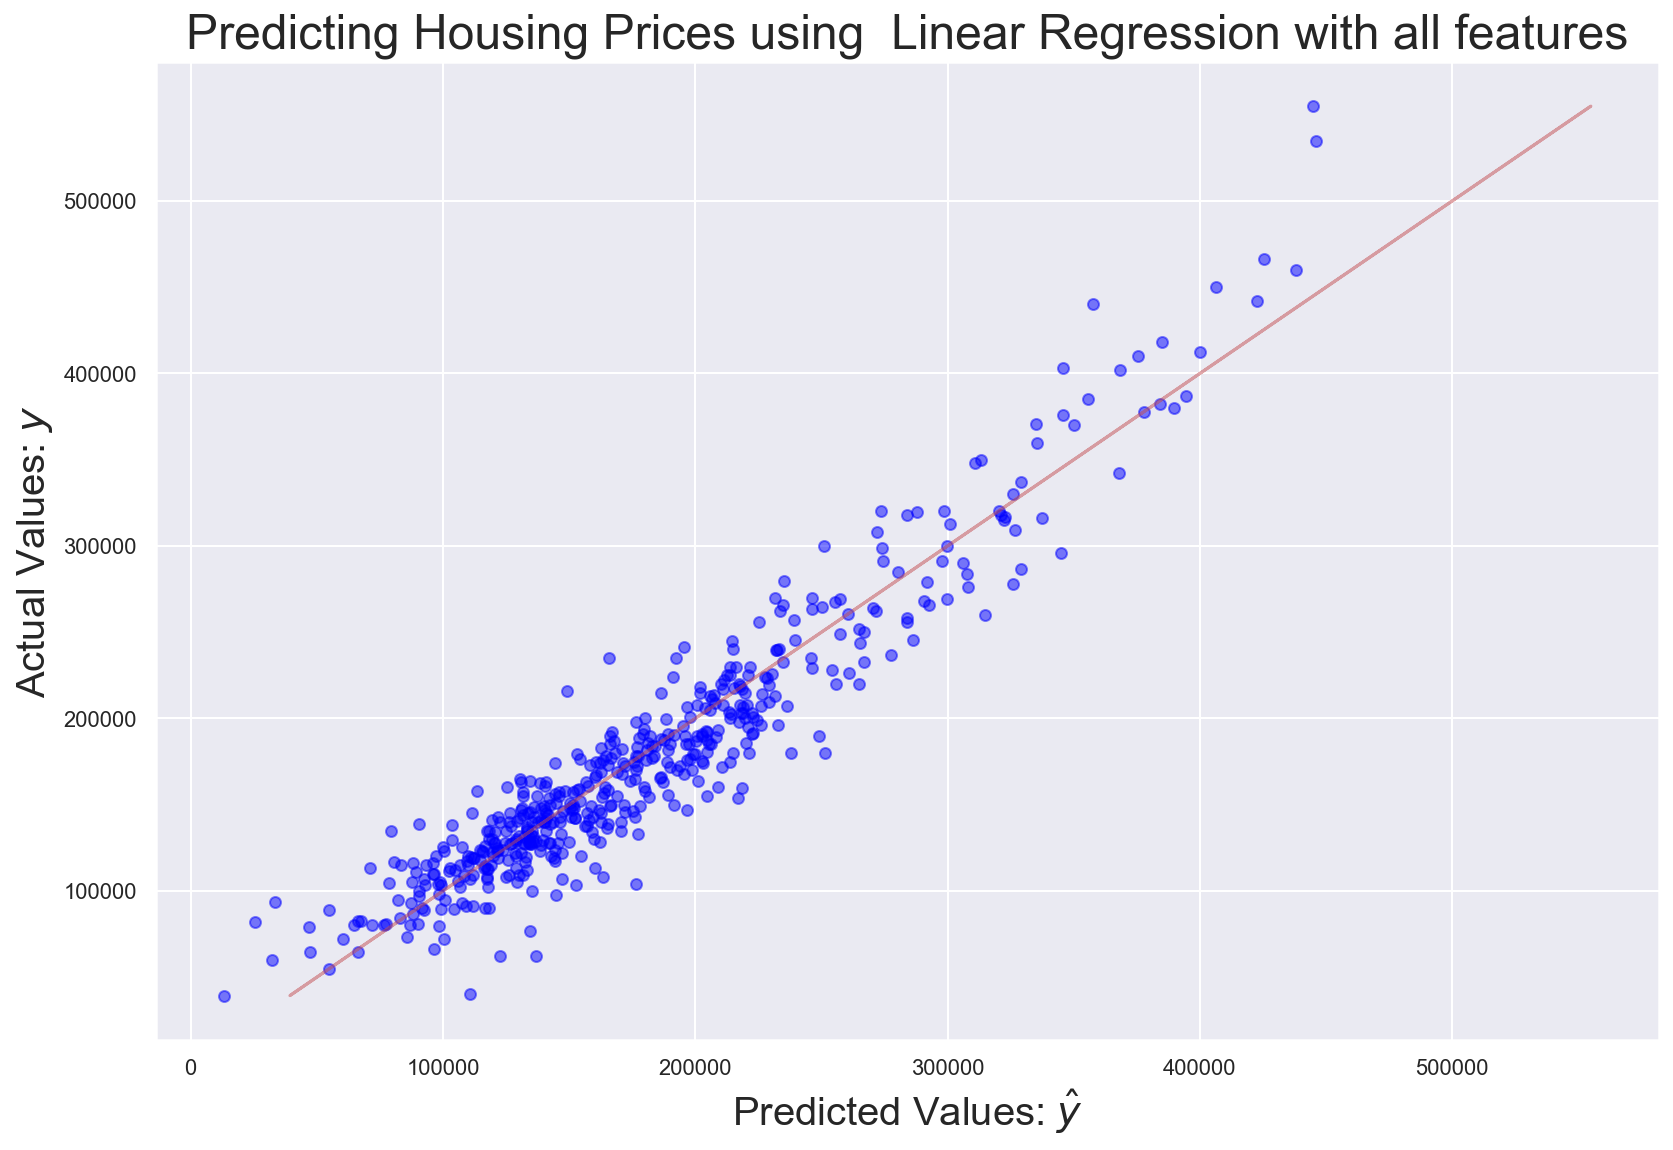

In [109]:
plot_pred(y_hat_lr_test," Linear Regression with all features")

In [110]:
get_comments("LR",lr,X_train,X_test,y_hat_lr_train,y_hat_lr_test)


|------------||------------||------------||------------||------------|
    LR train score: 0.913423517008688
    LR test score: 0.9041120519467506
|------------||------------||------------||------------||------------|
    LR train Sqrt MSE: 23511.84
    LR test Sqrt MSE: 23902.29
|------------||------------||------------||------------||------------|


## Linear Regression with Standard Scaller [All Features]

In [111]:
X = train.drop(columns = 'saleprice')
y = train['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [112]:
ss=StandardScaler()

X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [113]:
lr=LinearRegression()
lr.fit(X_train_ss,y_train)

LinearRegression()

In [114]:
cross_val_score(lr,X_train_ss,y_train,cv=6).mean()


-2.0117097370499715e+19

In [115]:
y_hat_lr_train_ss= lr.predict(X_train_ss)
y_hat_lr_test_ss = lr.predict(X_test_ss)

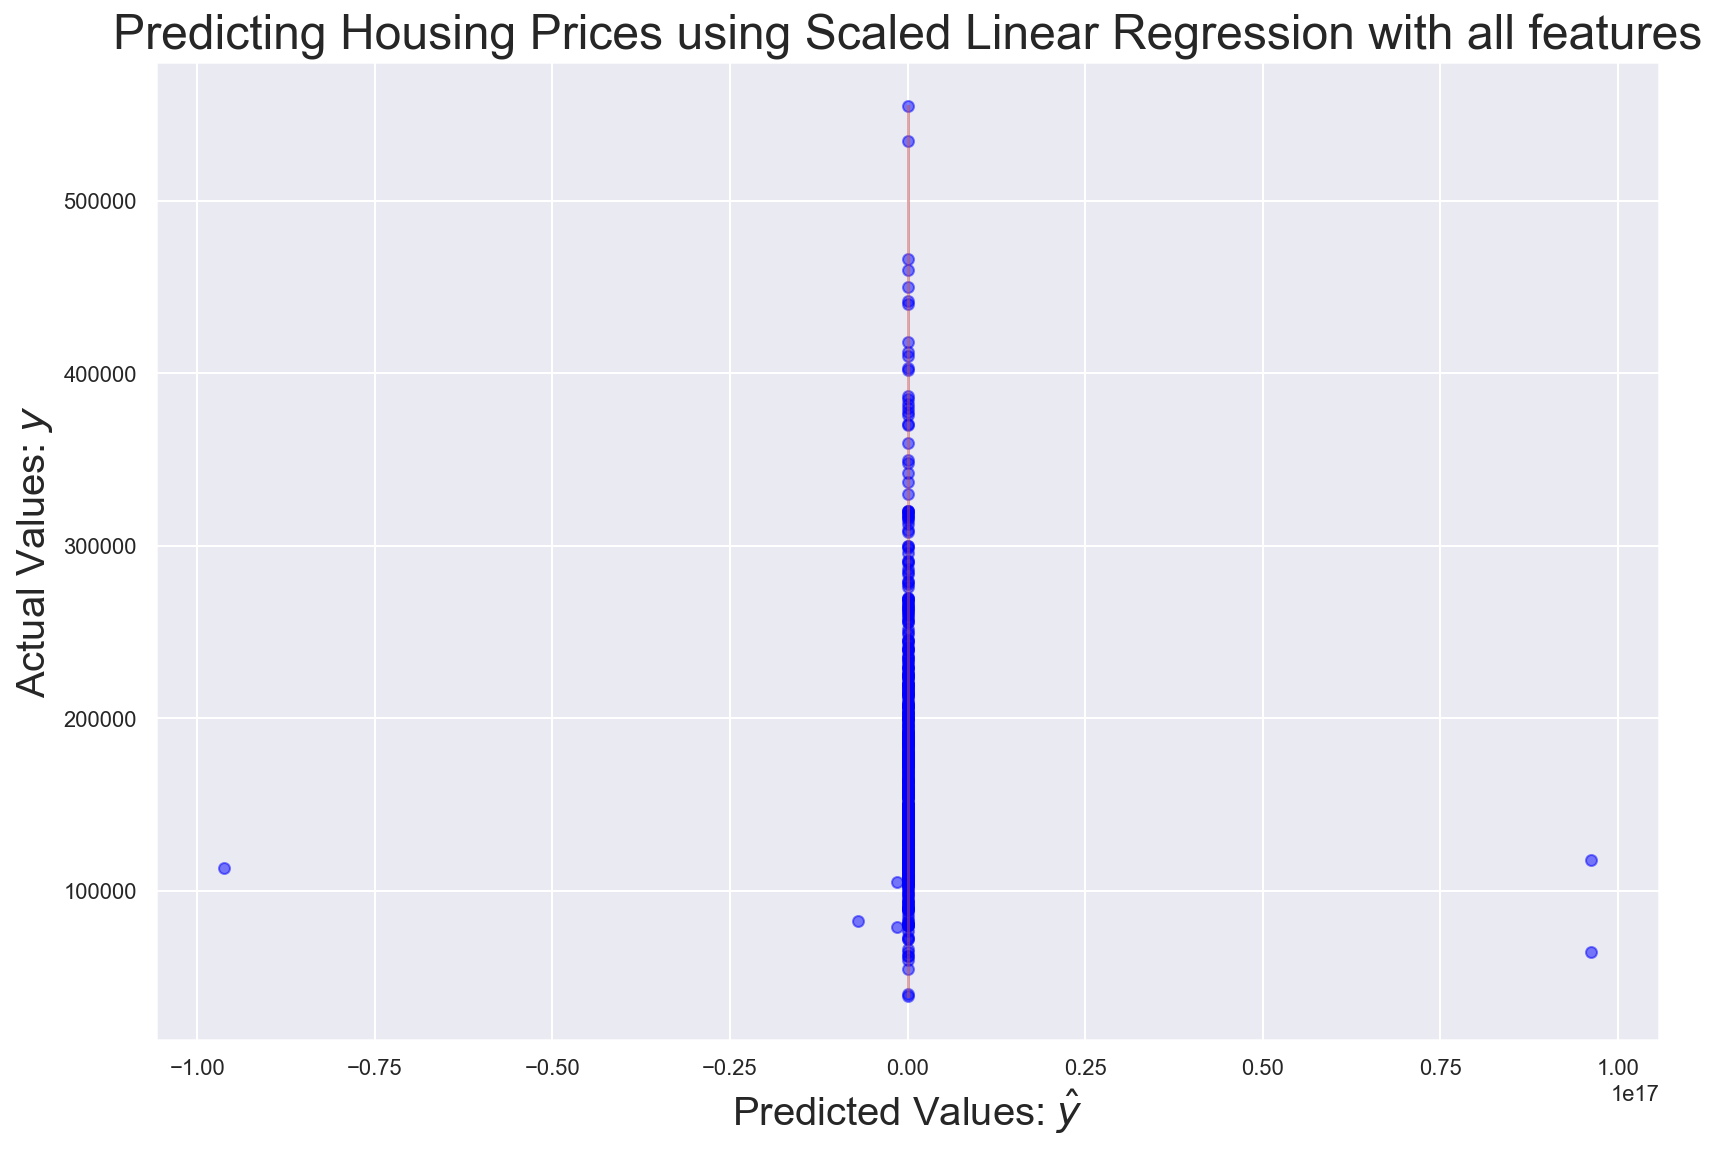

In [116]:
plot_pred(y_hat_lr_test_ss,"Scaled Linear Regression with all features")

In [117]:
get_comments("Scaled Linear Regression",lr,X_train_ss,X_test_ss,y_hat_lr_train_ss,y_hat_lr_test_ss)

|------------||------------||------------||------------||------------|
    Scaled Linear Regression train score: 0.9134234948228495
    Scaled Linear Regression test score: -9.118284932089507e+21
|------------||------------||------------||------------||------------|
    Scaled Linear Regression train Sqrt MSE: 23511.85
    Scaled Linear Regression test Sqrt MSE: 7370790497632237.0
|------------||------------||------------||------------||------------|


## Lasso with Standard Scaler [All Features]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
ss=StandardScaler()

X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [119]:
lasso_alphas=np.logspace(0, 10, 2000)
lasso=LassoCV(alphas=lasso_alphas,cv=6)
lasso.fit(X_train_ss,y_train)

LassoCV(alphas=array([1.00000000e+00, 1.01158528e+00, 1.02330478e+00, ...,
       9.77225965e+09, 9.88547401e+09, 1.00000000e+10]),
        cv=6)

In [120]:
lasso.alpha_


474.6114037989332

In [121]:
lasso_coef_df = pd.DataFrame({'Features':X.columns,'coef': lasso.coef_,'abs_coef': np.abs(lasso.coef_)})
lasso_coef_df.sort_values("abs_coef",ascending=False)

Features          coef      abs_coef
50            gr_liv_area  24118.785184  24118.785184
119          overall_qual  16568.381261  16568.381261
8            bsmtfin_sf_1   8543.634823   8543.634823
10             exter_qual   7090.879454   7090.879454
109  neighborhood_NridgHt   6704.605285   6704.605285
120         total_bsmt_sf   6376.946185   6376.946185
115  neighborhood_StoneBr   6356.615378   6356.615378
60           kitchen_qual   6342.230648   6342.230648
4           bsmt_exposure   5540.565919   5540.565919
2                     age  -5374.230738   5374.230738
64           mas_vnr_area   5188.138680   5188.138680
79        ms_subclass_120  -5179.373104   5179.373104
61               lot_area   4966.360064   4966.360064
42            garage_area   4529.280573   4529.280573
80        ms_subclass_160  -3351.607672   3351.607672
13   exterior_1st_BrkFace   3094.839380   3094.839380
98   neighborhood_Crawfor   3053.107444   3053.107444
35      fireplace_overall   2554.609886   2554.609886
52             heating_qc   2402.457475   2402.457475
65   mas_vnr_type_BrkFace  -2253.696232   2253.696232
108  neighborhood_NoRidge   2032.677741   2032.677741
14   exterior_1st_CemntBd   1899.779567   1899.779567
54     house_style_1Story   1862.753752   1862.753752
92         ms_subclass_90  -1762.296501   1762.296501
121          wood_deck_sf   1687.044596   1687.044596
3           bedroom_abvgr  -1640.634427   1640.634427
37       foundation_PConc   1408.047941   1408.047941
95   neighborhood_BrkSide   1297.272456   1297.272456
38        foundation_Slab   1274.365512   1274.365512
106  neighborhood_NPkVill   1235.980726   1235.980726
6               bsmt_qual   1227.821980   1227.821980
97   neighborhood_CollgCr  -1191.980320   1191.980320
12   exterior_1st_BrkComm  -1172.399956   1172.399956
113  neighborhood_SawyerW  -1146.142811   1146.142811
82        ms_subclass_190  -1118.051606   1118.051606
114  neighborhood_Somerst   1111.083442   1111.083442
5          bsmt_full_bath   1098.222819   1098.222819
62           lot_frontage   1064.107752   1064.107752
29   exterior_2nd_MetalSd    961.044023    961.044023
72            mo_sold_jul    874.120951    874.120951
46    garage_type_BuiltIn    818.126193    818.126193
45    garage_type_Basment   -801.908495    801.908495
51              half_bath    782.807489    782.807489
47    garage_type_CarPort   -670.616313    670.616313
117  neighborhood_Veenker   -656.579365    656.579365
75            mo_sold_may    624.616992    624.616992
67     mas_vnr_type_Stone    584.655439    584.655439
30   exterior_2nd_Plywood   -536.327441    536.327441
89         ms_subclass_75    455.453084    455.453084
49       garage_type_None    440.000577    440.000577
118         open_porch_sf    436.119005    436.119005
78            mo_sold_sep    401.399002    401.399002
100  neighborhood_Gilbert   -374.966961    374.966961
18    exterior_1st_Stucco   -316.056616    316.056616
112   neighborhood_Sawyer    297.286582    297.286582
71            mo_sold_jan    290.952067    290.952067
70            mo_sold_feb   -269.916472    269.916472
99   neighborhood_Edwards   -252.475878    252.475878
110  neighborhood_OldTown   -188.360889    188.360889
74            mo_sold_mar   -176.056962    176.056962
31    exterior_2nd_Stucco   -167.365477    167.365477
28   exterior_2nd_ImStucc   -161.334416    161.334416
105    neighborhood_NAmes   -125.897602    125.897602
83         ms_subclass_30     95.406557     95.406557
76            mo_sold_nov    -80.330139     80.330139
81        ms_subclass_180    -74.977401     74.977401
69            mo_sold_dec    -52.904976     52.904976
77            mo_sold_oct     42.744390     42.744390
55     house_style_2.5Fin     16.428573     16.428573
43          garage_finish     12.220105     12.220105
33   exterior_2nd_Wd Sdng      3.602178      3.602178
101   neighborhood_Greens     -0.000000      0.000000
90         ms_subclass_80     -0.000000      0.000000
91         ms_subclas

In [122]:
y_hat_lasso_train = lasso.predict(X_train_ss)
y_hat_lasso_test = lasso.predict(X_test_ss)

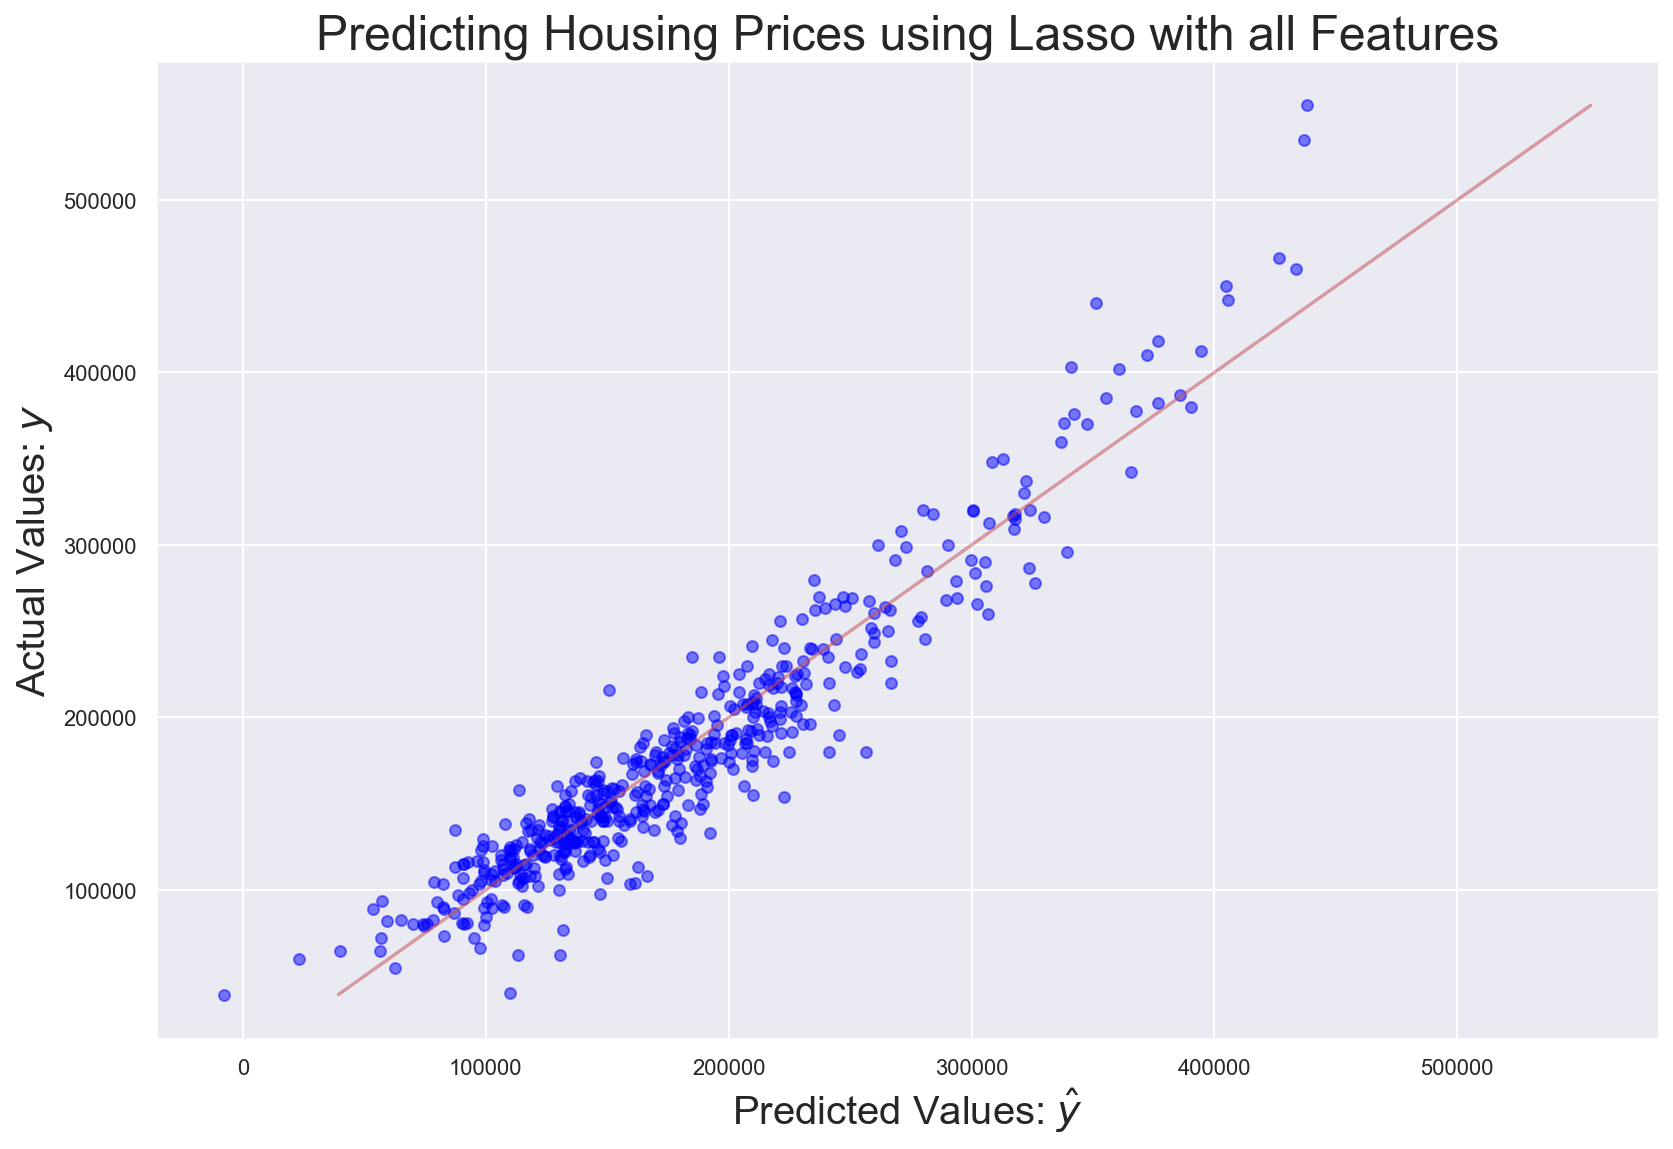

In [123]:
plot_pred(y_hat_lasso_test,"Lasso with all Features")

In [124]:
get_comments("Lasso",lasso,X_train_ss,X_test_ss,y_hat_lasso_train,y_hat_lasso_test)

|------------||------------||------------||------------||------------|
    Lasso train score: 0.9067011934027313
    Lasso test score: 0.9090180778159976
|------------||------------||------------||------------||------------|
    Lasso train Sqrt MSE: 24407.58
    Lasso test Sqrt MSE: 23282.79
|------------||------------||------------||------------||------------|


## Ridge with Standard Scaler [All Features]

In [125]:
ridge_alphas = np.logspace(0.1, 10, 1000)
ridge_cv= RidgeCV(alphas=ridge_alphas,cv=6,scoring="r2")
ridge_cv.fit(X_train_ss,y_train)

RidgeCV(alphas=array([1.25892541e+00, 1.28798234e+00, 1.31770993e+00, 1.34812366e+00,
       1.37923935e+00, 1.41107322e+00, 1.44364184e+00, 1.47696216e+00,
       1.51105155e+00, 1.54592774e+00, 1.58160890e+00, 1.61811360e+00,
       1.65546087e+00, 1.69367013e+00, 1.73276130e+00, 1.77275471e+00,
       1.81367121e+00, 1.85553209e+00, 1.89835914e+00, 1.94217468e+00,
       1.98700151e+00, 2.03286298e+0...
       5.91659813e+09, 6.05315761e+09, 6.19286898e+09, 6.33580499e+09,
       6.48204007e+09, 6.63165037e+09, 6.78471378e+09, 6.94131002e+09,
       7.10152060e+09, 7.26542897e+09, 7.43312046e+09, 7.60468240e+09,
       7.78020412e+09, 7.95977700e+09, 8.14349456e+09, 8.33145246e+09,
       8.52374857e+09, 8.72048301e+09, 8.92175824e+09, 9.12767904e+09,
       9.33835265e+09, 9.55388876e+09, 9.77439960e+09, 1.00000000e+10]),
        cv=6, scoring='r2')

In [126]:
ridge_cv.alpha_

87.74921565954769

In [127]:
y_hat_ridge_train = ridge_cv.predict(X_train_ss)
y_hat_ridge_test = ridge_cv.predict(X_test_ss)

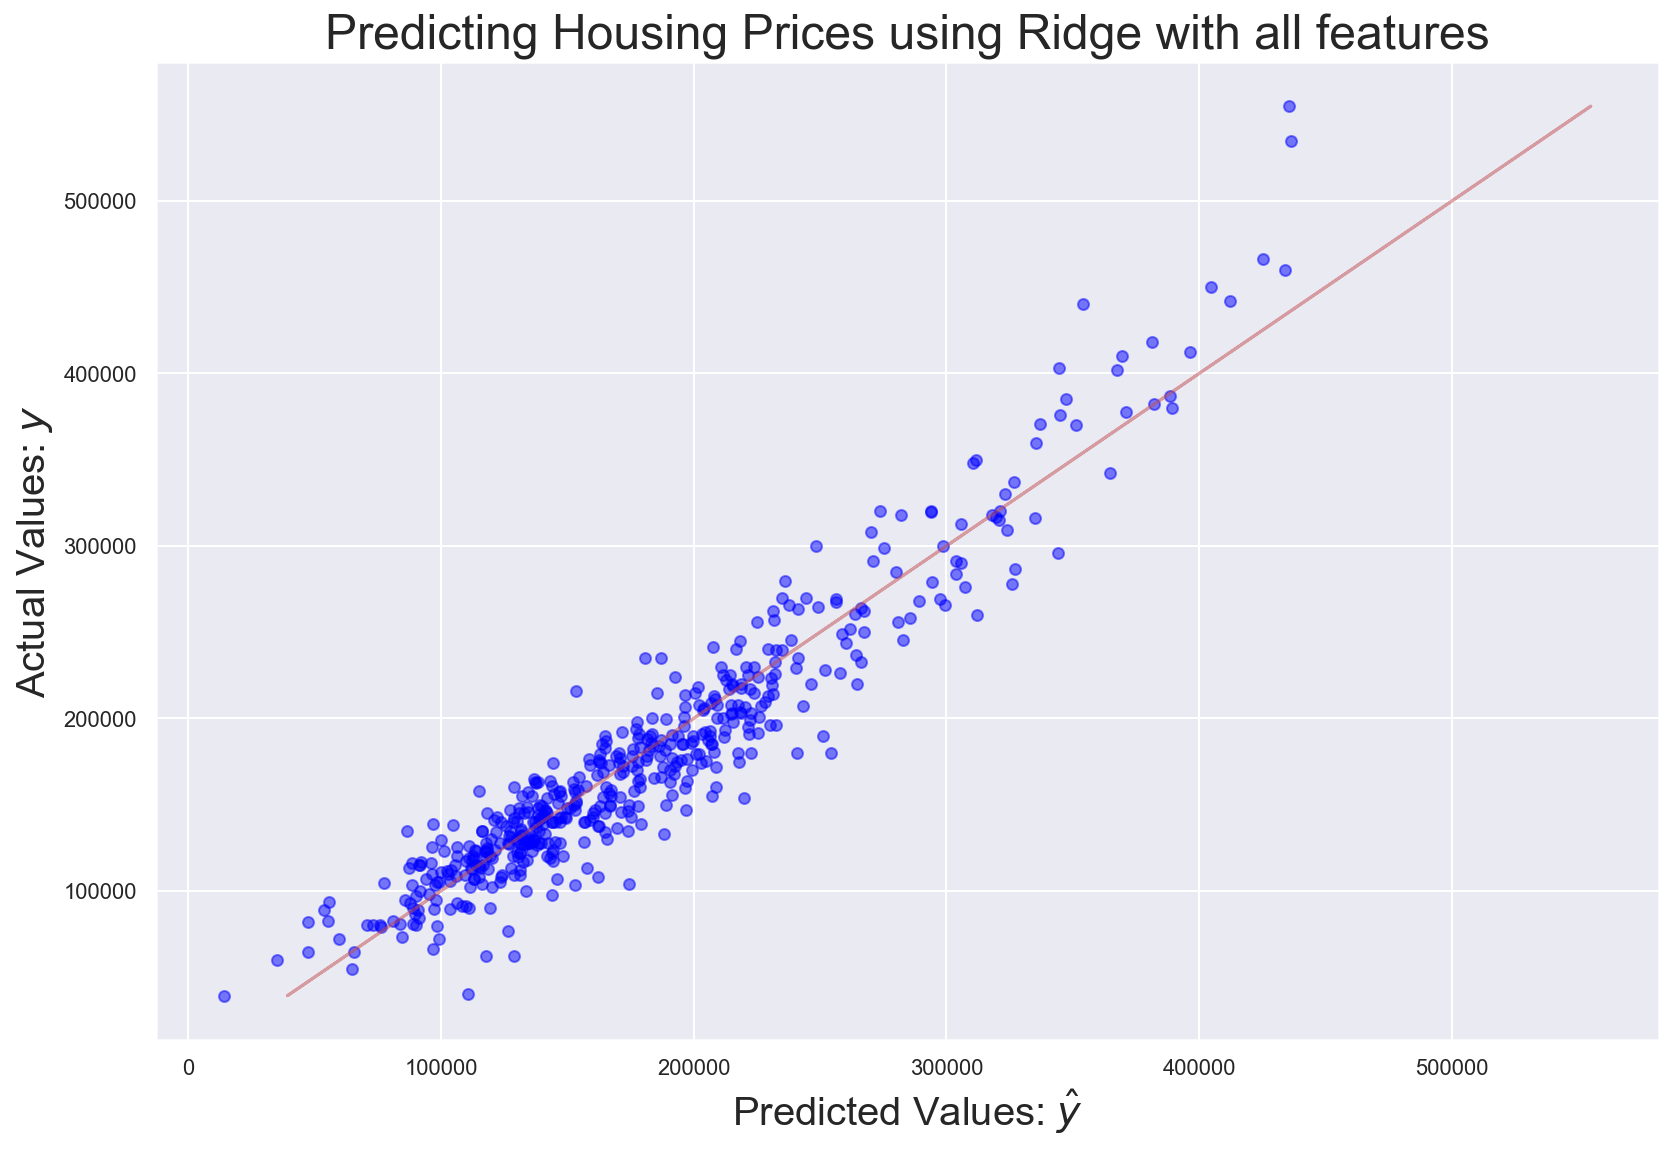

In [128]:
plot_pred(y_hat_ridge_test,"Ridge with all features")

In [129]:
get_comments("Ridge",ridge_cv,X_train_ss,X_test_ss,y_hat_ridge_train,y_hat_ridge_test)

|------------||------------||------------||------------||------------|
    Ridge train score: 0.9106228568299866
    Ridge test score: 0.9085789795450021
|------------||------------||------------||------------||------------|
    Ridge train Sqrt MSE: 23889.11
    Ridge test Sqrt MSE: 23338.91
|------------||------------||------------||------------||------------|


## ElasticNet with Standard Scaler [All Features]

In [130]:
enet=ElasticNetCV(l1_ratio=np.linspace(0.1, 1.0, 25),n_alphas=100,cv=6)
enet.fit(X_train_ss,y_train)

ElasticNetCV(cv=6,
             l1_ratio=array([0.1   , 0.1375, 0.175 , 0.2125, 0.25  , 0.2875, 0.325 , 0.3625,
       0.4   , 0.4375, 0.475 , 0.5125, 0.55  , 0.5875, 0.625 , 0.6625,
       0.7   , 0.7375, 0.775 , 0.8125, 0.85  , 0.8875, 0.925 , 0.9625,
       1.    ]))

In [131]:
enet.alpha_

485.35594248267205

In [132]:
y_hat_enet_train = enet.predict(X_train_ss)
y_hat_enet_test = enet.predict(X_test_ss)

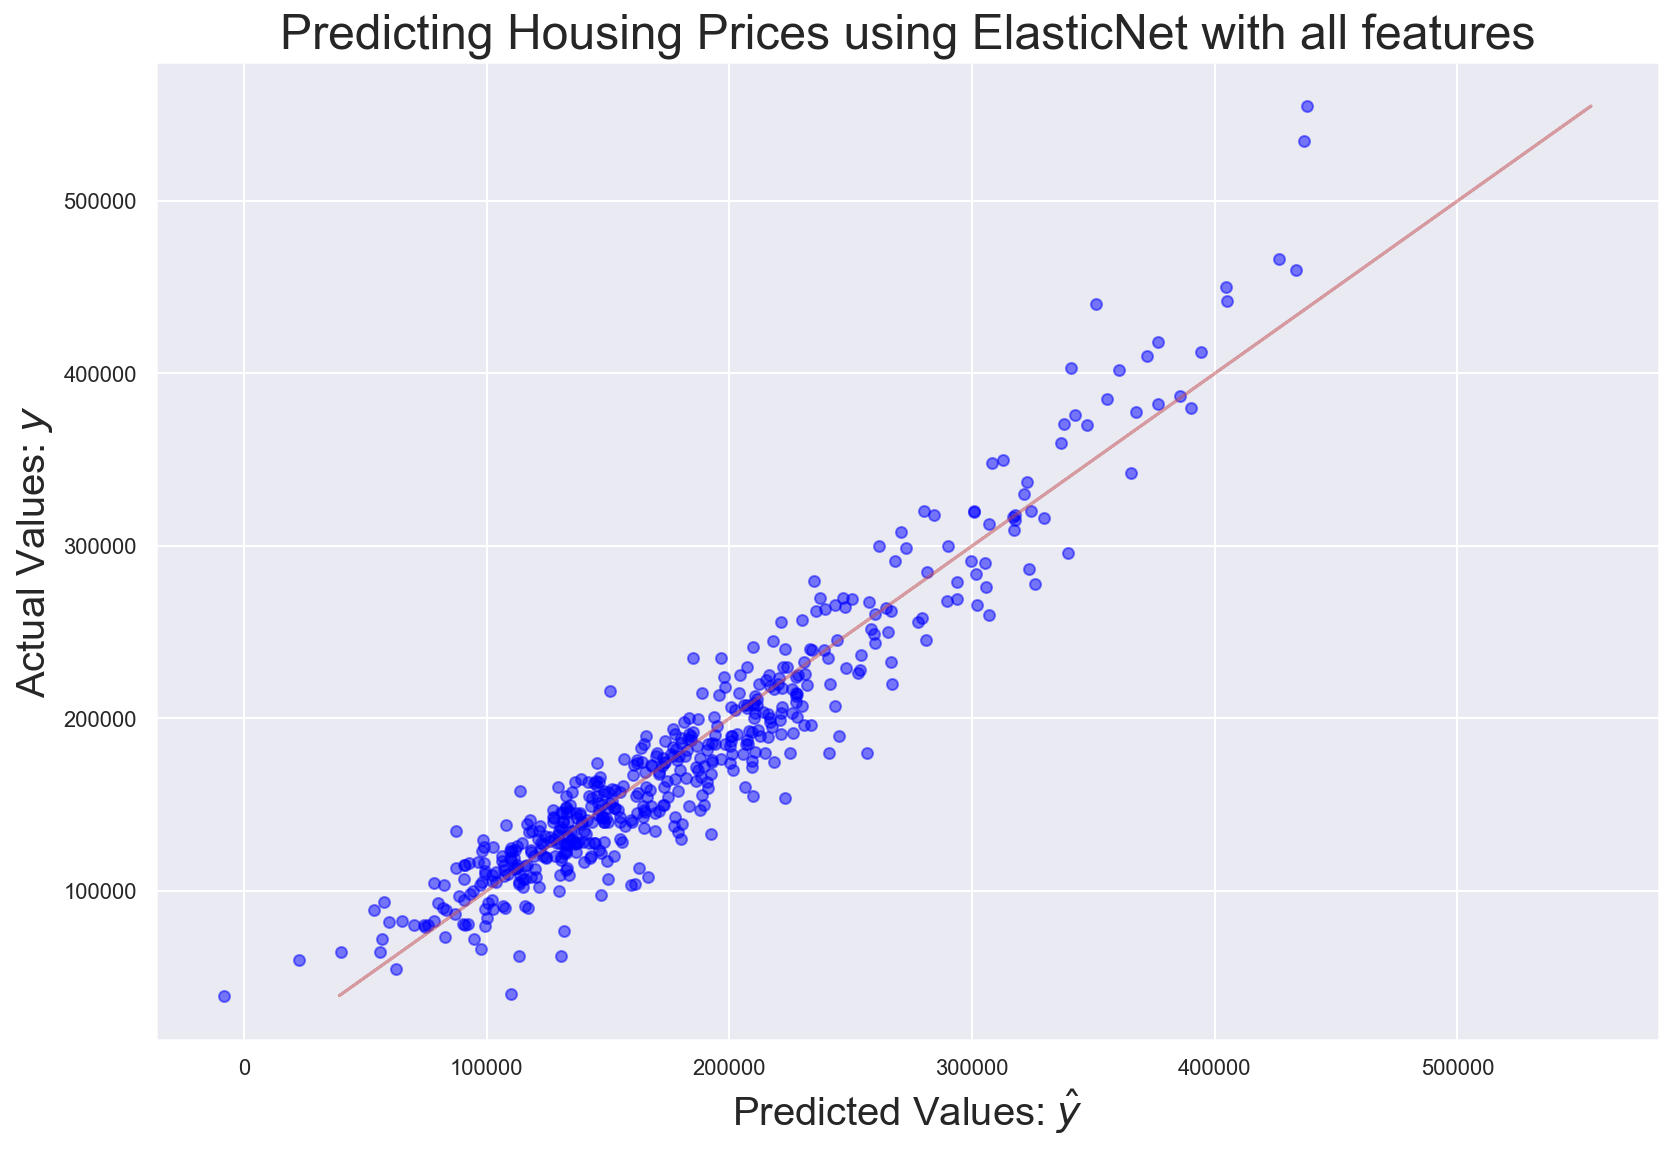

In [133]:
plot_pred(y_hat_enet_test,"ElasticNet with all features")

In [134]:
get_comments("ElasticNet",enet,X_train_ss,X_test_ss,y_hat_enet_train,y_hat_enet_test)

|------------||------------||------------||------------||------------|
    ElasticNet train score: 0.9065852562496387
    ElasticNet test score: 0.9089673304189505
|------------||------------||------------||------------||------------|
    ElasticNet train Sqrt MSE: 24422.74
    ElasticNet test Sqrt MSE: 23289.28
|------------||------------||------------||------------||------------|


## Recursive Feature Elimination


RFE is a wrapper type feature selection algorithm which is used to help select the best features to run a model. the model ranks features based on their importance and discards the least important features refits the model until the desired amount of features is left. 

In [135]:
from sklearn.feature_selection import RFE

ridge_alphas = np.logspace(0.1, 10, 1000)
ridge_cv= RidgeCV(alphas=ridge_alphas,cv=6,scoring="r2")
rfe=RFE(lasso,n_features_to_select=30)
rfe.fit(X_train_ss,y_train)


RFE(estimator=LassoCV(alphas=array([1.00000000e+00, 1.01158528e+00, 1.02330478e+00, ...,
       9.77225965e+09, 9.88547401e+09, 1.00000000e+10]),
                      cv=6),
    n_features_to_select=30)

In [136]:
rfe.ranking_

array([93, 92,  1,  1,  1, 16,  5,  1,  1, 17,  1, 70, 12,  1,  1, 76, 66,
       79, 38, 58,  1, 57, 49, 81, 72, 69, 86, 64, 39,  2, 42, 52, 75,  1,
       78,  1, 90,  4,  6, 45, 65, 36,  1, 34, 74, 29, 23, 30, 15, 10,  1,
       13,  1, 84,  1, 44, 85, 71, 54, 60,  1,  1, 24, 53,  1, 62,  1,  1,
       77, 51, 41, 28, 19, 61, 48, 22, 50, 37, 27,  1,  1, 35, 11, 47, 68,
       63, 56, 88, 67, 20, 80, 82,  1, 40, 26,  1, 91,  8,  1, 25, 14, 55,
       33, 73, 89, 31,  3, 83,  1,  1, 32, 87, 46,  9, 21,  1, 59, 18, 43,
        1,  1,  7])

In [137]:
rfe_ranks=sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X.columns))


In [138]:
# selecting all ranking 1   
rfe_list=[i[1] for i in rfe_ranks]
rfe_top_30=rfe_list[:30]

In [139]:
rfe_train=X[rfe_top_30]



## Ridge with Standard Scaler [Top 30 Features]

In [140]:
X_30=rfe_train
y = train['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X_30, y, random_state = 42)

ss=StandardScaler()

X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [141]:
ridge_alphas = np.logspace(0.1, 10, 1000)
ridge_cv= RidgeCV(alphas=ridge_alphas,cv=6,scoring="r2")
ridge_cv.fit(X_train_ss,y_train)

RidgeCV(alphas=array([1.25892541e+00, 1.28798234e+00, 1.31770993e+00, 1.34812366e+00,
       1.37923935e+00, 1.41107322e+00, 1.44364184e+00, 1.47696216e+00,
       1.51105155e+00, 1.54592774e+00, 1.58160890e+00, 1.61811360e+00,
       1.65546087e+00, 1.69367013e+00, 1.73276130e+00, 1.77275471e+00,
       1.81367121e+00, 1.85553209e+00, 1.89835914e+00, 1.94217468e+00,
       1.98700151e+00, 2.03286298e+0...
       5.91659813e+09, 6.05315761e+09, 6.19286898e+09, 6.33580499e+09,
       6.48204007e+09, 6.63165037e+09, 6.78471378e+09, 6.94131002e+09,
       7.10152060e+09, 7.26542897e+09, 7.43312046e+09, 7.60468240e+09,
       7.78020412e+09, 7.95977700e+09, 8.14349456e+09, 8.33145246e+09,
       8.52374857e+09, 8.72048301e+09, 8.92175824e+09, 9.12767904e+09,
       9.33835265e+09, 9.55388876e+09, 9.77439960e+09, 1.00000000e+10]),
        cv=6, scoring='r2')

In [142]:
ridge_cv.alpha_


24.450530606697786

In [143]:
ridge_coef_df = pd.DataFrame({'Features':X_30.columns,'coef': ridge_cv.coef_,'abs_coef': np.abs(ridge_cv.coef_)})
ridge_coef_df.sort_values("abs_coef",ascending=False).head(15)


Features          coef      abs_coef
12           gr_liv_area  25092.826570  25092.826570
28          overall_qual  17120.559258  17120.559258
29         total_bsmt_sf   8158.131162   8158.131162
26  neighborhood_NridgHt   7470.115461   7470.115461
0                    age  -7413.442623   7413.442623
5             exter_qual   7069.699114   7069.699114
27  neighborhood_StoneBr   6953.662287   6953.662287
15          kitchen_qual   6523.802273   6523.802273
4           bsmtfin_sf_1   6512.916477   6512.916477
17          mas_vnr_area   6297.884434   6297.884434
20       ms_subclass_120  -6058.579970   6058.579970
2          bsmt_exposure   5684.494493   5684.494493
16              lot_area   4721.942064   4721.942064
11           garage_area   4679.666947   4679.666947
18     mas_vnr_type_None   4249.376369   4249.376369

#### Comments
##### comments will only be made on conditions that can be changed by homeowners. 

Per square feet increase in above ground living area would increase the price by around $25000.

Per unit increase in overall quality would increase prices by around $17000.   

Per square feet increase in basement would increase prices by around $8000.

Per unit increase in kitchen quality would increase prices by around $6500.

Per square feet increase in garage would increase prices by around $4600.


In [144]:
y_hat_ridge_train_30 = ridge_cv.predict(X_train_ss)
y_hat_ridge_test_30 = ridge_cv.predict(X_test_ss)

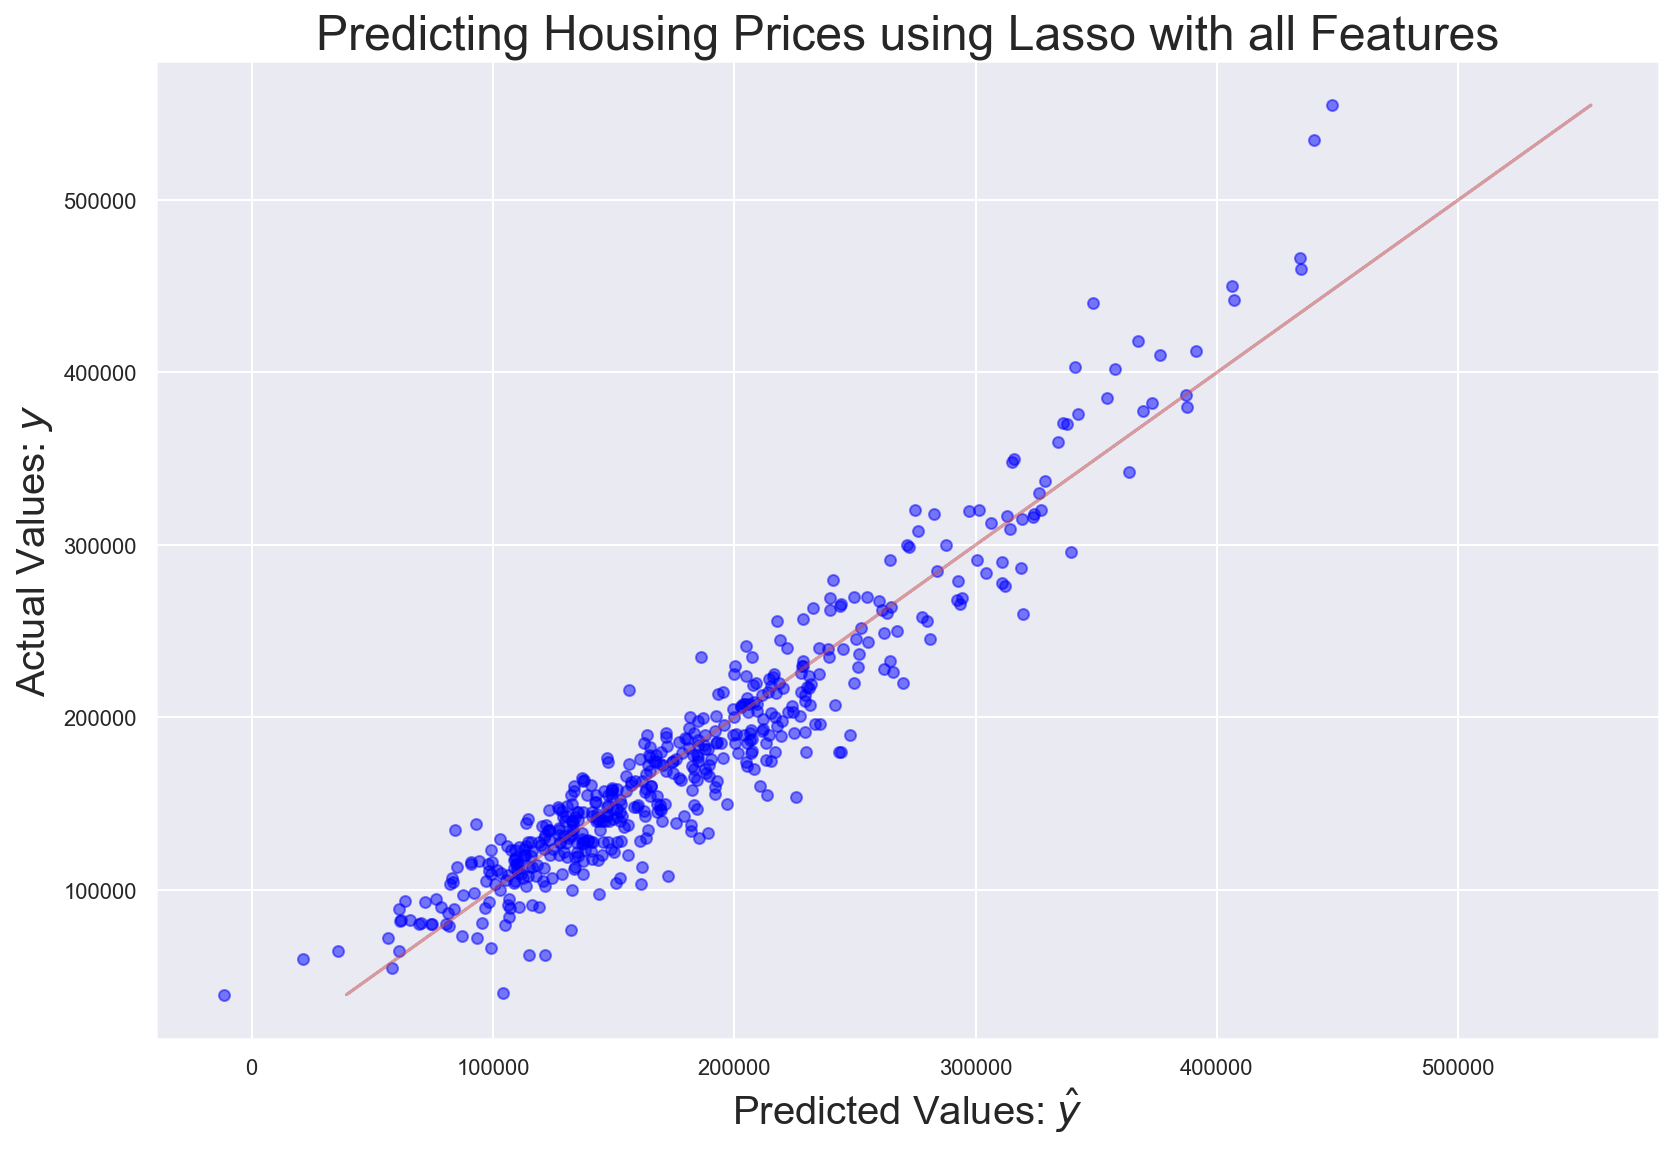

In [145]:
plot_pred(y_hat_ridge_test_30,"Lasso with all Features")

In [146]:
get_comments("Ridge",ridge_cv,X_train_ss,X_test_ss,y_hat_ridge_train_30,y_hat_ridge_test_30)

|------------||------------||------------||------------||------------|
    Ridge train score: 0.9024763661871774
    Ridge test score: 0.908289075957799
|------------||------------||------------||------------||------------|
    Ridge train Sqrt MSE: 24954.08
    Ridge test Sqrt MSE: 23375.88
|------------||------------||------------||------------||------------|


#### Comments
The reason why ridge was chosen as the best model was because it had the closest R2 scores of train and test as compared to all the other models and the RSMSE also had the closest scores of train and test. There is some slight underfiting as both R2 and RSMSE performs slightly better on both train as compared to MSE. This may be improved by increasing the number features or better feature engineering or a further removal of the outliers. This would allow the model to better able to predict the outcome of saleprice.

## Predicting on Test Dataset

In [147]:
X_train=rfe_train
X_test=test[rfe_top_30]
y=train["saleprice"]

ss=StandardScaler()
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [148]:
ridge_alphas = np.logspace(0.1, 10, 1000)
ridge_cv= RidgeCV(alphas=ridge_alphas,cv=6,scoring="r2")
ridge_cv.fit(X_train_ss,y)

RidgeCV(alphas=array([1.25892541e+00, 1.28798234e+00, 1.31770993e+00, 1.34812366e+00,
       1.37923935e+00, 1.41107322e+00, 1.44364184e+00, 1.47696216e+00,
       1.51105155e+00, 1.54592774e+00, 1.58160890e+00, 1.61811360e+00,
       1.65546087e+00, 1.69367013e+00, 1.73276130e+00, 1.77275471e+00,
       1.81367121e+00, 1.85553209e+00, 1.89835914e+00, 1.94217468e+00,
       1.98700151e+00, 2.03286298e+0...
       5.91659813e+09, 6.05315761e+09, 6.19286898e+09, 6.33580499e+09,
       6.48204007e+09, 6.63165037e+09, 6.78471378e+09, 6.94131002e+09,
       7.10152060e+09, 7.26542897e+09, 7.43312046e+09, 7.60468240e+09,
       7.78020412e+09, 7.95977700e+09, 8.14349456e+09, 8.33145246e+09,
       8.52374857e+09, 8.72048301e+09, 8.92175824e+09, 9.12767904e+09,
       9.33835265e+09, 9.55388876e+09, 9.77439960e+09, 1.00000000e+10]),
        cv=6, scoring='r2')

In [149]:
test_predictions = ridge_cv.predict(X_test_ss)


In [150]:
test_predictions=pd.Series(test_predictions)


In [151]:
type(test_predictions)

pandas.core.series.Series

In [152]:
#joining the id and prediction and saving into a csv file
test_id["saleprice"]=test_predictions
submission_ridge=test_id
submission_ridge.sort_values("id",ascending=True,inplace=True)
submission_ridge.to_csv("../datasets/sub_ridge.csv",index=False)


### This returns a Score of 28963.68563 from kaggle

## Conclusion


Using the 3 models(Ridge,Lasso,Linear Regression and ElasticNet) and a total of 128 features, it was found that Ridge performance the best with the the closest train and test R2 and RMSE with only slight signs of underfitting, which may have been due to the limitations of 30 features or lack of data on outliers towards the higher sales prices. From the 128 features, a recursive feature elimination was done to reduce the number of features to 30, with top 30 features, a Ridge model was performed and the model showed that it was only very slight underfitting in both R2 and RMSE. The prediction on the test dataset was done and returned a score of 28963.69 which further proves that either/or our current dataset does not include enough data points and that 30 features may not be sufficient to predict house prices well.


## Recommendations

There are some features in houses that would help homeowners increase the prices of the houses they are trying to sell, such features include above ground living areas. This would mean that owners could consider renovating their house to increase living area just as long as it costs 25000 or less for every square feet increased. Another feature that homeowners should change would be the overall quality of the house, as an increase in rating would lead to an increase in prices by about 17000. Lastly, homeowners can look into increasing the quality of their kitchens, as every increased rating, would increase the price by about 6500, as long as the cost of doing so is lesser. What I would suggest would be to do the renovations all at the same time to try to increase the ratings and square footage of the different features to maximise the full potential of the house and achieve the best selling price. 

Potential homeowners can also use these features as a guide to see if the houses they are interested in are moderately priced by knowing which features greatly affect the price of the house. Using this information as a bargaining chip to lower the prices of houses that are overvalued or buy houses that are undervalued and flip them for profit.
